In [1]:
from gensim.models import Word2Vec
import gensim.downloader as api
from pathlib import Path
import os
import fintex_functions
import importlib
importlib.reload(fintex_functions)
from fintex_functions import analogy_function, most_similar_function, unmatched_function, word_embedding_2d_representation
from fintex_functions import single_word_embedding_2d_representation

In [229]:
import re
from keras.preprocessing.text import one_hot, Tokenizer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import tensorflow
from io import StringIO
import pandas as pd
import numpy as np 
import keras
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer 
from keras.utils import pad_sequences 
from keras.models import Sequential, Model
# from keras.layers.core import
from keras.layers import Flatten, Input, Concatenate, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, GRU, MultiHeadAttention, Add, Bidirectional,  Activation, Dropout, Dense, GRU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import seaborn as sns
import nltk
from numpy import asarray
from numpy import zeros
from keras.layers import Conv1D
from keras.layers import LSTM
import json
from keras.optimizers import Adam
# from tensorflow.keras.utils import serialize_keras_object
from tensorflow.keras.utils import serialize_keras_object
from tensorflow.keras import utils
from tensorflow.keras.models import clone_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
import joblib
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
lemmatizer = WordNetLemmatizer()
text_tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\benjo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
from sklearn.metrics import confusion_matrix

In [95]:
import statistics
import spacy 
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# stop_words = set(stopwords.words("english")) 
# lemmatizer = WordNetLemmatizer()

In [5]:
def POS_TRANS(tag_):
    if tag_.startswith('R'):
        return wordnet.ADV
    elif tag_.startswith('V'):
        return wordnet.VERB
    elif tag_.startswith('N'):
        return wordnet.NOUN
    elif tag_.startswith('J'):
        return wordnet.ADJ
    else:
        return 0 

In [7]:
def preprocess_text(text_):

    # Remove links, mentions     
    # reduce all text to lower case
    text_ = text_.lower()

    #Remove mentions
    text_ = re.sub('@\S+', ' ', text_)
    
    #Remove any links
    text_ = re.sub('https?:\S+|http?:\S', ' ', text_)
    
    # Remove puntuations and numbers
    text_ = re.sub('[^a-zA-Z]', ' ', text_)

    # Single character removal 
    text_ = re.sub(r"\s+[a-zA-z]\s+", ' ', text_)

    # Remove multiple spaces
    text_ = re.sub(r'\s+', ' ', text_)
    
#     pattern_ = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
#     text_ = pattern_.sub('', text_)
    
    
    # Lematize
    tokens_result = text_tokenizer.tokenize(text_)
    pos_tuple_list = nltk.pos_tag(tokens_result)
    POS_TRANSLATED = list(map(lambda x: (x[0], POS_TRANS(x[1])), pos_tuple_list))

    lemmatized_tokens = [lemmatizer.lemmatize(word) if tag == 0 else lemmatizer.lemmatize(word, tag) for word, tag in POS_TRANSLATED]

    


    return lemmatized_tokens

In [682]:
st = "i am driving down the road"
preprocess_text(st)

['i', 'be', 'drive', 'down', 'the', 'road']

In [9]:
# embedding_folder_path = Path('..', 'Final Project/Assets/Word embedings/')
embedding_folder_path = "C:\\Users\\benjo\\Final Project\\Assets\\Word embedings\\"
file_location = 'FinText_Word2Vec_CBOW\\Word_Embedding_2000_2015'

FinText_Word2Vec_cbow = Word2Vec.load(embedding_folder_path + file_location)
# current_dir = os.path.dirname(os.path.abspath('Viklund-NN News Sentiment Model'))
# bbc_folder_path = os.path.join(current_dir, 'bbc')
# bbc_folder_path = Path(bbc_folder_path)

In [10]:
# FinText_Word2Vec_cbow.wv['rise']

In [11]:
token_list1 = ['microsoft', 'barclays', 'ibm', 'google', 'adobe', 
              'citi', 'ubs', 'hsbc', 'tesco', 'walmart']

# Test relationship between oil companies, their product, financial terms, and government
token_list2 = ['shell', 'shel', 'earnings', 'report', 'per', 'share', 
              'rise', 'oil', 'gas', 'quarterly', 'revenue', 'bp', 'chevron', 'governemnt']

token_list3 = ['coming', 'come', 'going', 'gone', 'has', 'earnings', 
              'earn', 'earning', 'warning', 'warn', 'willing', 'will']


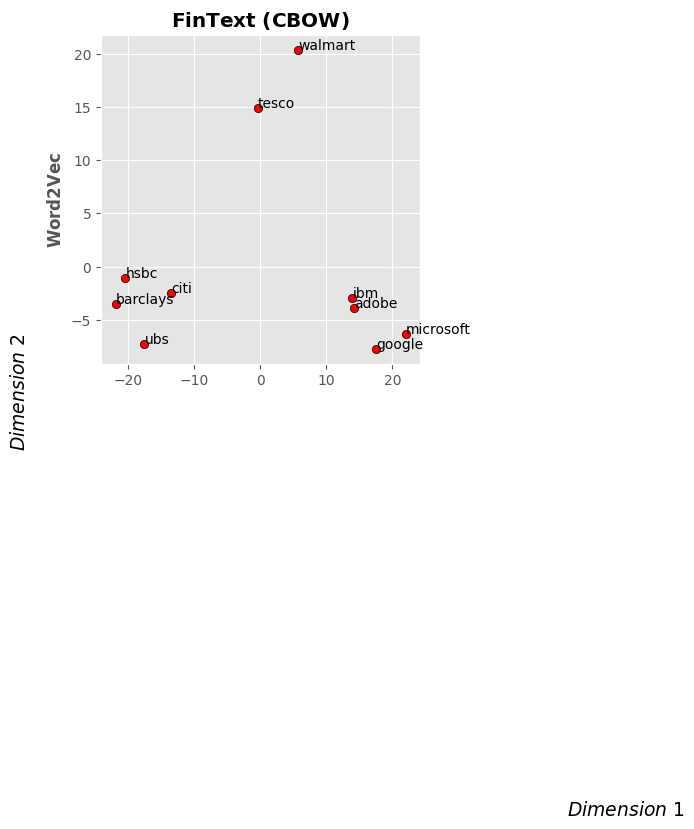

In [158]:



# Test relationship between shell & terminology indicating negative quarterly performance
Negative_earnigns = """
Shell Plc’s earnings from natural gas trading will be significantly lower in the second quarter, due to seasonal shifts in the market.

Oil and gas production will also be down compared with the first three months of the year due to field maintenance, while the company’s chemicals business is expected to post a loss, Shell said in an update ahead of its full results later this month.

Extreme swings in European natural gas prices last year helped propel Shell’s profits to record levels, with trading in the unit accounting for as much as a quarter of overall profitability. The strong performance continued into this year, helping the company deliver its best-ever first quarter, but conditions were less advantageous in the following months.
"""
negative_news_tokens = preprocess_text(Negative_earnigns)


single_word_embedding_2d_representation(token_list1, FinText_Word2Vec_cbow.wv)



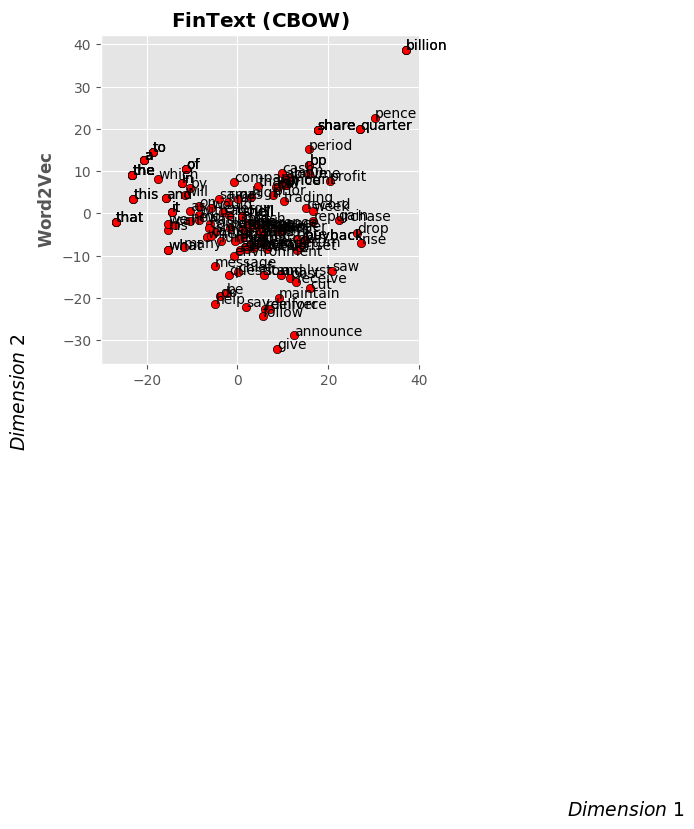

In [13]:
# Test relationship between shell & terminology indicating positive quarterly performance
Positive_earnigns = """
Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.

The company will repurchase a further $4 billion of shares, the same amount as in the prior period. That contrasts with UK peer BP Plc, which saw its share price drop more than 8% earlier this week when it announced a smaller buyback of $1.75 billion.

It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.

“Following BP’s cut to the buyback, we received many questions on what Shell would do this quarter given a weaker macro environment,” RBC analyst said in a note. “What was the fuss about?” Shell shares rose as much as 3.5% before paring gains to 2,354 pence as of 11:45 a.m. in London.
"""
positive_news_tokens = preprocess_text(Positive_earnigns)
single_word_embedding_2d_representation(positive_news_tokens, FinText_Word2Vec_cbow.wv)

In [14]:
type(FinText_Word2Vec_cbow.wv)

gensim.models.keyedvectors.KeyedVectors

In [244]:
from datasets import load_dataset

dataset = load_dataset("financial_phrasebank", "sentences_50agree")

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

In [484]:
fin_headlines_1 = pd.read_csv('finheadlines.csv')
fin_gold_headlines = pd.read_csv('gold_news.csv')
fin_news_combined = pd.read_csv('combined_fin_news.csv') #combined_fin_news.csv
nasdaq_news = pd.read_csv('nasdaq.csv')
djia_news = pd.read_csv('djia_news.csv')
News_news = pd.read_csv('news.csv', encoding='latin1')
#News.csv nasdaq.csv djia_news.csv

In [579]:
add_to_dataset = pd.DataFrame({
    'sentence': ['Net debt dropped to $44.2 billion, down more than $4 billion from a year ago', 
                 'Exxon on Wednesday reported weaker-than-expected third-quarter earnings as New York-based hedge fund called on the energy organization to split up.',
                 'Net debt came in at $57.5 billion, reflecting a decrease from $67 billion at the end of the second quarter',
                 'The company reported first-quarter net debt of $44.2 billion, down from $48.5 billion when compared to the same period a year earlier',
                 'The company reported first-quarter net debt of $44.2 billion, up from $48.5 billion when compared to the same period a year earlier',
                 'The company reported second-quarter net debt of $44.2 billion, an increase from $48.5 billion when compared to the same period a year earlier'],
    'labels': [2, 0, 2, 2,0,0]
})

In [673]:
add_more_to_dataset = pd.DataFrame({
    'sentence': ['missing analyst expectations of $6 billion',
                 'missed expectations',
                 'missed estimated earnings per share',
                 'missing estimated EPS',
                 'missed analyst expectations',
                 'but it has still missed expectations with today’s results',
                 'for the 4-months period through to the end of Oct, missing analyst expectations of $4 billion coming to the end of this quarter, company has missed analyst estimates on earnings per share according to estimates',
                 'TSLA beat market expectations',
                 'surpassed analyst expectations of $6 billion',
                 'above analyst expectations of $6 billion',
                 'above estimated earnings per share',
                 'crushed estimated earnings per share',
                 'surpassed analysts estimated earnings per share',
                 'surpassing estimated EPS',
                 'for the 4-months period through to the end of September, surpassing analyst expectations the last quarterly period through to the end of this quarter, company has beat analyst expectations',
                 'coming to the end of this quarter, company has surpassed analyst estimates on earnings per share',
                 'Gold futures fall for the session, but gain for the week'
                ],
    'labels': [0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2]
})

In [664]:
add_more_to_dataset

,sentence,labels
0,missing analyst expectations of $6 billion,0
1,missed expectations,0
2,missed estimated earnings per share,0
3,missing estimated EPS,0
4,missed analyst expectations,0
5,but it has still missed expectations with toda...,0
6,for the 4-months period through to the end of ...,0
7,TSLA beat market expectations,2
8,surpassed analyst expectations of $6 billion,2
9,above analyst expectations of $6 billion,2


In [558]:
fin_gold_headlines

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [531]:
News_news

,text,sentiment
0,Global COVID-19 death toll exceeds 4 million.,0
1,"reports 67,208 new COVID-19 cases, 2,330 deaths.",0
2,China reports 23 new COVID-19 cases versus 19 ...,0
3,"India records 91,702 new COVID-19 cases over p...",0
4,sharply raises COVID-19 death toll prompting c...,0
...,...,...
206,U.S. equity futures were trading higher the mo...,2
207,"China, US commerce chiefs to cooperate on hand...",2
208,Stock investors celebrate red-hot five-quarter...,2
209,Wall Streetâs roaring 2021 is as good as it ...,2


In [497]:
nasdaq_news['Label'].unique()

array([0, 1, 2], dtype=int64)

In [501]:
nasdaq_news

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
1,1,A,@TotesTravel : American United call off Hong K...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
...,...,...,...
13176,1,ZNGA,Bitcoin Tops $1000 Again as Zynga Accepts Virt...
13177,1,ZNGA,Zynga Accepts Bitcoin For Microtransactions
13178,1,ZUMZ,Zumiez (ZUMZ) unusual put activity into earnin...
13179,1,ZUMZ,Zumiez Is Going Bankrupt


In [ ]:
nasdaq_news

In [481]:
fin_gold_headlines

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [450]:
fin_news_combined

,Sentence,labels
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [447]:
fin_news_combined['Sentiment'] 

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

In [470]:
fin_news_combined['Sentiment'] = fin_news_combined['Sentiment'].apply(lambda x: {'positive': 2, 'negative': 0, 'neutral': 1}.get(x, x))
fin_news_combined.rename(columns={'Sentiment': 'labels'}, inplace=True)
fin_news_combined['labels']
fin_news_combined.rename(columns={'Sentence': 'sentence'}, inplace=True)
fin_news_combined

,sentence,labels
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [17]:
fin_news = pd.DataFrame({
    'sentence': dataset['train']['sentence'],
    'labels': dataset['train']['label']
})


In [288]:
fin_news

,sentence,labels
0,"According to Gran , the company has no plans t...",1
1,Technopolis plans to develop in stages an area...,1
2,The international electronic industry company ...,0
3,With the new production plant the company woul...,2
4,According to the company 's updated strategy f...,2
...,...,...
4841,LONDON MarketWatch -- Share prices ended lower...,0
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4843,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,Net sales of the Paper segment decreased to EU...,0


In [289]:
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
        


In [290]:
label_interp = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
get_key_by_value(label_interp, 2)

'POSITIVE'

In [291]:
fin_news['sentence'][2260]

'Brazilian non-profit interbank Camara Interbancaria de Pagamentos CIP has acquired solutions from US business integration solutions provider Sterling Commerce , the latter company said in a statement .'

<Axes: xlabel='labels', ylabel='count'>

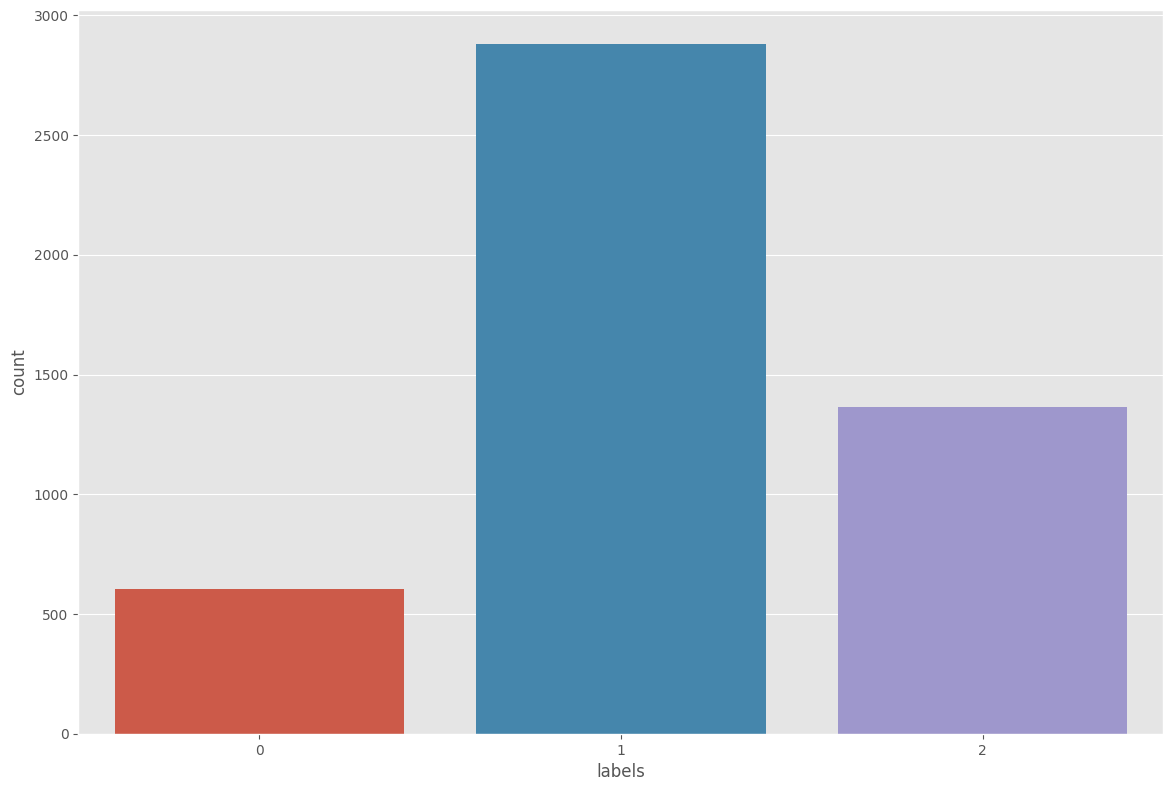

In [292]:
sns.countplot(x='labels', data=fin_news)

In [293]:
fin_news['labels'].value_counts()
print(label_interp)
print(fin_news['labels'].value_counts())

{'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
1    2879
2    1363
0     604
Name: labels, dtype: int64


<Axes: xlabel='labels', ylabel='count'>

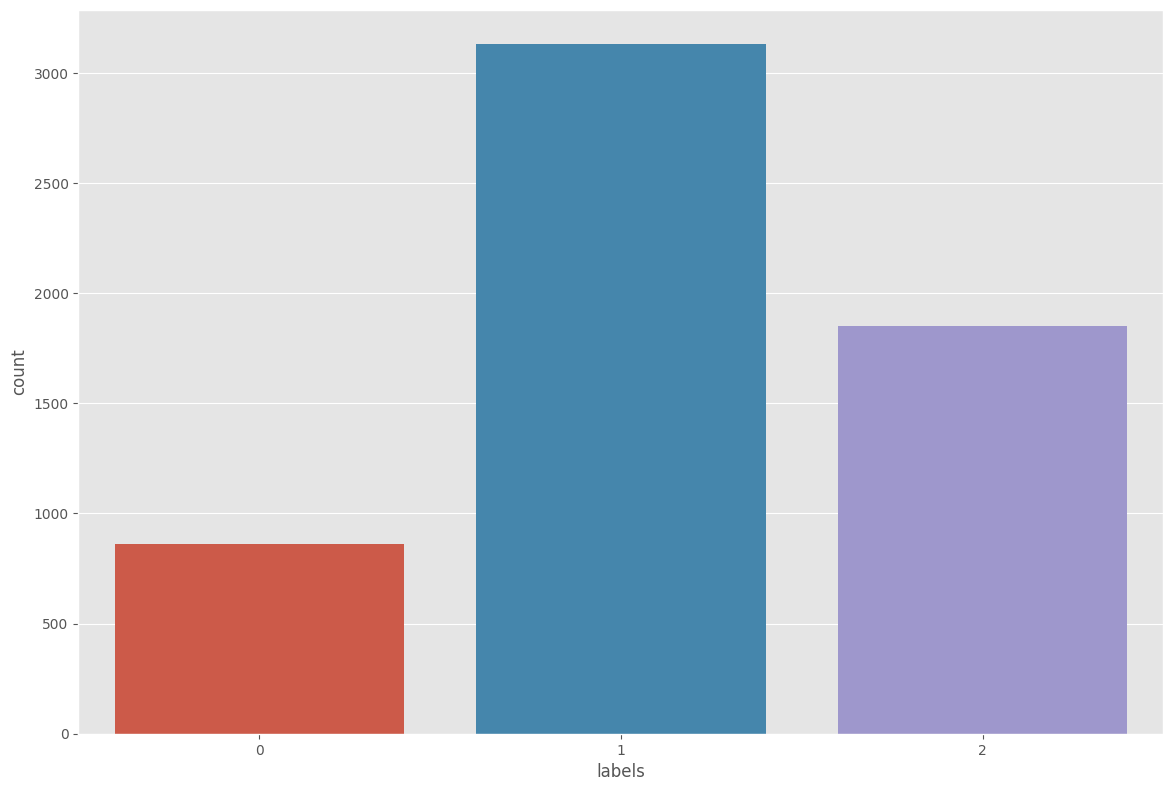

In [471]:
sns.countplot(x='labels', data=fin_news_combined)

In [472]:
fin_news[fin_news['labels'] == 1]

,sentence,labels
0,"according to gran , the company has no plans t...",1
1,technopolis plans to develop in stages an area...,1
58,at the request of finnish media company alma m...,1
59,"in sweden , gallerix accumulated sek denominat...",1
60,the company supports its global customers in d...,1
...,...,...
4819,"nevertheless , the development can not be allo...",1
4820,"besides , as there is no depositor preference ...",1
4823,it holds 38 percent of outokumpu 's shares and...,1
4826,mobile communication and wireless broadband pr...,1


In [333]:
len(fin_news['labels'])

4846

<Axes: xlabel='Label', ylabel='count'>

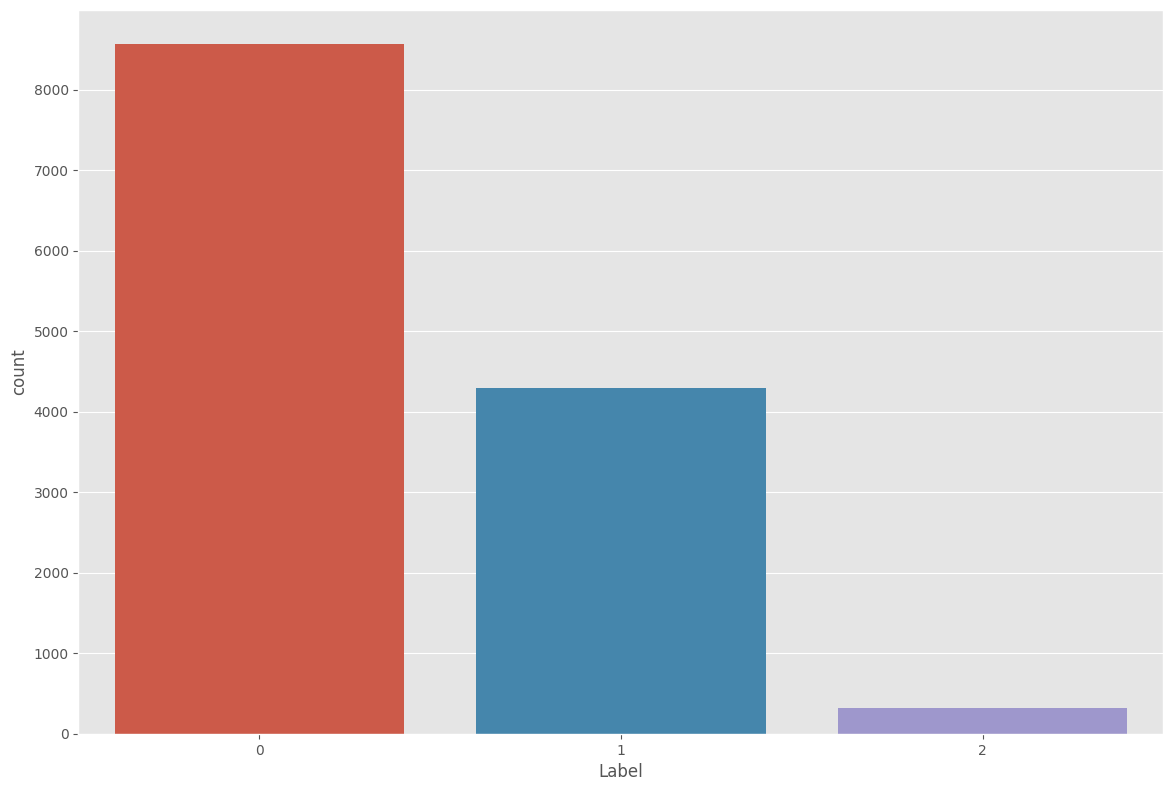

In [508]:
sns.countplot(x='Label', data=nasdaq_news)

In [547]:
nasdaq_news_negative = nasdaq_news[nasdaq_news['Label'] == 0]
nasdaq_news_negative

,Label,Ticker,Headline
0,0,A,@TotesTravel : Airline shares tumble as New Yo...
2,0,A,@TotesTravel : U.S. airline stocks hit highest...
5,0,AAPL,Apple Inc and its main contract manufacturing ...
6,0,AAPL,European Union regulators who slapped Apple In...
8,0,AAPL,Russia wants Apple SAP to cooperate against fo...
...,...,...,...
13161,0,ZNGA,jual chip zynga
13162,0,ZNGA,Zynga loses another executive in top-level exodus
13170,0,ZNGA,Zynga To Patent Virtual Currencies?
13171,0,ZNGA,Zynga Leans On Some Workers to Surrender Pre-I...


In [521]:
sample_size = 2000
nasdaq_news_negative_random_sample = nasdaq_news_negative.sample(n=sample_size, random_state=42)  # 'random_state' for reproducibility
# sns.countplot(x='labels', data=fnews_random_sample)

In [522]:
nasdaq_news_negative_random_sample

,Label,Ticker,Headline
9840,0,FMN,Malaysia probe says it has found documents tie...
5324,0,EFOI,Rather than creating jobs at the Cumbria coal ...
11459,0,TILE,Interface : Diesel Engine Oil : Oil Exploration
786,0,A,25000 Farmers Seek President’s Permission To H...
5925,0,FISI,The unfolding human catastrophe in Iran: Sanct...
...,...,...,...
6744,0,AAC=,Philippine President Duterte orders closure of...
9770,0,FMN,Ontario premier calls Tim Hortons heir 'a bull...
2162,0,SNY,Japan halts Pfizer Sanofi vaccines after four die
11994,0,AAAU,The United States Mint has unveiled a $100 gol...


In [523]:
nasdaq_news_negative_random_sample

nasdaq_news_negative_random_sample['Label'] = nasdaq_news_negative_random_sample['Label'].apply(lambda x: {1: 2, 0: 0, 2: 1}.get(x, x))
nasdaq_news_negative_random_sample.rename(columns={'Label': 'labels'}, inplace=True)
nasdaq_news_negative_random_sample.rename(columns={'Headline': 'sentence'}, inplace=True)
nasdaq_news_negative_2000rs = nasdaq_news_negative_random_sample.drop(columns=['Ticker'])
nasdaq_news_negative_2000rs = nasdaq_news_negative_2000rs.reset_index(drop=True)
nasdaq_news_negative_2000rs = nasdaq_news_negative_2000rs[['sentence', 'labels']]

In [524]:
nasdaq_news_negative_2000rs

,sentence,labels
0,Malaysia probe says it has found documents tie...,0
1,Rather than creating jobs at the Cumbria coal ...,0
2,Interface : Diesel Engine Oil : Oil Exploration,0
3,25000 Farmers Seek President’s Permission To H...,0
4,The unfolding human catastrophe in Iran: Sanct...,0
...,...,...
1995,Philippine President Duterte orders closure of...,0
1996,Ontario premier calls Tim Hortons heir 'a bull...,0
1997,Japan halts Pfizer Sanofi vaccines after four die,0
1998,The United States Mint has unveiled a $100 gol...,0


In [556]:
nasdaq_news_positive = nasdaq_news[nasdaq_news['Label'] == 1]
nasdaq_news_positive

,Label,Ticker,Headline
1,1,A,@TotesTravel : American United call off Hong K...
3,1,A,@TotesTravel : American Airlines reaches deal ...
4,1,A,@TotesTravel : US airlines Treasury Department...
7,1,AAPL,The EU's ruling that Apple Inc must pay a huge...
9,1,AAPL,U.S. Companies Are Stashing $2.1 Trillion Over...
...,...,...,...
13176,1,ZNGA,Bitcoin Tops $1000 Again as Zynga Accepts Virt...
13177,1,ZNGA,Zynga Accepts Bitcoin For Microtransactions
13178,1,ZUMZ,Zumiez (ZUMZ) unusual put activity into earnin...
13179,1,ZUMZ,Zumiez Is Going Bankrupt


In [551]:
nasdaq_news_positive['Label'] = nasdaq_news_positive['Label'].apply(lambda x: {1: 2, 0: 0, 2: 1}.get(x, x))
nasdaq_news_positive.rename(columns={'Label': 'labels'}, inplace=True)
nasdaq_news_positive.rename(columns={'Headline': 'sentence'}, inplace=True)
nasdaq_news_positive_316 = nasdaq_news_positive.drop(columns=['Ticker'])
nasdaq_news_positive_316 = nasdaq_news_positive_316.reset_index(drop=True)
nasdaq_news_positive_316 = nasdaq_news_positive_316[['sentence', 'labels']]

C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\4272051650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_news_positive['Label'] = nasdaq_news_positive['Label'].apply(lambda x: {1: 2, 0: 0, 2: 1}.get(x, x))
C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\4272051650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasdaq_news_positive.rename(columns={'Label': 'labels'}, inplace=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\4272051650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [552]:
nasdaq_news_positive_316

,sentence,labels
0,South Korea has reached a deal with AstraZenec...,1
1,Prince Charles Reportedly Caught Up in $136 Mi...,1
2,Prince Charles on brink of ending all fossil f...,1
3,Prince Charles: Companies chased away from Ama...,1
4,Tim Dunn and Charlotte Charles the parents of ...,1
...,...,...
311,Zhou Youguang Who Made Writing Chinese as Simp...,1
312,China's Zhou Youguang father of Pinyin writing...,1
313,Zhou Youguang the creator of Pinyin (the syste...,1
314,Zhou Youguang Who Made Writing Chinese as Simp...,1


<Axes: xlabel='sentiment', ylabel='count'>

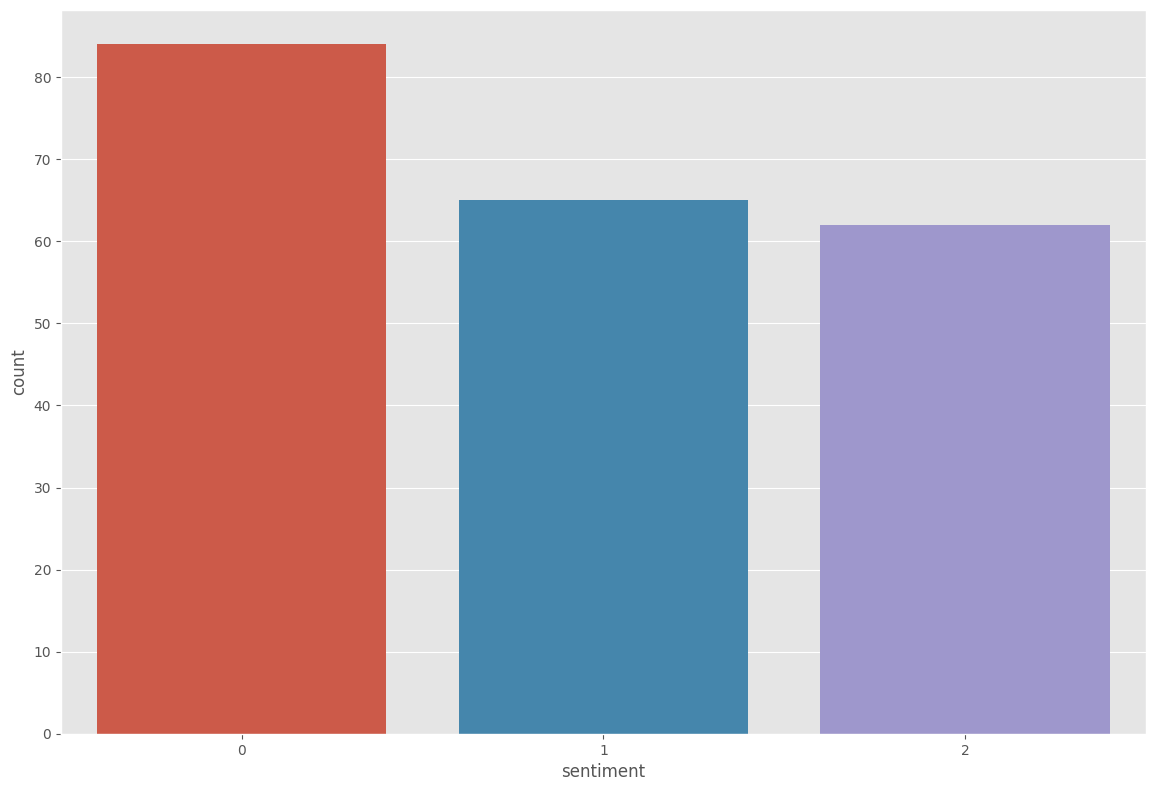

In [533]:
sns.countplot(x='sentiment', data=News_news)

In [535]:
News_news_positive = News_news[News_news['sentiment'] == 2]

In [540]:
News_news_positive

,text,sentiment
149,Indiaâs southern states show resilience amid...,2
150,"US adds 559,000 jobs in May as unemployment fa...",2
151,UK records zero Covid deaths for first time in...,2
152,Brazilâs GDP surges back to pre-pandemic levels,2
153,Italyâs revised GDP figures show country sid...,2
...,...,...
206,U.S. equity futures were trading higher the mo...,2
207,"China, US commerce chiefs to cooperate on hand...",2
208,Stock investors celebrate red-hot five-quarter...,2
209,Wall Streetâs roaring 2021 is as good as it ...,2


In [542]:
# nasdaq_news_negative_random_sample['Label'] = nasdaq_news_negative_random_sample['Label'].apply(lambda x: {1: 2, 0: 0, 2: 1}.get(x, x))
News_news_positive.rename(columns={'sentiment': 'labels'}, inplace=True)
News_news_positive.rename(columns={'text': 'sentence'}, inplace=True)
# nasdaq_news_negative_2000rs = nasdaq_news_negative_random_sample.drop(columns=['Ticker'])
News_news_positive = News_news_positive.reset_index(drop=True)
News_news_positive = News_news_positive[['sentence', 'labels']]

C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\3292516207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News_news_positive.rename(columns={'sentiment': 'labels'}, inplace=True)
C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\3292516207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  News_news_positive.rename(columns={'text': 'sentence'}, inplace=True)


In [543]:
News_news_positive

,sentence,labels
0,Indiaâs southern states show resilience amid...,2
1,"US adds 559,000 jobs in May as unemployment fa...",2
2,UK records zero Covid deaths for first time in...,2
3,Brazilâs GDP surges back to pre-pandemic levels,2
4,Italyâs revised GDP figures show country sid...,2
...,...,...
57,U.S. equity futures were trading higher the mo...,2
58,"China, US commerce chiefs to cooperate on hand...",2
59,Stock investors celebrate red-hot five-quarter...,2
60,Wall Streetâs roaring 2021 is as good as it ...,2


In [295]:
# # Specify sample size
# sample_size = 1000  

# # Use the 'sample' method to get a random sample of the specified size
# fnews_random_sample = fin_news.sample(n=sample_size, random_state=42)  # 'random_state' for reproducibility
# sns.countplot(x='labels', data=fnews_random_sample)

In [559]:
fin_gold_headlines

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [566]:
fin_gold_news = fin_gold_headlines.drop(columns=['URL','Dates', 'Price Direction Up', 'Price Direction Constant', 'Price Direction Down', 'Past Information', 'Future Information', 'Asset Comparision'])
fin_gold_news

,News,Price Sentiment
0,"april gold down 20 cents to settle at $1,116.1...",negative
1,gold suffers third straight daily decline,negative
2,Gold futures edge up after two-session decline,positive
3,dent research : is gold's day in the sun comin...,none
4,"Gold snaps three-day rally as Trump, lawmakers...",negative
...,...,...
10565,gold seen falling from 3-week high this week,negative
10566,dominic frisby : now looks like a good time to...,positive
10567,Gold heading for worst week since November on ...,negative
10568,august gold up $7.60 at $878.80 an ounce on nymex,positive


In [ ]:
fin_gold_news

In [567]:

fin_gold_news['Price Sentiment'] = fin_gold_news['Price Sentiment'].apply(lambda x: {'positive': 2, 'negative': 0, 'neutral': 1}.get(x, x))
fin_gold_news.rename(columns={'Price Sentiment': 'labels'}, inplace=True)
fin_gold_news.rename(columns={'News': 'sentence'}, inplace=True)
# nasdaq_news_positive_316 = fin_gold_news.reset_index(drop=True)
# nasdaq_news_positive_316 = fin_gold_news[['sentence', 'labels']]

In [568]:
fin_gold_news

,sentence,labels
0,"april gold down 20 cents to settle at $1,116.1...",0
1,gold suffers third straight daily decline,0
2,Gold futures edge up after two-session decline,2
3,dent research : is gold's day in the sun comin...,none
4,"Gold snaps three-day rally as Trump, lawmakers...",0
...,...,...
10565,gold seen falling from 3-week high this week,0
10566,dominic frisby : now looks like a good time to...,2
10567,Gold heading for worst week since November on ...,0
10568,august gold up $7.60 at $878.80 an ounce on nymex,2


In [571]:
fin_gold_news_positive = fin_gold_news[fin_gold_news['labels'] == 2]


,sentence,labels
2,Gold futures edge up after two-session decline,2
5,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",2
7,"Gold futures fall for the session, but gain fo...",2
9,"april gold holds slight gain, up $2.50, or 0.2...",2
10,"feb. gold ends up $9.60, or 1.1%, at $901.60 a...",2
...,...,...
10561,Gold prices end the first half of the year rou...,2
10563,"gold gains in asia, copper jumps as china pmi ...",2
10564,"February gold up $3.70, or 0.3%, at $1,134.40/oz.",2
10566,dominic frisby : now looks like a good time to...,2


In [572]:
sample_size = 800
fin_gold_news_positive_800rs = fin_gold_news_positive.sample(n=sample_size, random_state=42)  # 'random_state' for reproducibility
# sns.countplot(x='labels', data=fnews_random_sample)

In [577]:
fin_gold_news_positive_800rs = fin_gold_news_positive_800rs.reset_index(drop=True)

In [578]:
fin_gold_news_positive_800rs

,sentence,labels
0,"gold not done yet, expert says sept to bring a...",2
1,gold futures close higher as the dollar weakens,2
2,Gold gains as a investors seek safe harbor fro...,2
3,feb. gold marks highest closing level since de...,2
4,"Gold pares losses by the finish, gains 1.2% fo...",2
...,...,...
795,gold futures gain steam after ism data,2
796,Near-term outlook remains bearish for MCX gold,2
797,gold rises from 10-month lows as dollar sags,2
798,"gold halfway back from rout, up over $30",2


In [670]:
add_to_gold = fin_gold_news_positive.loc[7]

In [671]:
add_to_gold['sentence']

'Gold futures fall for the session, but gain for the week'

In [672]:
type(add_to_gold)

pandas.core.series.Series

## Preprocess

In [473]:
df1 = fin_news
df2 = fin_news_combined

# Convert sentences to lowercase
df1['sentence'] = df1['sentence'].str.lower()
df2['sentence'] = df2['sentence'].str.lower()

# Find unique sentences in each dataframe
unique_sentences_in_df1 = set(df1['sentence'])
unique_sentences_in_df2 = set(df2['sentence'])

# Find sentences unique to each dataframe
sentences_unique_to_df1 = unique_sentences_in_df1 - unique_sentences_in_df2
sentences_unique_to_df2 = unique_sentences_in_df2 - unique_sentences_in_df1

# Filter the original dataframes to get the rows containing unique sentences
result_df1 = df1[df1['sentence'].isin(sentences_unique_to_df1)]
result_df2 = df2[df2['sentence'].isin(sentences_unique_to_df2)]

# Display the results
print("Sentences unique to DataFrame 1:")
print(result_df1)

print("\nSentences unique to DataFrame 2:")
print(result_df2)

Sentences unique to DataFrame 1:
                                               sentence  labels
2     the international electronic industry company ...       0
5     financing of aspocomp 's growth aspocomp is ag...       2
21    ( filippova ) a trilateral agreement on invest...       2
43    sales for both the department store division a...       2
62    `` the new agreement is a continuation to thea...       1
...                                                 ...     ...
4808  bosse added that trygvesta does not have the f...       0
4818  finnish-swedish stora enso does not understand...       0
4822  the 2015 target for net sales has been set at ...       2
4825  have notified that as a result of the company ...       0
4844  net sales of the paper segment decreased to eu...       0

[627 rows x 2 columns]

Sentences unique to DataFrame 2:
                                               sentence  labels
1     $esi on lows, down $1.50 to $2.50 bk a real po...       0
5       $spy 

In [474]:
fin_news_2 = result_df2.reset_index(drop=True)
fin_news_2

,sentence,labels
0,"$esi on lows, down $1.50 to $2.50 bk a real po...",0
1,$spy wouldn't be surprised to see a green close,2
2,shell's $70 billion bg deal meets shareholder ...,0
3,$sap q1 disappoints as #software licenses down...,0
4,$fb gone green on day,2
...,...,...
1106,$pay 2nd time test of the 21.20-30 b/o zone. ...,1
1107,friends life lifts profits 38% and hikes divi ...,2
1108,"$sbux down pm, from $db downgrade.. pt cut fro...",0
1109,hsbc says unit to book $585 million charge on ...,0


<Axes: xlabel='labels', ylabel='count'>

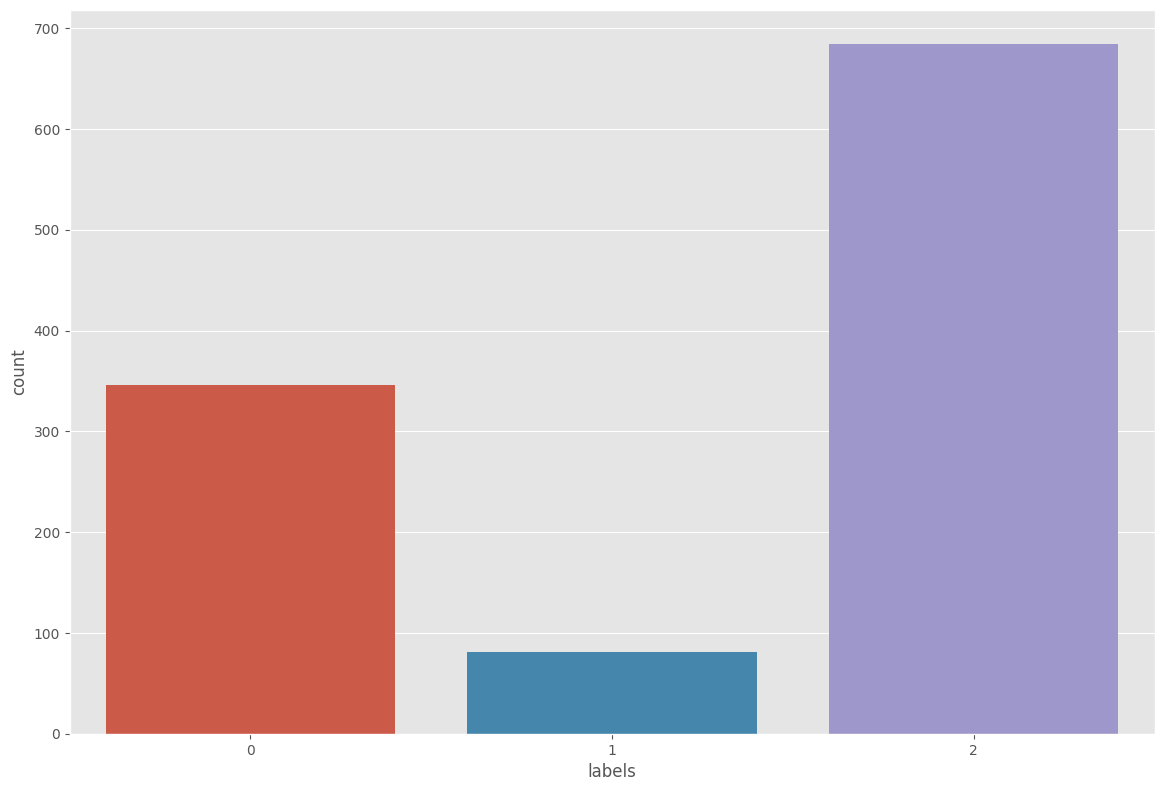

In [475]:
sns.countplot(x='labels', data=fin_news_2)

In [527]:
fin_news_2_negative = fin_news_2[fin_news_2['labels'] == 0]
fin_news_2_positive = fin_news_2[fin_news_2['labels'] == 2]

In [528]:
fin_news_2_positive

,sentence,labels
1,$spy wouldn't be surprised to see a green close,2
4,$fb gone green on day,2
5,$msft sql server revenue grew double-digit wit...,2
6,"aviva, friends life top forecasts ahead of 5.6...",2
7,shire ceo steps up drive to get baxalta board ...,2
...,...,...
1101,$goog resistance turned support? it,2
1104,$cern - consolidating above 50 & 200 ma - nice...,2
1105,last month we added to our $gild position and ...,2
1107,friends life lifts profits 38% and hikes divi ...,2


In [478]:
df1 = fin_news 
df2 = fin_news_2_negative
# Concatenate df2 below df1 (along rows, axis=0)
# fin_news_optimized = df1.append(df2, ignore_index=True)
# Convert both DataFrames to a list
dfs = [df1, df2]

# Concatenate the DataFrames
fin_news_optimized= pd.concat(dfs, ignore_index=True)

In [537]:
df1 = fin_news_optimized 
df2 = nasdaq_news_negative_2000rs
# Concatenate df2 below df1 (along rows, axis=0)
# fin_news_optimized = df1.append(df2, ignore_index=True)
# Convert both DataFrames to a list
dfs = [df1, df2]

# Concatenate the DataFrames
fin_news_optimized_2= pd.concat(dfs, ignore_index=True) 
fin_news_optimized_2

,sentence,labels
0,"according to gran , the company has no plans t...",1
1,technopolis plans to develop in stages an area...,1
2,the international electronic industry company ...,0
3,with the new production plant the company woul...,2
4,according to the company 's updated strategy f...,2
...,...,...
7187,Philippine President Duterte orders closure of...,0
7188,Ontario premier calls Tim Hortons heir 'a bull...,0
7189,Japan halts Pfizer Sanofi vaccines after four die,0
7190,The United States Mint has unveiled a $100 gol...,0


In [538]:
df1 = fin_news_optimized_2 
df2 = fin_news_2_positive
# Concatenate df2 below df1 (along rows, axis=0)
# fin_news_optimized = df1.append(df2, ignore_index=True)
# Convert both DataFrames to a list
dfs = [df1, df2]

# Concatenate the DataFrames
fin_news_optimized_3= pd.concat(dfs, ignore_index=True) 
fin_news_optimized_3

,sentence,labels
0,"according to gran , the company has no plans t...",1
1,technopolis plans to develop in stages an area...,1
2,the international electronic industry company ...,0
3,with the new production plant the company woul...,2
4,according to the company 's updated strategy f...,2
...,...,...
7871,$goog resistance turned support? it,2
7872,$cern - consolidating above 50 & 200 ma - nice...,2
7873,last month we added to our $gild position and ...,2
7874,friends life lifts profits 38% and hikes divi ...,2


In [544]:
df1 = fin_news_optimized_3 
df2 = News_news_positive
# Concatenate df2 below df1 (along rows, axis=0)
# fin_news_optimized = df1.append(df2, ignore_index=True)
# Convert both DataFrames to a list
dfs = [df1, df2]

# Concatenate the DataFrames
fin_news_optimized_4= pd.concat(dfs, ignore_index=True) 
fin_news_optimized_4

,sentence,labels
0,"according to gran , the company has no plans t...",1
1,technopolis plans to develop in stages an area...,1
2,the international electronic industry company ...,0
3,with the new production plant the company woul...,2
4,according to the company 's updated strategy f...,2
...,...,...
7933,U.S. equity futures were trading higher the mo...,2
7934,"China, US commerce chiefs to cooperate on hand...",2
7935,Stock investors celebrate red-hot five-quarter...,2
7936,Wall Streetâs roaring 2021 is as good as it ...,2


In [581]:
df1 = fin_news_optimized_4 
df2 = fin_gold_news_positive_800rs
# df3 = add_to_gold
df3 = add_to_dataset
# Concatenate df2 below df1 (along rows, axis=0)
# fin_news_optimized = df1.append(df2, ignore_index=True)
# Convert both DataFrames to a list
dfs = [df1, df2, df3]

# Concatenate the DataFrames
fin_news_optimized_5= pd.concat(dfs, ignore_index=True) 
fin_news_optimized_5

,sentence,labels
0,"according to gran , the company has no plans t...",1
1,technopolis plans to develop in stages an area...,1
2,the international electronic industry company ...,0
3,with the new production plant the company woul...,2
4,according to the company 's updated strategy f...,2
...,...,...
8739,Exxon on Wednesday reported weaker-than-expect...,0
8740,"Net debt came in at $57.5 billion, reflecting ...",2
8741,The company reported first-quarter net debt of...,2
8742,The company reported first-quarter net debt of...,0


In [666]:
fin_news_optimized_5.tail()

,sentence,labels
8739,Exxon on Wednesday reported weaker-than-expect...,0
8740,"Net debt came in at $57.5 billion, reflecting ...",2
8741,The company reported first-quarter net debt of...,2
8742,The company reported first-quarter net debt of...,0
8743,The company reported second-quarter net debt o...,0


In [674]:
df1 = fin_news_optimized_5 
df2 = add_more_to_dataset
# Concatenate df2 below df1 (along rows, axis=0)
# fin_news_optimized = df1.append(df2, ignore_index=True)
# Convert both DataFrames to a list
dfs = [df1, df2]

# Concatenate the DataFrames
fin_news_optimized_6= pd.concat(dfs, ignore_index=True) 
fin_news_optimized_6



,sentence,labels
0,"according to gran , the company has no plans t...",1
1,technopolis plans to develop in stages an area...,1
2,the international electronic industry company ...,0
3,with the new production plant the company woul...,2
4,according to the company 's updated strategy f...,2
...,...,...
8756,surpassed analysts estimated earnings per share,2
8757,surpassing estimated EPS,2
8758,for the 4-months period through to the end of ...,2
8759,"coming to the end of this quarter, company has...",2


In [ ]:
fin_news_optimized_5

<Axes: xlabel='labels', ylabel='count'>

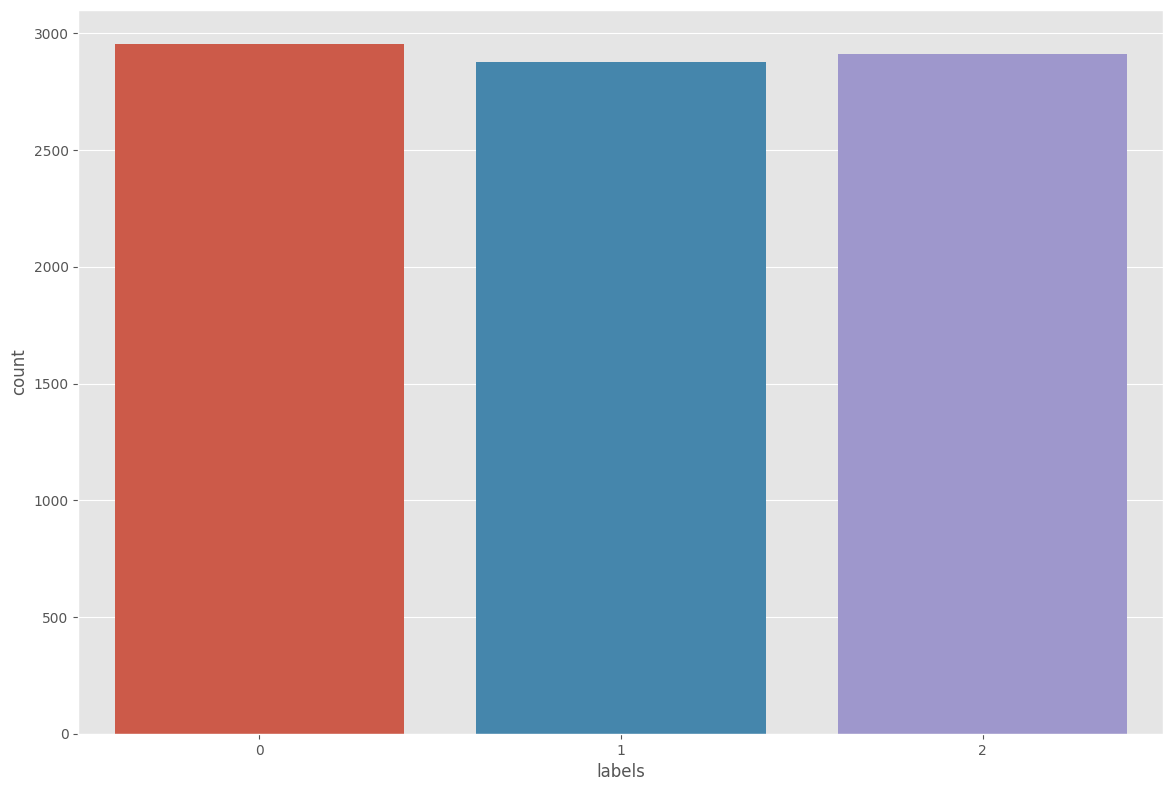

In [582]:
sns.countplot(x='labels', data=fin_news_optimized_5)

<Axes: xlabel='labels', ylabel='count'>

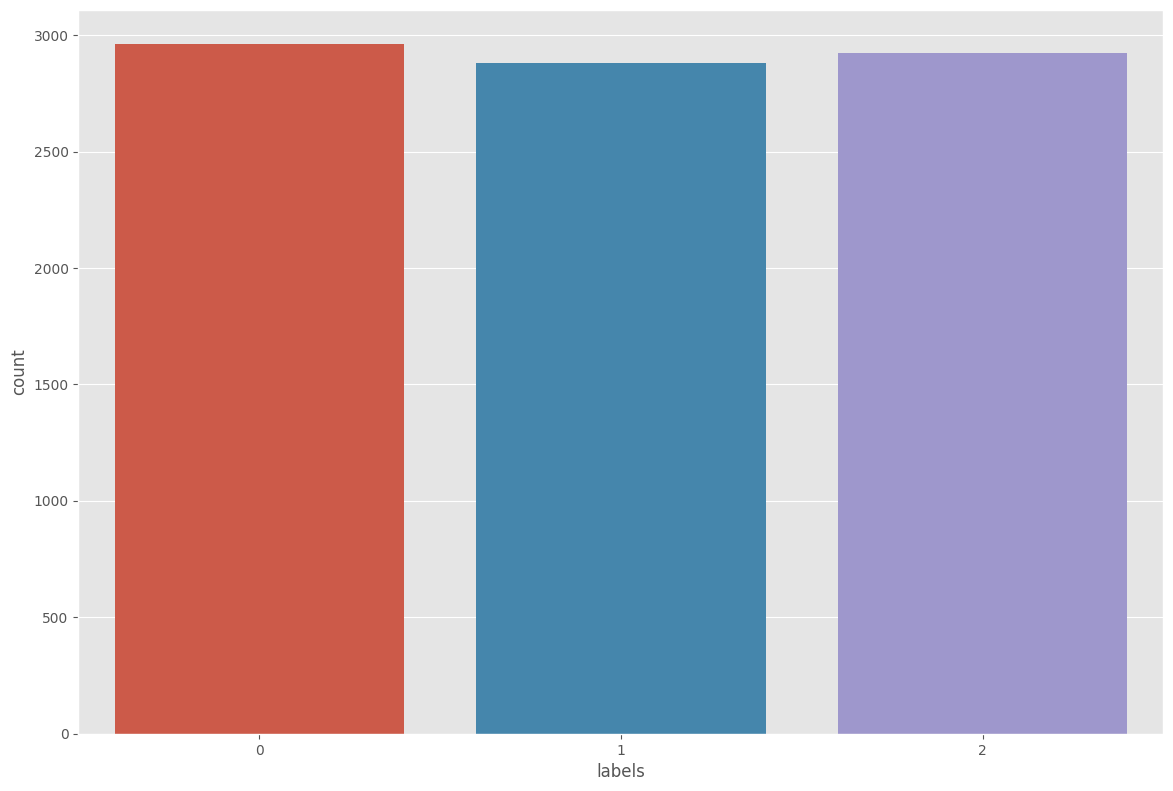

In [676]:
sns.countplot(x='labels', data=fin_news_optimized_6)


In [678]:
fin_news_optimized_6.to_csv('fin_news_optimized_6.csv', index=False)

In [296]:
def preprocess_sentence(text_):

    # Remove links, mentions     
    # reduce all text to lower case
    text_ = text_.lower()

    #Remove mentions
    text_ = re.sub('@\S+', ' ', text_)
    
    #Remove any links
    text_ = re.sub('https?:\S+|http?:\S', ' ', text_)
    
    # Remove puntuations and numbers
    text_ = re.sub('[^a-zA-Z]', ' ', text_)

    # Single character removal 
    text_ = re.sub(r"\s+[a-zA-z]\s+", ' ', text_)

    # Remove multiple spaces
    text_ = re.sub(r'\s+', ' ', text_)
    
    # Lematize
#     tokens_result = tokenizer.tokenize(tweet_)
#     pos_tuple_list = nltk.pos_tag(tokens_result)
#     POS_TRANSLATED = 
#     POS_TRANS()
#     lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens_result]

#     combined_sentence = " ".join(lemmatized_tokens)
#     pattern_ = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
#     tweet_ = pattern_.sub('', tweet_)

    return text_

In [297]:
# Defining function to clean text data
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [298]:
def recurssive(depend, right_dependents_set_, left_dependents_set_ ):
    
    # Step 3a: Attach right dependents if their syntactic relation is part of the predefined set
                right_dependents = []
                left_dependents = []
                depend_ = [depend.text]## Preprocess
                
                
                for right_dep in depend.rights:
                    if right_dep.dep_ in right_dependents_set_:
                        right_dependents.append(right_dep)

                # Step 3b: Attach left dependents if their syntactic relation is part of the predefined set
                for left_dep in depend.lefts:
                    if left_dep.dep_ in left_dependents_set_:
                        left_dependents.append(left_dep)
#                 concept_val = {        
#                     "value": depend.text,
#                     "left_dependents": [dep.text for dep in left_dependents],
#                     "right_dependents": [dep.text for dep in right_dependents],
#                 }

                print(depend,left_dependents, right_dependents)
                
                for i in range(len(left_dependents)):
                    if left_dependents[i].pos_ in predefined_pos:
#                         recurssive(left_dependents[l_dep], right_dependents_set_, left_dependents_set_ )
                        left_dependents[i]=recurssive(left_dependents[i], right_dependents_set_, left_dependents_set_ )
    
                    else:
                        left_dependents[i]=left_dependents[i].text
#                         print(l_dep)
                
                for j in range(len(right_dependents)):
                    if right_dependents[j].pos_ in predefined_pos:
                        right_dependents[j]=recurssive(right_dependents[j], right_dependents_set_, left_dependents_set_ )
                    else:
                        right_dependents[j]=right_dependents[j].text
#                         print(r_dep)
                        # Re-run the steps
                        # Note: You can implement recursive processing here if needed.
                    
                if right_dependents:
#                     right_dependents_txt = [dep.text for dep in right_dependents ]
#                     depend_ = depend_ + right_dependents_txt
                    depend_ = depend_ + right_dependents
                
                if left_dependents:
#                     left_dependents_txt = [dep.text for dep in left_dependents]
#                     depend_ = left_dependents_txt + depend_
                    depend_ = left_dependents + depend_
                    
                print(depend_)
                return  depend_

In [299]:
# Function to flatten a nested list
def flatten(lst):
    for item in lst:
        if isinstance(item, list):
            yield from flatten(item)
        else:
            yield item


def conv_list(input_list_):
    flat_list = list(flatten(input_list_))
    # Convert the list elements to a string sentence
    sentence = " ".join(str(item) if not isinstance(item, list) else " ".join(item) for item in flat_list)
    return sentence




# Flatten the list
input_list = ['Shell', 'increased', [['quarterly'], 'dividend'], 'by', 'to', 'communicated']
sent = conv_list(input_list)
# sent=str(sent)
# Print the string sentence
sent

'Shell increased quarterly dividend by to communicated'

In [300]:
# import stanza

# # Download and install a language model (e.g., English)
# stanza.download('en')

# # Initialize the Stanza pipeline
# nlp = stanza.Pipeline('en')



In [301]:
# Sample statement
# statement = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices"""
# statement = """Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June"""


# # Define a predefined set of syntactic relations to consider
# predefined_relations = {"attr", "amod"}  # Modify as needed
# right_dependents_set = {"prep", "advmod", "dobj", "advcl", "compound"}
# left_dependents_set = {"amod", "compound", "advmod"}  # Pre-defined set for left dependents
# # Define a predefined set of POS tags to consider
# predefined_pos = {"NOUN", "PROPN", "ADJ"}  # Modify as needed
# predefined_pos2 = {"NOUN", "PROPN", "ADJ", "VERB"}  # Modify as needed

# Function to extract concept-value pairs
def extract_concept_value_pairs(sentence_):
    predefined_relations = {"attr", "amod"}  # Modify as needed
    right_dependents_set_ = {"prep", "advmod", "dobj", "advcl", "compound"}
    left_dependents_set_ = {"amod", "compound", "advmod"}  # Pre-defined set for left dependents
    # Define a predefined set of POS tags to consider
    predefined_pos_ = {"NOUN", "PROPN", "ADJ"}  # Modify as needed
    predefined_pos2 = {"NOUN", "PROPN", "ADJ", "VERB"} 
    doc = nlp(sentence_)
    concept_value_pairs = []
    found_entrance = False
    for sent in doc.sents:
        for token in sent:
            # Step 2: Identify subject-verb relation "nsubj" where POS=NN*
            if token.dep_ == "nsubj" and token.pos_ in predefined_pos_:
                found_entrance = True
                subject = token
                governor = token.head
                
                
                subj_dep = recurssive(subject, right_dependents_set_, left_dependents_set_)
                gov_dep = recurssive(governor, right_dependents_set_, left_dependents_set_)
                
                dependency_sent = subj_dep + gov_dep
                dependency_sent = conv_list(dependency_sent)
                
#             else:
#                 dependency_sent = sentence_
    if found_entrance == False:
        dependency_sent = sentence_
    return dependency_sent

state= """the current reference grade instruments are challenging to operate due to their high price and complexity for routine use """
# Extract concept-value pairs from the statement
concept_value_pairs = extract_concept_value_pairs(state)
concept_value_pairs

instruments [current, grade] []
current [] []
['current']
grade [reference] []
reference [] []
['reference']
[['reference'], 'grade']
[['current'], [['reference'], 'grade'], 'instruments']
challenging [] []
['challenging']


'current reference grade instruments challenging'

In [302]:
def Xtrain_pre_processing(x_feature):
    feature = []
    text_ = list(x_feature)
    for txt in text_:
        sent = preprocess_sentence(txt)
#         sent = clean_text(txt)
        
#         extr_con_val = extract_concept_value_pairs(sent)
        feature.append(sent)
    return feature

In [683]:
# X = Xtrain_pre_processing(fin_news['sentence'])
# fin_news['labels'] = fin_news['labels'].astype(int)
# y = fin_news['labels']

X = Xtrain_pre_processing(fin_news_optimized_6['sentence'])
fin_news_optimized_6['labels'] = fin_news_optimized_6['labels'].astype(int)
y = fin_news_optimized_6['labels']

In [684]:
X

['according to gran the company has no plans to move all production to russia although that is where the company is growing ',
 'technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and telecommunications the statement said ',
 'the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported ',
 'with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability ',
 'according to the company updated strategy for the years basware targets long term net sales growth in the range of with an operating profit margin of of net sales ',
 'financing of aspocomp growth aspocomp is aggressively pursuing its growth strateg

In [685]:
X0_train, X0_test, y0_train, y0_test =  train_test_split(X, y, test_size = 0.25, random_state = 42)

In [686]:
# # Save train set
# save_X_y_train = pd.DataFrame({
#     "X0_train": X0_train,
#     "y0_train": y0_train
# })
# train_set_file_path = "C:\\Users\\benjo\\Final Project\\Dataset\\Train_set\\train_set.csv"
# save_X_y_train.to_csv(train_set_file_path, index=False) 




# # Save test set
# save_X_y_test = pd.DataFrame({
#     "X0_test": X0_test,
#     "y0_test": y0_test
# })
# test_set_file_path = "C:\\Users\\benjo\\Final Project\\Dataset\\Test_set\\test_set.csv"
# save_X_y_test.to_csv(test_set_file_path, index=False) 

# Preparing the Embedding Layer

In [687]:
X0_train[0]

'ragutis which is controlled by the finnish brewery reported per cent rise in beer sales to million litres and held an per cent market share '

In [688]:
# word_tokenizer = Tokenizer(
#     num_words= 500,
#     oov_token = '<OOV>'
# )

word_tokenizer = Tokenizer()

word_tokenizer.fit_on_texts(X0_train)

vocab_size = len(word_tokenizer.word_index) + 1
vocab_size

13218

In [689]:
#  This function prepares the embedding layer for our NN, it takes in the feature input and returns a tokenized array with padding 
def prep_embedding_layer(feature_, posit_of_padd_, max_padd_len):


    feature_ = word_tokenizer.texts_to_sequences(feature_)

    feature_ = pad_sequences(feature_, padding=posit_of_padd_, maxlen=max_padd_len, truncating='post')
    
    return feature_

In [690]:
# def max_padding_func(X_trainDf):
#     max_sen_length = 0
#     for i in range(len(X_trainDf)):
#         tokens_result = tokenizer.tokenize(X_trainDf[i])
#         sen_length = len(tokens_result)
#         if sen_length > max_sen_length:
#             max_sen_length = sen_length


#     return max_sen_length

The figure below presents the 2D visualisation of the principal component analysis (PCA) of the word embedding 300-dimensional vectors.

In [691]:
max_length_ = FinText_Word2Vec_cbow.wv['word'].shape[0]

In [692]:
X0_train_emb = prep_embedding_layer(X0_train, 'post', max_length_)
X0_test_emb = prep_embedding_layer(X0_test, 'post', max_length_)

In [693]:
y0_train_OHE =  tensorflow.keras.utils.to_categorical(y0_train, num_classes=3)
y0_test_OHE =  tensorflow.keras.utils.to_categorical(y0_test, num_classes=3)

In [694]:
X0_train[0]

'ragutis which is controlled by the finnish brewery reported per cent rise in beer sales to million litres and held an per cent market share '

In [695]:
y0_train_OHE

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [696]:
print((X0_train_emb.shape, X0_test_emb.shape ))

((6570, 300), (2191, 300))


## Loading Embeddings

In [697]:
FinText_Word2Vec_cbow.wv['hi']

array([-4.51023722e+00,  1.17607497e-01, -3.27431154e+00, -1.40505934e+00,
        3.14249486e-01, -2.11920306e-01, -1.72016072e+00,  5.37094593e-01,
       -3.95378494e+00, -6.92856669e-01,  3.50354123e+00,  1.49054599e+00,
       -5.58598340e-01,  1.12996578e+00,  6.63641632e-01, -3.05580044e+00,
        6.20447874e-01, -5.44819355e-01,  6.96304560e-01, -2.11278439e+00,
       -3.76779675e+00, -1.73961878e+00,  4.93319809e-01, -3.14829081e-01,
        6.86451256e-01,  1.52364194e+00, -2.00060591e-01,  3.86532307e-01,
       -1.53610408e-01, -1.77160883e+00,  2.80607753e-02,  1.22032082e+00,
       -4.16347146e-01, -9.62410450e-01, -2.11797404e+00,  6.27330422e-01,
       -1.75154424e+00, -8.21619749e-01, -2.29648232e+00, -8.59637201e-01,
        4.32372332e-01,  8.03456724e-01, -2.33668518e+00,  2.31352997e+00,
        1.22178578e+00,  1.64005601e+00, -9.44048524e-01, -2.46824786e-01,
        1.92423868e+00,  1.32232332e+00, -3.52571368e+00,  4.44551051e-01,
       -1.05939007e+00,  

In [698]:
if 'bond' in FinText_Word2Vec_cbow.wv:
    print('Yes')

Yes


In [699]:
len(FinText_Word2Vec_cbow.wv['amazon'])

300

In [700]:
def initialize_FinText(vocabSize, maxLength, wordInd, word_emb_model ):
    matrix = np.zeros((vocabSize, maxLength))  
    for word, i in wordInd.items():
        if word in FinText_Word2Vec_cbow.wv: 
            vector_ = word_emb_model[word]
            if vector_ is not None:
                matrix[i] = vector_
            
    return matrix

In [701]:
embedding_matrix = initialize_FinText(vocab_size, max_length_, word_tokenizer.word_index, FinText_Word2Vec_cbow.wv)

In [702]:
embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.50167179e+00,  1.21402717e+00, -4.04431677e+00, ...,
         3.54783863e-01,  1.30911125e-03,  1.70508897e+00],
       [-1.44555199e+00,  3.73404324e-01, -1.89970732e+00, ...,
         3.63037825e+00,  3.83989215e+00,  1.09370947e+00],
       ...,
       [-5.22889048e-02,  2.71966886e-02, -1.10525861e-02, ...,
        -4.06878963e-02, -5.63146826e-03,  5.72349057e-02],
       [-3.15693212e+00,  1.23764314e-01, -2.07463408e+00, ...,
        -3.86529982e-01,  2.21590805e+00, -2.57768512e+00],
       [-1.31619895e+00, -3.45596075e-01, -5.59330761e-01, ...,
         2.25437954e-01,  2.21739560e-01,  6.34576797e-01]])

In [703]:
X0_train[0]

'ragutis which is controlled by the finnish brewery reported per cent rise in beer sales to million litres and held an per cent market share '

In [704]:
X0_train_emb[0]

array([2236,   51,    9, 1647,   17,    1,   28, 2571,  237,   92,  513,
        217,    3,  885,   26,    4,   30, 2977,    5,  541,   27,   92,
        513,   44,   47,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [705]:
embedding_matrix.shape[1]

300

In [706]:
embedding_dim = embedding_matrix.shape[1]

## Create Model

### Define Custom Metrics

In [707]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Derive balancing weight values
Due to the datasets unbalanced nature, we would need to add class weights in order to eliminate bias towards the class that holds the highest volumen of data

In [708]:
type(y0_train)

pandas.core.series.Series

In [709]:
y0_train_emb = np.array(y0_train)

In [710]:
from sklearn.utils.class_weight import compute_class_weight

In [711]:
class_weights = compute_class_weight('balanced', classes=np.unique(y0_train_emb), y=y0_train_emb)
class_weight_dict = dict(enumerate(class_weights))

In [712]:
class_weight_dict

{0: 1.0027472527472527, 1: 1.0032065964269354, 2: 0.994098955969133}

num_lstm_layers: 6
lstm_units_0: 224
dropout_rate_0: 0.4195254782302088
learning_rate: 0.001
lstm_units_1: 32
dropout_rate_1: 0.2
lstm_units_2: 32
dropout_rate_2: 0.2
lstm_units_3: 32
dropout_rate_3: 0.2
lstm_units_4: 32
dropout_rate_4: 0.2
lstm_units_5: 32
dropout_rate_5: 0.2

### Creating the attention layer

In [614]:
# # Attention Layer
# class MyAttention(tensorflow.keras.Model):
#     def __init__(self, units):
#         super(MyAttention, self).__init__()
#         self.W1 = tensorflow.keras.layers.Dense(units)
#         self.W2 = tensorflow.keras.layers.Dense(units)
#         self.V = tensorflow.keras.layers.Dense(1)
 
#     def call(self, features, hidden):
#         hidden_with_time_axis = tensorflow.expand_dims(hidden, 1)

#         score = tensorflow.nn.tanh(
#             self.W1(features) + self.W2(hidden_with_time_axis))
        
#         attention_weights = tensorflow.nn.softmax(self.V(score), axis=1)

#         context_vector = attention_weights * features
#         context_vector = tensorflow.reduce_sum(context_vector, axis=1)
 
#         return context_vector, attention_weights

In [739]:
# class MyAttention(tensorflow.keras.layers.Layer):
#     def __init__(self, units):
#         super(MyAttention, self).__init__()
#         self.units = units

#     def build(self, input_shape):
#         # Define and create layer's variables 
#         self.W1 = self.add_weight(name='W1', shape=(input_shape[-1], self.units), initializer='uniform')
#         self.W2 = self.add_weight(name='W2', shape=(input_shape[-1], self.units), initializer='uniform')
#         self.V = self.add_weight(name='V', shape=(self.units,), initializer='uniform')

#     def call(self, features, hidden):
#         hidden_with_time_axis = tensorflow.expand_dims(hidden, 1)

#         score = tensorflow.nn.tanh(
#             self.W1(features) + self.W2(hidden_with_time_axis))

#         attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

#         context_vector = attention_weights * features
#         context_vector = tensorflow.reduce_sum(context_vector, axis=1)

#         return context_vector, attention_weights

#     def get_config(self):
#         return {'units': self.units}

#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
class MyAttention(tensorflow.keras.layers.Layer):
    def __init__(self, units):
        super(MyAttention, self).__init__()
        self.units = units
        
        self.W1 = tensorflow.keras.layers.Dense(units)
        self.W2 = tensorflow.keras.layers.Dense(units)
        self.V = tensorflow.keras.layers.Dense(1)
#     def build(self, input_shape):
#         # Define and create layer's variables 
#         self.W1 = self.add_weight(name='W1', shape=(input_shape[-1], self.units), initializer='uniform')
#         self.W2 = self.add_weight(name='W2', shape=(input_shape[-1], self.units), initializer='uniform')
#         self.V = self.add_weight(name='V', shape=(self.units,), initializer='uniform')

    def call(self, features, hidden):
        hidden_with_time_axis = tensorflow.expand_dims(hidden, 1)

        score = tensorflow.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))

        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

        context_vector = attention_weights * features
        context_vector = tensorflow.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [616]:
# Add Embedding Layer
sequence_input = Input(shape=(X0_train_emb.shape[1],), dtype="int32")
embedded_sequences = Embedding(vocab_size, 
                               embedding_dim,
                               weights=[embedding_matrix],
                               trainable = False)(sequence_input)

# Add Bidirectional layer
bilstm = Bidirectional(LSTM(64, return_sequences=True), name="bi_lstm_0")(embedded_sequences)
(lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(32, return_sequences=True, return_state=True), name="bi_lstm_1")(bilstm)


# Concatenate RNN hidden states and apply attention
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
context_vector, attention_weights = MyAttention(10)(lstm, state_h)

# Add Dense Layers
dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.05)(dense1)
output = Dense(3, activation="softmax")(dropout)


# Create the Model object
Bi_ATT_2_model = Model(inputs=sequence_input, outputs=output)

# Plot Model
# keras.utils.plot_model(Bi_AT_model, show_shapes=True, dpi=90)
Bi_ATT_2_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 300)]        0           []                               
                                                                                                  
 embedding_38 (Embedding)       (None, 300, 300)     4011900     ['input_15[0][0]']               
                                                                                                  
 bi_lstm_0 (Bidirectional)      (None, 300, 128)     186880      ['embedding_38[0][0]']           
                                                                                                  
 bi_lstm_1 (Bidirectional)      [(None, 300, 64),    41216       ['bi_lstm_0[0][0]']              
                                 (None, 32),                                                

In [619]:
Bi_ATT_2_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['acc', tensorflow.keras.metrics.AUC(name='AUC'), f1_m,precision_m, recall_m])

In [620]:
lstm_nn_path = "C:\\Users\\benjo\\Final Project\\Saved_Bi_ATT_2_model"

monitor_acc = 'val_acc'
monitor_auc = 'val_AUC'
checkpointer = ModelCheckpoint(filepath=lstm_nn_path,
                               verbose=1,
                               monitor=monitor_auc,
                               mode='max',
                               save_best_only=True)

early_stopping = EarlyStopping(monitor=monitor_auc,
                               patience=5,
                               mode='max',
                               restore_best_weights=True)

In [621]:
Bi_ATT_2_model_history = Bi_ATT_2_model.fit(
                   X0_train_emb,
                   y0_train_OHE,
    class_weight=class_weight_dict,
                   batch_size=32,
                   epochs=20,
                   verbose = 1,
                   validation_split=0.2,
                   callbacks= [early_stopping,
                              checkpointer])

Epoch 1/20
164/164 [==============================] - ETA: 0s - loss: 0.7273 - acc: 0.6780 - AUC: 0.8549 - f1_m: 0.5923 - precision_m: 0.6728 - recall_m: 0.5462
Epoch 1: val_AUC improved from -inf to 0.90900, saving model to C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model\assets


164/164 [==============================] - 1469s 9s/step - loss: 0.7273 - acc: 0.6780 - AUC: 0.8549 - f1_m: 0.5923 - precision_m: 0.6728 - recall_m: 0.5462 - val_loss: 0.5837 - val_acc: 0.7462 - val_AUC: 0.9090 - val_f1_m: 0.7476 - val_precision_m: 0.7804 - val_recall_m: 0.7188
Epoch 2/20
164/164 [==============================] - ETA: 0s - loss: 0.4103 - acc: 0.8422 - AUC: 0.9545 - f1_m: 0.8387 - precision_m: 0.8560 - recall_m: 0.8227
Epoch 2: val_AUC improved from 0.90900 to 0.93182, saving model to C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model\assets


164/164 [==============================] - 989s 6s/step - loss: 0.4103 - acc: 0.8422 - AUC: 0.9545 - f1_m: 0.8387 - precision_m: 0.8560 - recall_m: 0.8227 - val_loss: 0.5169 - val_acc: 0.7965 - val_AUC: 0.9318 - val_f1_m: 0.7963 - val_precision_m: 0.8151 - val_recall_m: 0.7790
Epoch 3/20
164/164 [==============================] - ETA: 0s - loss: 0.2381 - acc: 0.9140 - AUC: 0.9838 - f1_m: 0.9143 - precision_m: 0.9201 - recall_m: 0.9089
Epoch 3: val_AUC improved from 0.93182 to 0.94052, saving model to C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_Bi_ATT_2_model\assets


164/164 [==============================] - 1187s 7s/step - loss: 0.2381 - acc: 0.9140 - AUC: 0.9838 - f1_m: 0.9143 - precision_m: 0.9201 - recall_m: 0.9089 - val_loss: 0.5035 - val_acc: 0.8293 - val_AUC: 0.9405 - val_f1_m: 0.8247 - val_precision_m: 0.8352 - val_recall_m: 0.8148
Epoch 4/20
164/164 [==============================] - ETA: 0s - loss: 0.1272 - acc: 0.9577 - AUC: 0.9948 - f1_m: 0.9577 - precision_m: 0.9603 - recall_m: 0.9552
Epoch 4: val_AUC did not improve from 0.94052
164/164 [==============================] - 1538s 9s/step - loss: 0.1272 - acc: 0.9577 - AUC: 0.9948 - f1_m: 0.9577 - precision_m: 0.9603 - recall_m: 0.9552 - val_loss: 0.6060 - val_acc: 0.8209 - val_AUC: 0.9358 - val_f1_m: 0.8197 - val_precision_m: 0.8233 - val_recall_m: 0.8163
Epoch 5/20
164/164 [==============================] - ETA: 0s - loss: 0.0949 - acc: 0.9693 - AUC: 0.9967 - f1_m: 0.9692 - precision_m: 0.9710 - recall_m: 0.9674
Epoch 5: val_AUC did not improve from 0.94052
164/164 [===================

In [624]:
Bi_ATT_2_model_score = Bi_ATT_2_model.evaluate(X0_test_emb, y0_test_OHE, verbose=1)

69/69 [==============================] - 268s 4s/step - loss: 0.5081 - acc: 0.8024 - AUC: 0.9393 - f1_m: 0.8002 - precision_m: 0.8110 - recall_m: 0.7899


In [625]:
import pickle

# Define the file path where you want to save the tokenizer
# file_path = "C:\\Users\\benjo\\Final Project\\Tokenizers\\Bi_LSTM_ATT\\Second\\tokenizer_bi_att_1.pkl"

# Save the tokenizer to the specified file path
# with open(file_path, 'wb') as tokenizer_file:
#     pass
#     pickle.dump(word_tokenizer, tokenizer_file)

In [626]:
Bi_ATT_2_score_auc = Bi_ATT_2_model.predict(X0_test_emb)
y_pred_Bi_ATT_2_auc = np.argmax(Bi_ATT_2_score_auc, axis=1)

69/69 [==============================] - 236s 3s/step


### Current Model With Combined Dataset - Attention Layer

In [627]:
actual_labels = [0, 1, 2 ]

key = ["Negative", "Neutral", "Positive"]

# from sklearn.metrics import confusion_matrix
confusion_mtrx_bi_att_2_auc = confusion_matrix(np.argmax(y0_test_OHE, axis=1), y_pred_Bi_ATT_2_auc, labels=actual_labels)
confusion_mtrx_bi_att_2_auc

confusion_df = pd.DataFrame(### Previous Model With Only 1 Dataset Attention Layer, index=key, columns=key)
confusion_df

,Negative,Neutral,Positive
Negative,594,91,50
Neutral,41,629,29
Positive,56,165,531


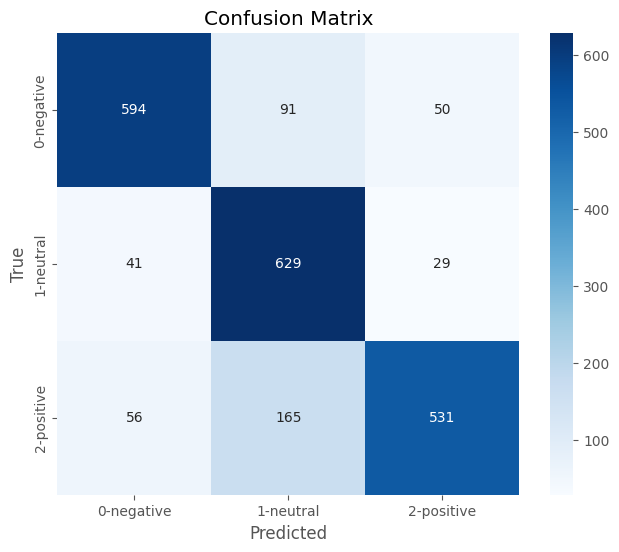

In [631]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtrx_bi_att_2_auc, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['0-negative', '1-neutral', '2-positive'],
            yticklabels=['0-negative', '1-neutral', '2-positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Previous Model With Only 1 Dataset Attention Layer

In [387]:
actual_labels = [0, 1, 2 ]

key = ["Negative", "Neutral", "Positive"]

# from sklearn.metrics import confusion_matrix
confusion_mtrx_bi_att_auc = confusion_matrix(np.argmax(y0_test_OHE, axis=1), y_pred_Bi_ATT_auc, labels=actual_labels)
confusion_mtrx_bi_att_auc

confusion_df = pd.DataFrame(confusion_mtrx_bi_att_auc, index=key, columns=key)
confusion_df

,Negative,Neutral,Positive
Negative,99,29,15
Neutral,22,625,66
Positive,4,105,247


- Rows = Actual classes
- Columns = Predicted Classes

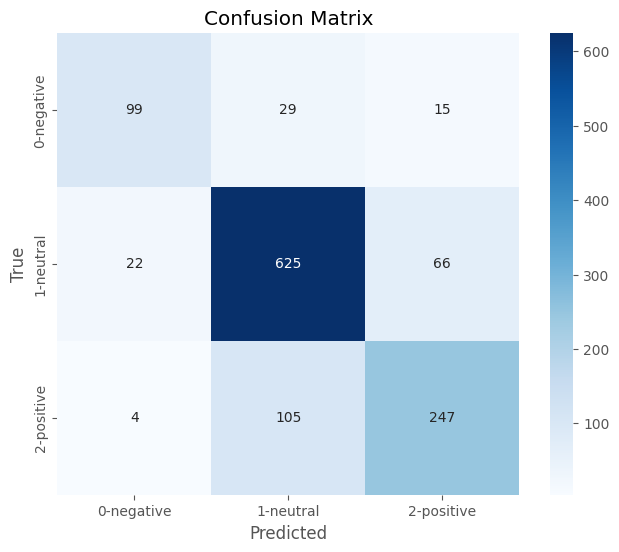

In [629]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtrx_bi_att_auc, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['0-negative', '1-neutral', '2-positive'],
            yticklabels=['0-negative', '1-neutral', '2-positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Previous Winning Model Non-Attention Layer

In [382]:
lstm_model_auc_confM = [[104,  42,  10],
[ 17, 616,  86],
[ 22, 101, 214]]

lstm_model_auc_confM = np.array(lstm_model_auc_confM)
lstm_auc_confusion_df = pd.DataFrame(lstm_model_auc_confM, index=key, columns=key)
lstm_auc_confusion_df

,Negative,Neutral,Positive
Negative,104,42,10
Neutral,17,616,86
Positive,22,101,214


### Previous Winning Model Hyper-Tuned

In [384]:
lstm_model_hyp_auc_confM = [[110,  35,  11],
[ 34, 621,  64],
[ 19, 102, 216]]

lstm_model_auc_confM = np.array(lstm_model_hyp_auc_confM)
lstm_hyp_auc_confusion_df = pd.DataFrame(lstm_model_auc_confM, index=key, columns=key)
lstm_hyp_auc_confusion_df

,Negative,Neutral,Positive
Negative,110,35,11
Neutral,34,621,64
Positive,19,102,216


### Evaulating Current Model epochs & loss

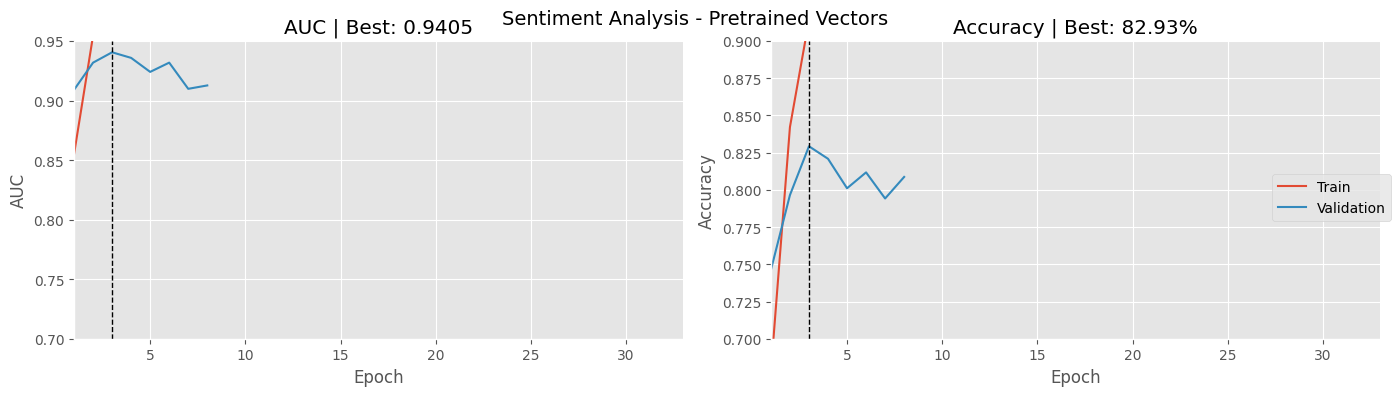

In [632]:
df = pd.DataFrame(Bi_ATT_2_model_history.history)
best_auc = df.val_AUC.max()
best_acc = df.val_acc.max()

fig, axes = plt.subplots(ncols=2, figsize=(14,4))
df.index = df.index.to_series().add(1)
df[['AUC', 'val_AUC']].plot(ax=axes[0], 
                            title=f'AUC | Best: {best_auc:.4f}', 
                            legend=False, 
                            xlim=(1, 33),
                            ylim=(.7, .95))

axes[0].axvline(df.val_AUC.idxmax(), ls='--', lw=1, c='k')
df[['acc', 'val_acc']].plot(ax=axes[1], 
                                              title=f'Accuracy | Best: {best_acc:.2%}', 
                                              legend=False, 
                                              xlim=(1, 33),
                                      ylim=(.7, .9))
axes[1].axvline(df.val_acc.idxmax(), ls='--', lw=1, c='k')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('AUC')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
fig.suptitle('Sentiment Analysis - Pretrained Vectors', fontsize=14)
fig.legend(['Train', 'Validation'], loc='center right')

sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.9)
# fig.savefig(results_path / 'imdb_pretrained', dpi=300);

In [389]:
def live_test_model(_model, padding_, _text):
    X_live_test = Xtrain_pre_processing([_text])
    print(X_live_test)
    X_live_test = prep_embedding_layer(X_live_test, 'post', padding_)
    print(X_live_test)
    print(X_live_test.shape)
    yhat = _model.predict(X_live_test)
    
    predicted_probabilities = yhat[0]

    # Format and print the probabilities
    formatted_probabilities = [float("{:.6f}".format(prob)) for prob in predicted_probabilities]
#     formatted_probabilities = formatted_probabilities.as
    return formatted_probabilities

## Test: Ability to Predict Positive Sentences

In [633]:
tst = live_test_model(Bi_ATT_2_model, max_length_, "Shell Posts Record First-Quarter Profit on Boost From Gas Unit")
tst

['shell posts record first quarter profit on boost from gas unit']
[[ 986 1265  303   37   44   34    7 1113   10  338  157    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   

[0.0042, 0.00285, 0.99295]

In [634]:
test_txt = """
It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.
"""

results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results


[' it a difference that could help new chief executive officer wael sawan reinforce his message that shell can stand above the competition by reliably delivering generous cash returns to investors ']
[[   21   106    22   179  1110    32   388   608  1398 11354   184  5904
     22   986   100  3418   290     1  1332    15  7220   283  5083     4
    393     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     

[0.938583, 0.05137, 0.010046]

In [366]:
predicted_probabilities

array([7.1420992e-04, 8.6389792e-01, 1.3538781e-01], dtype=float32)

In [635]:
test_txt = """
Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.
"""

results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results


[' shell plc posted record first quarter profit and maintained the pace of share buybacks as strong trading performance and higher liquefied natural gas volumes offset lower energy prices ']
[[ 986  161  634  303   37   44   34    5    1 3426    2   50 6326   11
   293  402  514    5   80 4392  567  338 1299 4417  258  152  101    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 

[0.07804, 0.03607, 0.885889]

## Test: Ability to Predict Negative Sentences

In [636]:
test_txt = """
Shell’s Earnings From Gas Trading to Drop Significantly
"""

results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results


[' shell earnings from gas trading to drop significantly ']
[[ 986  217   10  338  402    4 1183 2201    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

[0.966731, 0.011483, 0.021786]

In [637]:
test_txt = """
Oil and gas production will also be down compared with the first three months of the year due to field maintenance, while the company’s chemicals business is expected to post a loss, Shell said in an update ahead of its full results later this month.
"""
results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results

[' oil and gas production will also be down compared with the first three months of the year due to field maintenance while the company chemicals business is expected to post loss shell said in an update ahead of its full results later this month ']
[[ 122    5  338  114   12   53   20   69   95   14    1   37  232  249
     2    1   30  376    4 1768  583  195    1   13 1395   45    9  156
     4  736   71  986   23    3   26  781  505    2   18  410  374 1089
    42  182    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    

[0.8129, 0.146104, 0.040997]

In [638]:
test_txt = """
The stock will drop
"""
results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results

[' the stock will drop ']
[[   1  110   12 1183    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  

[0.66129, 0.243577, 0.095134]

In [642]:
test_txt = """
The stock price is currently up but it will drop soon
"""
results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results

[' the stock price is currently up but it will drop soon ']
[[   1  110  109    9  426   25  113   21   12 1183 1190    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

[0.178867, 0.271523, 0.549609]

In [652]:
test_txt = """
The stock price is currently prevailing but in the second quarter it will drop
"""
results = live_test_model(Bi_ATT_2_model, max_length_, test_txt)
results

[' the stock price is currently prevailing but in the second quarter it will drop ']
[[   1  110  109    9  426  113    3    1  129   44   21   12 1183    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

[0.199072, 0.710679, 0.090249]

## Test full article 

In [432]:
def test_full_articel(_sentences, model_):
    # Print the list of sentences
    for i, sentence in enumerate(_sentences, 1):
        print(f"Sentence {i}: {sentence}\n")
    

    article_sentiment= []

    for sentence in _sentences:
        results = live_test_model(model_, max_length_, sentence)
        article_sentiment.append(results)
    
    sent_pred = np.argmax(article_sentiment, axis=1)
    sent_pred
    sentiment_averages = [sum(col) / len(col) for col in zip(*article_sentiment)]

    # ////////////////////// Calculate median ///////////////////////////////
    # Transpose the data (swap rows and columns) for easier column-wise processing
    transposed_data = list(map(list, zip(*article_sentiment)))

    # Calculate the median for each column
    sentiment_medians = [statistics.median(col) for col in transposed_data]

    # sentiment_medians now contains the median of each column
    # Print the list of sentences
    for i, sentence in enumerate(_sentences, 1):
        print(f"Sentence {i} {get_key_by_value(label_interp, sent_pred[i-1])} : {sentence}\n")
    print(sentiment_averages)
    print(sentiment_medians)
    print(np.unique(sent_pred, return_counts=True))
    return sentiment_averages

In [389]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the Bloomberg news article
url = "https://www.bloomberg.com/news/articles/2023-05-04/shell-maintains-pace-of-share-buybacks-as-profit-beats-estimates?in_source=embedded-checkout-banner&leadSource=uverify%20wall"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all <p> tags with the specified class
    paragraphs = soup.find_all("p", class_="Paragraph_text-SqIsdNjh0t0-")

    # Extract and print the text from each <p> tag
    for paragraph in paragraphs:
        print(paragraph.get_text())
else:
    print("Failed to retrieve the web page.")

Unable to scrape website, Captcha block has been placed

### Retrieve the Saved Model

In [401]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benjo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [649]:
# Custom Metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# # Custom Attention Layer
# class MyAttention(tensorflow.keras.Model):
#     def __init__(self, units):
#         super(MyAttention, self).__init__()
#         self.W1 = tensorflow.keras.layers.Dense(units)
#         self.W2 = tensorflow.keras.layers.Dense(units)
#         self.V = tensorflow.keras.layers.Dense(1)
 
#     def call(self, features, hidden):
#         hidden_with_time_axis = tensorflow.expand_dims(hidden, 1)

#         score = tensorflow.nn.tanh(
#             self.W1(features) + self.W2(hidden_with_time_axis))
        
#         attention_weights = tensorflow.nn.softmax(self.V(score), axis=1)

#         context_vector = attention_weights * features
#         context_vector = tensorflow.reduce_sum(context_vector, axis=1)
 
#         return context_vector, attention_weights

class MyAttention(tensorflow.keras.layers.Layer):
    def __init__(self, units):
        super(MyAttention, self).__init__()
        self.units = units
        self.W1 = tensorflow.keras.layers.Dense(units)
        self.W2 = tensorflow.keras.layers.Dense(units)
        self.V = tensorflow.keras.layers.Dense(1)
 
    def call(self, features, hidden):
        hidden_with_time_axis = tensorflow.expand_dims(hidden, 1)

        score = tensorflow.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))
        
        attention_weights = tensorflow.nn.softmax(self.V(score), axis=1)

        context_vector = attention_weights * features
        context_vector = tensorflow.reduce_sum(context_vector, axis=1)
 
        return context_vector, attention_weights

    def get_config(self):
        config = super(MyAttention, self).get_config()
        config.update({'units': self.units})
        return config

In [650]:
# Create custom metrics object to load model
custom_objects_ = {
    'recall_m': recall_m,
    'precision_m': precision_m,
    'f1_m': f1_m,
    'MyAttention': MyAttention
    
}

In [651]:
from keras.utils import CustomObjectScope




# Specify the path to the directory where the model is saved
relative_model_path = "Final Project\Saved_Bi_ATT_2_model"

# # Load the model
# with CustomObjectScope(custom_objects_):
#     loaded_Bi_ATT_model = load_model(relative_model_path)
loaded_Bi_ATT_2_model = load_model(relative_model_path, custom_objects=custom_objects_)
loaded_Bi_ATT_2_model.summary()


TypeError: __init__() missing 1 required positional argument: 'units'

In [430]:
# # Load the pre-trained model
# Bi_ATT_path_ = "Final Project\Saved_Updated_Bi_ATT_model"

# load_pretrained_BI_ATT_model = tensorflow.keras.models.load_model(Bi_ATT_path_, custom_objects=custom_objects_)

# # Find the "Attention" layer by its name
# attention_layer = load_pretrained_BI_ATT_model.signatures["serving_default"].inputs["Attention"]

# # Rename the layer to "MyAttention"
# loaded_model.signatures["serving_default"].inputs["MyAttention"] = attention_layer
# del loaded_model.signatures["serving_default"].inputs["Attention"]

# # Save the updated model in the SavedModel format
# updated_Bi_ATT_path_ = "Final Project\Saved_Updated_Bi_ATT_model"
# tf.saved_model.save(load_pretrained_BI_ATT_model, updated_Bi_ATT_path_)
# # pretrained_BI_ATT_model.save('saved_model_1.pb')

In [ ]:
# Define the file path where the tokenizer was saved
relative_tokenizer_path = "Tokenizers/LSTM/First/tokenizer.pkl"


# Load the tokenizer from the specified file path
with open(relative_tokenizer_path, 'rb') as tokenizer_file:
    loaded_word_tokenizer = pickle.load(tokenizer_file)

### Positive article 

In [436]:
article = """
Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.

The company will repurchase a further $4 billion of shares, the same amount as in the prior period. That contrasts with UK peer BP Plc, which saw its share price drop more than 8% earlier this week when it announced a smaller buyback of $1.75 billion.

It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.

“Following BP’s cut to the buyback, we received many questions on what Shell would do this quarter given a weaker macro environment,” RBC analyst Biraj Borkhataria said in a note. “What was the fuss about?”.

Shell shares rose as much as 3.5% before paring gains to 2,354 pence as of 11:45 a.m. in London.

The integrated gas business was a key part of the resilience of Shell’s profit. It posted adjusted earnings of $4.9 billion in the quarter, the second-best performance on record after the prior period. The price of the fuel was down from a year earlier as the energy crisis ebbed in Europe, but the company offset that with higher volumes and lower operating expenses.

Crucial to that segment are Shell’s gas traders. While the company doesn’t break out trading’s contribution to earnings, the company said results were similar to the fourth quarter, when it was a main contributor to record profits for the unit.

“Trading and more importantly optimization in general play a critical role in our business model today for the conventional energy,” Sawan said on a call with reporters. “But I think will play an even bigger role going forward as we look at new energies.”

“Against a lower commodity-price backdrop in the first quarter, Shell’s wide beat with adjusted earnings at $9.65 billion, 20% ahead of consensus, and roughly in line with fourth-quarter levels, is largely a testament to the strength of its industry-leading global gas portfolio.” — Bloomberg Intelligence Senior Industry Analyst Will Hares.

Shell’s adjusted net income was $9.65 billion in the first quarter, an increase of 5.7% from $9.13 billion a year earlier. That was well ahead of even the highest analyst estimate and a record level for the first quarter. Net debt dropped to $44.2 billion, down more than $4 billion from a year ago.

Production volumes of liquefied natural gas — which has become a key fuel for Europe after Russia cut gas exports — jumped 6% in the quarter with the Prelude facility in Australia returning to operations after maintenance, Shell said. Greater output driving earnings has been a theme this season with Exxon reporting it strongest-ever start to a year after a jump in oil production from new wells.

Shell has scheduled an investor briefing for June when Sawan, who took over the top job at the beginning of the year, will lay out his own strategy. “We would expect any adjustment to the dividend or overall distribution framework to be left for the capital markets day,” said RBC’s Borkhataria.
"""

In [437]:
# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(article)

# Print the list of sentences
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}\n")

Sentence 1: 
Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.

Sentence 2: The company will repurchase a further $4 billion of shares, the same amount as in the prior period.

Sentence 3: That contrasts with UK peer BP Plc, which saw its share price drop more than 8% earlier this week when it announced a smaller buyback of $1.75 billion.

Sentence 4: It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.

Sentence 5: “Following BP’s cut to the buyback, we received many questions on what Shell would do this quarter given a weaker macro environment,” RBC analyst Biraj Borkhataria said in a note.

Sentence 6: “What was the fuss about?”.

Sentence 7: Shell shares rose as much as 3.5% before paring gains to 2,354

In [438]:
article_sentiment= []

for sentence in sentences:
    results = live_test_model(Bi_AT_model, max_length_, sentence)
    article_sentiment.append(results)

[' shell plc posted record first quarter profit and maintained the pace of share buybacks as strong trading performance and higher liquefied natural gas volumes offset lower energy prices ']
[[2804  147  502  837   49   39   25    4    1    2   41   18  427  700
   319    4  527 6593  749  791  877 3463  259  212  399    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 

1/1 [==============================] - 0s 94ms/step
[' what was the fuss about ']
[[788  30   1  57   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 

1/1 [==============================] - 0s 87ms/step
['crucial to that segment are shell gas traders ']
[[   5   27  634   37 2804  791    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  

1/1 [==============================] - 0s 92ms/step
['net debt dropped to billion down more than billion from year ago ']
[[ 26 856 901   5 158 100  99  77 158  11  29 687   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

1/1 [==============================] - 0s 96ms/step


In [439]:
article_sentiment

[[0.042971, 0.033813, 0.923217],
 [0.005143, 0.9817, 0.013157],
 [0.937842, 0.016827, 0.04533],
 [0.000714, 0.863898, 0.135388],
 [0.953032, 0.037101, 0.009866],
 [0.007478, 0.960411, 0.032111],
 [0.056977, 0.872342, 0.070681],
 [0.009508, 0.555833, 0.434659],
 [0.034066, 0.319004, 0.64693],
 [0.996652, 0.002256, 0.001091],
 [0.004061, 0.973364, 0.022574],
 [0.115689, 0.153269, 0.731042],
 [0.006048, 0.580329, 0.413623],
 [0.036927, 0.582114, 0.380959],
 [0.07248, 0.541268, 0.386251],
 [0.995849, 0.00078, 0.003372],
 [0.429983, 0.096418, 0.473599],
 [0.011525, 0.002758, 0.985717],
 [0.678375, 0.301487, 0.020138],
 [0.000549, 0.98843, 0.011021]]

In [443]:
sent_polarity= []
for i in range(len(article_sentiment)):
    sent_polarity.append(article_sentiment[i][2] - article_sentiment[i][0]) 
    
sent_polarity

[0.880246,
 0.008014,
 -0.892512,
 0.13467400000000002,
 -0.943166,
 0.024633000000000002,
 0.013703999999999994,
 0.425151,
 0.612864,
 -0.995561,
 0.018513,
 0.6153529999999999,
 0.407575,
 0.344032,
 0.313771,
 -0.9924769999999999,
 0.04361599999999999,
 0.974192,
 -0.658237,
 0.010471999999999999]

In [444]:
article_polarity =sum(sent_polarity) / len(sent_polarity)
article_polarity

0.017242850000000007

In [440]:
sentiment_averages = [sum(col) / len(col) for col in zip(*article_sentiment)]

print(sentiment_averages)

[0.26979345, 0.44317009999999996, 0.2870363]


In [441]:
sent_pred = np.argmax(article_sentiment, axis=1)
sent_pred

array([2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 1],
      dtype=int64)

In [445]:
# Print the list of sentences
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i} {get_key_by_value(label_interp, sent_pred[i-1])} : {sentence}\n")

Sentence 1 POSITIVE : 
Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.

Sentence 2 NEUTRAL : The company will repurchase a further $4 billion of shares, the same amount as in the prior period.

Sentence 3 NEGATIVE : That contrasts with UK peer BP Plc, which saw its share price drop more than 8% earlier this week when it announced a smaller buyback of $1.75 billion.

Sentence 4 NEUTRAL : It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.

Sentence 5 NEGATIVE : “Following BP’s cut to the buyback, we received many questions on what Shell would do this quarter given a weaker macro environment,” RBC analyst Biraj Borkhataria said in a note.

Sentence 6 NEUTRAL : “What was the fuss about?”.

Sentence 7 NEUTRA

In [460]:
np.unique(sent_pred, return_counts=True)

(array([0, 1, 2], dtype=int64), array([ 5, 10,  5], dtype=int64))

### Negative article 

### Q3 2021

In [655]:
neg_title = """
Oil giant Shell misses on third-quarter profit as Dan Loeb calls for the company to break up
"""
neg_article ="""
Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.

Shell also announced it had set itself a bigger carbon reduction target.

The Anglo-Dutch company posted adjusted earnings of $4.1 billion for the three months through to the end of September. That compared with $955 million over the same period a year earlier and $5.5 billion for the second quarter of 2021.

Analysts had expected third-quarter adjusted earnings to come in at almost $6 billion, according to Refinitiv.

Shell issued a note to investors earlier this month warning that Hurricane Ida in the Gulf of Mexico likely had an aggregate adverse impact of roughly $400 million on adjusted earnings.

The company on Thursday said lower contributions from trading and optimization when compared to the second quarter had also impacted third-quarter results. This was only partly offset by a global energy supply crunch that has sent oil and gas prices soaring.

“This quarter we’ve generated record cash flow, maintained capital discipline and announced our intention to distribute $7 billion to our shareholders from the sale of our Permian assets,” Ben van Beurden, CEO of Shell, said in a statement.

Billionaire activist investor Dan Loeb on Wednesday called on Shell to break up into multiple companies to strengthen its performance and market value.

His comments came shortly after it emerged that Loeb’s Third Point had built a stake of roughly $750 million in Shell, according to various media reports that couldn’t be independently verified by CNBC.

Shell acknowledged Loeb’s letter to clients calling for the company to split.

The company added that it “regularly reviews and evaluates the Company’s strategy with a focus on generating shareholder value. As part of this ongoing process, Shell welcomes open dialogue with all shareholders, including Third Point.”

Shares of Shell dipped 3% during early morning trade in London. The oil and gas company has seen its stock price climb roughly 41% year-to-date, having collapsed almost 45% in 2020.

Dividends declared to Shell shareholders for the quarter amounted to 24 cents per share, unchanged from the previous quarter.

Net debt came in at $57.5 billion, reflecting a decrease from $67 billion at the end of the second quarter. Shell said this was mainly driven by free cash flow generation."""

title_results = live_test_model(Bi_AT_model, max_length_, neg_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(neg_article)
article_results = test_full_articel(sentences, Bi_ATT_2_model)

print(f"Title :  {title_results}", f"\nArticle : {article_results}")

[' oil giant shell misses on third quarter profit as dan loeb calls for the company to break up ']
[[ 122  899  986 3789    7  160   44   34   11 7407  408    6    1   13
     4  773   25    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 

1/1 [==============================] - 0s 83ms/step
['that compared with million over the same period year earlier and billion for the second quarter of ']
[[ 22  95  14  29  55   1 192  47  30 186   5  96   6   1 129  44   2   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 

1/1 [==============================] - 0s 78ms/step
[' this quarter we ve generated record cash flow maintained capital discipline and announced our intention to distribute billion to our shareholders from the sale of our permian assets ben van beurden ceo of shell said in statement ']
[[   42    44    74  2775   768   303   283   849   103  8342     5   190
    117 12560     4  4169    96     4   117   480    10     1   276     2
    117   900  3943   177     2   986    23     3   728     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0    

1/1 [==============================] - 0s 83ms/step
['as part of this ongoing process shell welcomes open dialogue with all shareholders including third point shares of shell dipped during early morning trade in london ']
[[  11  149    2   42 3545  352  986 6670  542   14   81  480  158  160
   937   52    2  986  212  787  817  200    3  463    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0  

1/1 [==============================] - 0s 86ms/step
Sentence 1 NEGATIVE : 
Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.

Sentence 2 NEGATIVE : Shell also announced it had set itself a bigger carbon reduction target.

Sentence 3 NEUTRAL : The Anglo-Dutch company posted adjusted earnings of $4.1 billion for the three months through to the end of September.

Sentence 4 NEGATIVE : That compared with $955 million over the same period a year earlier and $5.5 billion for the second quarter of 2021.

Sentence 5 NEUTRAL : Analysts had expected third-quarter adjusted earnings to come in at almost $6 billion, according to Refinitiv.

Sentence 6 NEGATIVE : Shell issued a note to investors earlier this month warning that Hurricane Ida in the Gulf of Mexico likely had an aggregate adverse impact of roughly $400 million on adjusted earnings.

Sentence 7 NEGATIVE : The compa

### Q2 2023

In [656]:
neg_article ="""
Shell Plc’s earnings from natural gas trading will be significantly lower in the second quarter, due to seasonal shifts in the market.

Oil and gas production will also be down compared with the first three months of the year due to field maintenance, while the company’s chemicals business is expected to post a loss, Shell said in an update ahead of its full results later this month.

Extreme swings in European natural gas prices last year helped propel Shell’s profits to record levels, with trading in the unit accounting for as much as a quarter of overall profitability. The strong performance continued into this year, helping the company deliver its best-ever first quarter, but conditions were less advantageous in the following months.

Shares were slightly lower in early trading in London.

Earnings from the unit are “expected to be significantly lower compared to a strong first quarter due to seasonality and fewer optimization opportunities,” Shell said in a statement. The division’s performance returned to average levels seen in 2021 and 2022.

The weaker trading outcome was expected after exceptional results in recent quarters, according to Biraj Borkhataria, an analyst at RBC Europe Ltd. “Overall, we see the statement as neutral given most operational indicators are looking in line with market expectations,” he wrote in a note.

Shell’s US peer Exxon Mobil Corp. has said that its second-quarter earnings will be reduced by about $4 billion compared to the first three months of the year because of lower natural gas prices and oil-refining margins. The US major is seeking to build up a trading business to compete with European majors like Shell.

"""



# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(neg_article)

# Print the list of sentences
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}\n")
    

article_sentiment= []

for sentence in sentences:
    results = live_test_model(Bi_ATT_2_model, max_length_, sentence)
    article_sentiment.append(results)
    
sent_pred = np.argmax(article_sentiment, axis=1)
sent_pred
sentiment_averages = [sum(col) / len(col) for col in zip(*article_sentiment)]

# ////////////////////// Calculate median ///////////////////////////////
# Transpose the data (swap rows and columns) for easier column-wise processing
transposed_data = list(map(list, zip(*article_sentiment)))

# Calculate the median for each column
sentiment_medians = [statistics.median(col) for col in transposed_data]

# sentiment_medians now contains the median of each column

print(sentiment_averages)
print(sentiment_medians)
print(np.unique(sent_pred, return_counts=True))

Sentence 1: 
Shell Plc’s earnings from natural gas trading will be significantly lower in the second quarter, due to seasonal shifts in the market.

Sentence 2: Oil and gas production will also be down compared with the first three months of the year due to field maintenance, while the company’s chemicals business is expected to post a loss, Shell said in an update ahead of its full results later this month.

Sentence 3: Extreme swings in European natural gas prices last year helped propel Shell’s profits to record levels, with trading in the unit accounting for as much as a quarter of overall profitability.

Sentence 4: The strong performance continued into this year, helping the company deliver its best-ever first quarter, but conditions were less advantageous in the following months.

Sentence 5: Shares were slightly lower in early trading in London.

Sentence 6: Earnings from the unit are “expected to be significantly lower compared to a strong first quarter due to seasonality and 

1/1 [==============================] - 0s 77ms/step
['shares were slightly lower in early trading in london ']
[[ 52  86 686 258   3 787 402   3 463   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 

1/1 [==============================] - 0s 74ms/step
['the us major is seeking to build up trading business to compete with european majors like shell ']
[[    1    75   297     9  1662     4   978    25   402    45     4  3728
     14   420 12720   320   986     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0  

In [658]:
pos_title="""Shell Posts Record First-Quarter Profit on Boost From Gas Unit
"""

pos_article = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.

The company will repurchase a further $4 billion of shares, the same amount as in the prior period. That contrasts with UK peer BP Plc, which saw its share price drop more than 8% earlier this week when it announced a smaller buyback of $1.75 billion.

It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.

“Following BP’s cut to the buyback, we received many questions on what Shell would do this quarter given a weaker macro environment,” RBC analyst Biraj Borkhataria said in a note. “What was the fuss about?”.

Shell shares rose as much as 3.5% before paring gains to 2,354 pence as of 11:45 a.m. in London.

The integrated gas business was a key part of the resilience of Shell’s profit. It posted adjusted earnings of $4.9 billion in the quarter, the second-best performance on record after the prior period. The price of the fuel was down from a year earlier as the energy crisis ebbed in Europe, but the company offset that with higher volumes and lower operating expenses.

Crucial to that segment are Shell’s gas traders. While the company doesn’t break out trading’s contribution to earnings, the company said results were similar to the fourth quarter, when it was a main contributor to record profits for the unit.

“Trading and more importantly optimization in general play a critical role in our business model today for the conventional energy,” Sawan said on a call with reporters. “But I think will play an even bigger role going forward as we look at new energies.”

“Against a lower commodity-price backdrop in the first quarter, Shell’s wide beat with adjusted earnings at $9.65 billion, 20% ahead of consensus, and roughly in line with fourth-quarter levels, is largely a testament to the strength of its industry-leading global gas portfolio.” — Bloomberg Intelligence Senior Industry Analyst Will Hares.

Shell’s adjusted net income was $9.65 billion in the first quarter, an increase of 5.7% from $9.13 billion a year earlier. That was well ahead of even the highest analyst estimate and a record level for the first quarter. Net debt dropped to $44.2 billion, down more than $4 billion from a year ago.

Production volumes of liquefied natural gas — which has become a key fuel for Europe after Russia cut gas exports — jumped 6% in the quarter with the Prelude facility in Australia returning to operations after maintenance, Shell said. Greater output driving earnings has been a theme this season with Exxon reporting it strongest-ever start to a year after a jump in oil production from new wells.

Shell has scheduled an investor briefing for June when Sawan, who took over the top job at the beginning of the year, will lay out his own strategy. “We would expect any adjustment to the dividend or overall distribution framework to be left for the capital markets day,” said RBC’s Borkhataria.
"""
title_results = live_test_model(Bi_ATT_2_model, max_length_, pos_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(pos_article)
article_results = test_full_articel(sentences, Bi_ATT_2_model)

print(f"Title :  {title_results}", f"\nArticle : {article_results}")


# title_results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, pos_title)


# # Use nltk to tokenize the article into sentences
# sentences = nltk.sent_tokenize(pos_article)
# article_results = test_full_articel(sentences, tuned_hyper_lstm_cw_model)

# final_rslts = []
# for i in range(len(article_results)):
#     final_rslts.append(class_weight_dict[i] * article_results[i])
    

# print(article_results)
# print(f"Title :  {title_results}", f"\nArticle : {final_rslts}")

['shell posts record first quarter profit on boost from gas unit ']
[[ 986 1265  303   37   44   34    7 1113   10  338  157    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

1/1 [==============================] - 0s 88ms/step
['that contrasts with uk peer bp plc which saw its share price drop more than earlier this week when it announced smaller buyback of billion ']
[[   22    14   202 10794  1172   161    49  2055    18    50   109  1183
     63    61   186    42    92   226    21   190  1472     2    96     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0   

1/1 [==============================] - 0s 98ms/step
['the integrated gas business was key part of the resilience of shell profit ']
[[   1 2012  338   45   31  440  149    2    1 6943    2  986   34    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

1/1 [==============================] - 0s 86ms/step
[' trading and more importantly optimization in general play critical role in our business model today for the conventional energy sawan said on call with reporters ']
[[ 402    5   63 3712    3  394 1466 4059 1405    3  117   45  511   65
     6    1 4655  152   23    7  752   14 3318    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    

1/1 [==============================] - 0s 81ms/step
['production volumes of liquefied natural gas which has become key fuel for europe after russia cut gas exports jumped in the quarter with the prelude facility in australia returning to operations after maintenance shell said ']
[[  114  1299     2  4392   567   338    49    19   854   440   591     6
    318    40   169   529   338  1619  1721     3     1    44    14     1
    344     3   465 10659     4    91    40   583   986    23     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0    

In [659]:
pos_title="""Shell beats expectations with $9.6 billion in first-quarter profit, boosted by fuel trading
"""

pos_article = """
British oil giant Shell on Thursday posted stronger-than-anticipated first-quarter profit, extending a record run of bumper results after commodity prices surged in 2022 following Russia’s full-scale invasion of Ukraine.

Shell reported adjusted earnings of $9.6 billion for the first three months of the year, comfortably beating analyst expectations of $8.6 billion, according to Refinitiv.

The company posted adjusted earnings of $9.1 billion over the same period a year earlier and $9.8 billion for the final three months of 2022.

Shares of the oil major rose 2.2% during mid-morning deals.

Flush with cash, Shell held the rate of its share buyback program steady at $4 billion over the next three months and kept its dividend unchanged at $0.2875 per share.

Shell said its quarterly results reflected improved operational performance and lower costs to run its day-to-day business. It added that robust results from fuel trading and optimization offset the impact of weaker oil and gas prices.

The company reported first-quarter net debt of $44.2 billion, down from $48.5 billion when compared to the same period a year earlier.

Reflecting on the first-quarter earnings, CEO Wael Sawan said the company “delivered strong results and robust operational performance, against a backdrop of ongoing volatility, while continuing to provide vital supplies of secure energy”.

Shell’s results follow hot on the heels of U.K. rival BP, which on Tuesday reported a drop in first-quarter profit but beat analyst expectations on robust oil and gas trading. Shares of BP fell on the news, however, as the London-listed company said it planned to slim down its share buybacks.
Big Oil smashed previous annual profit records in 2022 during a period of volatile oil and gas prices in the wake of Russia’s full-scale invasion of Ukraine.

For its part, Shell posted adjusted earnings of $39.9 billion for the full-year 2022. That comfortably surpassed the $28.4 billion in 2008 which Shell said was the firm’s previous annual record and was more than double the firm’s full-year 2021 profit of $19.29 billion.

Big Oil executives have typically sought to defend their bumper profits amid a barrage of criticism, tending to highlight the importance of energy security in the transition away from fossil fuels and suggesting higher taxes could deter investment.

The burning of fossil fuels such as coal, oil and gas, is the chief driver of the climate emergency.

Shell, which is aiming to become a net-zero emissions business by 2050, said that first-quarter adjusted earnings for its Renewable and Energy Solutions unit came in at $389 million, up from $293 million for the final three months of last year.

"""
title_results = live_test_model(Bi_ATT_2_model, max_length_, pos_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(pos_article)
article_results = test_full_articel(sentences, Bi_ATT_2_model)

print(f"Title :  {title_results}", f"\nArticle : {article_results}")


['shell beats expectations with billion in first quarter profit boosted by fuel trading ']
[[ 986 3657 2107   14   96    3   37   44   34 1702   15  591  402    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    

1/1 [==============================] - 0s 84ms/step
['the company reported first quarter net debt of billion down from billion when compared to the same period year earlier ']
[[  1  13 248  37  44  33 580   2  96  69  10  96 226  95   4   1 192  47
   30 186   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 

1/1 [==============================] - 0s 83ms/step
['for its part shell posted adjusted earnings of billion for the full year ']
[[   6   18  149  986  634 3663  217    2   96    6    1  410   30    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0

1/1 [==============================] - 0s 86ms/step
Sentence 1 POSITIVE : 
British oil giant Shell on Thursday posted stronger-than-anticipated first-quarter profit, extending a record run of bumper results after commodity prices surged in 2022 following Russia’s full-scale invasion of Ukraine.

Sentence 2 NEUTRAL : Shell reported adjusted earnings of $9.6 billion for the first three months of the year, comfortably beating analyst expectations of $8.6 billion, according to Refinitiv.

Sentence 3 POSITIVE : The company posted adjusted earnings of $9.1 billion over the same period a year earlier and $9.8 billion for the final three months of 2022.

Sentence 4 POSITIVE : Shares of the oil major rose 2.2% during mid-morning deals.

Sentence 5 NEUTRAL : Flush with cash, Shell held the rate of its share buyback program steady at $4 billion over the next three months and kept its dividend unchanged at $0.2875 per share.

Sentence 6 NEUTRAL : Shell said its quarterly results reflected improved

In [770]:
neg_title="""Oil giant Shell posts sharp drop in second-quarter profit on weaker commodity prices
"""

neg_article = """
British oil giant Shell on Thursday reported a sharp year-on-year drop in second-quarter profit, citing lower fossil fuel prices and refining margins.

Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv.

The company reported adjusted earnings of $11.5 billion during the same period of last year and $9.6 billion for the first three months of 2023.

Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June. It also announced $3 billion in share buybacks, a program it expects to complete over the next three months.

“At the end of the day, we have a balanced energy transition strategy. What we are looking to do is to be able to do the right things for now and for the future, both for our shareholders and for the planet,” Shell CEO Wael Sawan told CNBC’s “Squawk Box Europe” on Thursday".

“We are focused on creating more value with less emissions,” Sawan said. “And what that means is we will continue to pull all the levers to drive further value growth in the organization, while at the same time we will continue to meet our aggressive emissions reduction targets — both for our own emissions, as well as for our customers”.
Shares of the London-listed oil major slipped 2% on Thursday morning.

“The company had previously set the scene with downgrades in its earnings estimates to reflect a more normalised trading environment, but it has still missed expectations with today’s results,” said Stuart Lamont, investment manager at RBC Brewin Dolphin.

“The share buyback programme and increased dividend are good news for shareholders, but will inevitably come with questions attached in the current environment,” he added.
"""

title_results = live_test_model(Bi_ATT_2_model, max_length_, neg_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(neg_article)
article_results = test_full_articel(sentences, Bi_ATT_2_model)

print(f"Title :  {title_results}", f"\nArticle : {article_results}")


['oil giant shell posts sharp drop in second quarter profit on weaker commodity prices ']
[[ 115  852 1102 1251 3327 1144    3  118   46   33    7 1889 4515   91
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0

1/1 [==============================] - 0s 78ms/step
['shell increased its quarterly dividend by to per share as previously communicated in mid june ']
[[1102  125   19 1236  292   17    4   92   47   11  549 4201    3  746
   185    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 

1/1 [==============================] - 0s 76ms/step
[' and what that means is we will continue to pull all the levers to drive further value growth in the organization while at the same time we will continue to meet our aggressive emissions reduction targets both for our own emissions as well as for our customers ']
[[   5  339   22 1736    9   80   12  377    4 2038   70    1    4 1104
   264  141  167    3    1 1114  199   15    1  176  108   80   12  377
     4 1321  111 5847 2057 1686  902  267    6  111  430 2057   11  121
    11    6  111  140    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   

# Hyperparameter Tuning


In [723]:
# Hyperparam train_test split
X1_train_emb, X1_val_emb, y1_train_OHE, y1_val_OHE =  train_test_split(X0_train_emb, y0_train_OHE, test_size = 0.25, random_state = 42)
# len(X0_train_emb), len(y0_train_OHE)
# print((X0_train_emb.shape, X0_test_emb.shape ))

# print(f"Shape of both Hyper-param feature train & test data: {(X1_train_emb.shape, X1_test_emb.shape)}")
# print(f"Length of both Hyper-param feature & label test data: {len(X1_test_emb), len(y1_test_OHE)}")

In [661]:
from kerastuner.tuners import RandomSearch

C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\2610907151.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [751]:
class MyAttention(tensorflow.keras.layers.Layer):
    def __init__(self, units):
        super(MyAttention, self).__init__()
        self.units = units
        
        self.W1 = tensorflow.keras.layers.Dense(units)
        self.W2 = tensorflow.keras.layers.Dense(units)
        self.V = tensorflow.keras.layers.Dense(1)
#     def build(self, input_shape):
#         # Define and create layer's variables 
#         self.W1 = self.add_weight(name='W1', shape=(input_shape[-1], self.units), initializer='uniform')
#         self.W2 = self.add_weight(name='W2', shape=(input_shape[-1], self.units), initializer='uniform')
#         self.V = self.add_weight(name='V', shape=(self.units,), initializer='uniform')

    def call(self, features, hidden):
        hidden_with_time_axis = tensorflow.expand_dims(hidden, 1)

        score = tensorflow.nn.tanh(
            self.W1(features) + self.W2(hidden_with_time_axis))

        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

        context_vector = attention_weights * features
        context_vector = tensorflow.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [764]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
import numpy as np

# Create or load your X0_train_emb, y_train, vocab_size, embedding_matrix
# ...

# Custom Layer Class
# class MyAttention(tf.keras.layers.Layer):
#     def __init__(self, units,**kwargs):
#         super(MyAttention, self).__init__()
#         self.units = units

#         self.W1 = tf.keras.layers.Dense(units)
#         self.W2 = tf.keras.layers.Dense(units)
#         self.V = tf.keras.layers.Dense(1)

#     def call(self, features, hidden):
#         hidden_with_time_axis = tf.expand_dims(hidden, 1)

#         score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

#         attention_weights = tf.nn.softmax(self.V * score, axis=1)

#         context_vector = attention_weights * features
#         context_vector = tf.reduce_sum(context_vector, axis=1)

#         return context_vector, attention_weights
    
#     def get_config(self):
#         return {'units': self.units}

#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)

# class MyAttention(tf.keras.layers.Layer):
#     def __init__(self, units):
#         super(MyAttention, self).__init__()
#         self.units = units

#         self.W1 = tf.keras.layers.Dense(units)
#         self.W2 = tf.keras.layers.Dense(units)
#         self.V = tf.keras.layers.Dense(1)

#     def call(self, features, hidden):
#         hidden_with_time_axis = tf.expand_dims(hidden, 1)

#         score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

#         attention_weights = tf.nn.softmax(self.V(score), axis=1)  # Use self.V as a layer

#         context_vector = attention_weights * features
#         context_vector = tf.reduce_sum(context_vector, axis=1)

#         return context_vector, attention_weights

class MyAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(MyAttention, self).__init__()
        self.units = units

        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        score = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))

        attention_weights = tf.nn.softmax(self.V(score), axis=1)  # Use self.V as a layer

        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

    def get_config(self):
        config = super(MyAttention, self).get_config()
        config.update({'units': self.units})
        return config

def create_bi_att_2_model(vocab_size, embedding_matrix, params):
    # Add Embedding Layer
    sequence_input = Input(shape=(X0_train_emb.shape[1],), dtype="int32")
    embedded_sequences = Embedding(vocab_size, 
                                   embedding_matrix.shape[1],  # Use the embedding_matrix dimension
                                   weights=[embedding_matrix],
                                   trainable=False)(sequence_input)

    # Add Bidirectional layer
    lstm_layers = []
    for _ in range(params['num_lstm_layers']):
        bilstm = Bidirectional(LSTM(params['lstm_units'], return_sequences=True), name=f"bi_lstm_{_}")(embedded_sequences)
        lstm_layers.append(bilstm)
        embedded_sequences = bilstm  # Pass output as input to the next layer

    (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(params['lstm_units'], return_sequences=True, return_state=True), name="bi_lstm_final")(embedded_sequences)

    # Concatenate RNN hidden states and apply attention
    state_h = Concatenate()([forward_h, backward_h])
    state_c = Concatenate()([forward_c, backward_c])
    context_vector, attention_weights = MyAttention(params['attention_units'])(lstm, state_h)

    # Add Dense Layers
    dense1 = Dense(params['units'], activation="relu")(context_vector)
    dropout = Dropout(params['dropout_rate'])(dense1)
    output = Dense(3, activation="softmax")(dropout)

    # Create the Model object
    model = Model(inputs=sequence_input, outputs=output)
    
    return model

def build_random_search_model(hp):
    params = {
        'num_lstm_layers': hp.Choice('num_lstm_layers', values=[1, 2, 3]),  # Number of LSTM layers
        'learning_rate': hp.Choice('learning_rate', values=[0.001, 0.01, 0.1]),
        'batch_size': hp.Choice('batch_size', values=[32, 64, 128]),
        'units': hp.Choice('units', values=[16, 32, 64]),
        'dropout_rate': hp.Float('dropout_rate', min_value=0.2, max_value=0.4, step=0.1),
        'lstm_units': hp.Choice('lstm_units', values=[32, 64, 128]),
        'attention_units': hp.Choice('attention_units', values=[8, 16, 32])
    }
    
    model = create_bi_att_2_model(vocab_size, embedding_matrix, params)
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc', keras.metrics.AUC(name='AUC'), f1_m,precision_m, recall_m])
    return model

def random_search(x_tr, y_tr, x_val, y_val, num_trials_, obj_, cw_):
    tuner = RandomSearch(
        build_random_search_model,
        objective=obj_,
        max_trials=num_trials_,
        directory='random_search_logs',
        project_name = 'Bi_ATT_random_search'
    )

    tuner.search(x=x_tr, 
                 y=y_tr, 
                 epochs=15, 
                 validation_data=(x_val , y_val ), 
                 class_weight=cw_ )

    best_model = tuner.get_best_models(1)[0]
    return best_model

# Define the hyperparameter search space
param_grid = {
    'num_lstm_layers': [1, 2, 3],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'units': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'lstm_units': [32, 64, 128],
    'attention_units': [8, 16, 32]
}



In [765]:
best_model = random_search(X1_train_emb, y1_train_OHE, X1_val_emb, y1_val_OHE, num_trials_=10, obj_='val_AUC', cw_=class_weight_dict)
best_model.summary()


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_lstm_layers
0.001             |0.001             |learning_rate
32                |32                |batch_size
32                |32                |units
0.3               |0.3               |dropout_rate
64                |64                |lstm_units
32                |32                |attention_units

Epoch 1/15
154/154 [==============================] - 2238s 14s/step - loss: 0.7702 - acc: 0.6749 - AUC: 0.8385 - f1_m: 0.5971 - precision_m: 0.6765 - recall_m: 0.5429 - val_loss: 0.5961 - val_acc: 0.7705 - val_AUC: 0.9104 - val_f1_m: 0.7344 - val_precision_m: 0.8148 - val_recall_m: 0.6702
Epoch 2/15
154/154 [==============================] - 2202s 14s/step - loss: 0.4612 - acc: 0.8321 - AUC: 0.9429 - f1_m: 0.8249 - precision_m: 0.8519 - recall_m: 0.8005 - val_loss: 0.5084 - val_acc: 0.8058 - val_AUC: 0.9310 - val_f1_m: 0.8019 - val_precision_m: 0.8349 - val_r

KeyboardInterrupt: 

In [769]:
import tensorflow as tf
import kerastuner as kt
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
import numpy as np


# Define Hyperparameter Search Space
hp = kt.HyperParameters()
hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
hp.Int('lstm_units', min_value=32, max_value=256, step=32)
hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
hp.Int('num_lstm_layers', min_value=1, max_value=3, step=1)  # Number of LSTM layers
hp.Int('batch_size', min_value=32, max_value=128, step=32)  # Batch size
hp.Int('attention_units', min_value=10, max_value=50, step=10)  # Attention units

# Define Model-Building Function
def build_model(hp):
    sequence_input = Input(shape=(X0_train_emb.shape[1],), dtype="int32")
    embedded_sequences = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False)(sequence_input)

    # Create LSTM layers based on the hyperparameter 'num_lstm_layers'
    lstm_layers = []
    for _ in range(hp.Int('num_lstm_layers', min_value=1, max_value=3, step=1)):
        lstm = Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=256, step=32), return_sequences=True))(embedded_sequences)
        lstm_layers.append(lstm)
    
    # Concatenate LSTM layers if there are multiple
    if len(lstm_layers) > 1:
        lstm = Concatenate()(lstm_layers)
    else:
        lstm = lstm_layers[0]

    (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(32, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

    state_h = Concatenate()([forward_h, backward_h])
    state_c = Concatenate()([forward_c, backward_c])
    context_vector, attention_weights = MyAttention(hp.Int('attention_units', min_value=10, max_value=50, step=10))(lstm, state_h)

    dense1 = Dense(20, activation="relu")(context_vector)
    dropout = Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))(dense1)
    output = Dense(3, activation="softmax")(dropout)

    model = Model(inputs=sequence_input, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['acc', keras.metrics.AUC(name='AUC'), f1_m,precision_m, recall_m]
    )
    return model

# Define a Keras Tuner Object 
tuner = kt.Hyperband(build_model,
                     objective='val_AUC',
                     max_epochs=25,
                     factor=3,
                     directory='my_dir',
                     project_name='Bi_ATT_3_Model')

# Perform Hyperparameter Search
tuner.search(x=X1_train_emb,
             y= y1_train_OHE,
             epochs=25,
             batch_size=hp.Int('batch_size', min_value=32, max_value=128, step=32),  # Batch size
             validation_data=(X1_val_emb, y1_val_OHE), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Retrieve the Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_lstm_layers
32                |32                |lstm_units
40                |40                |attention_units
0.4               |0.4               |dropout
0.0001752         |0.0001752         |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
 61/154 [==========>...................] - ETA: 5:32 - loss: 1.0954 - acc: 0.4144 - AUC: 0.5751 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00

KeyboardInterrupt: 

In [738]:
# Perform random search with AUC as the scoring metric
n_iter_search = 7
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring=make_scorer(auc_scorer, greater_is_better=True))
random_search_result = random_search.fit(X1_train_emb, 
                                         y1_train_OHE,
                                         class_weight=class_weight_dict,
                                         batch_size=32,
                                         epochs=15,
                                         verbose=1,
                                         validation_data=(X1_val_emb, y1_val_OHE),
                                         callbacks=[early_stopping, checkpointer])

# Print the best hyperparameters and corresponding AUC score
print("Best AUC Score: {:.4f}".format(random_search_result.best_score_))
print("Best Hyperparameters: ", random_search_result.best_params_)

ValueError: 
All the 21 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_54" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DE961739A0> of type 'Dense'.


Call arguments received by layer "my_attention_54" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_55" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DEACFEB6D0> of type 'Dense'.


Call arguments received by layer "my_attention_55" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_56" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DEB4A79940> of type 'Dense'.


Call arguments received by layer "my_attention_56" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_57" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF056197F0> of type 'Dense'.


Call arguments received by layer "my_attention_57" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 128), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 128), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_58" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DEB5B84910> of type 'Dense'.


Call arguments received by layer "my_attention_58" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 128), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 128), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_59" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF05B17970> of type 'Dense'.


Call arguments received by layer "my_attention_59" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 128), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 128), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_60" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF05FF64C0> of type 'Dense'.


Call arguments received by layer "my_attention_60" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 128), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 128), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_61" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF080769D0> of type 'Dense'.


Call arguments received by layer "my_attention_61" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 128), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 128), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_62" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DE94C1D4C0> of type 'Dense'.


Call arguments received by layer "my_attention_62" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 128), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 128), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_63" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF06DEB4F0> of type 'Dense'.


Call arguments received by layer "my_attention_63" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 64), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 64), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_64" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF07CB1490> of type 'Dense'.


Call arguments received by layer "my_attention_64" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 64), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 64), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_65" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF058CEE80> of type 'Dense'.


Call arguments received by layer "my_attention_65" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 64), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 64), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_66" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DE961E2CA0> of type 'Dense'.


Call arguments received by layer "my_attention_66" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_67" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF05AC6A30> of type 'Dense'.


Call arguments received by layer "my_attention_67" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_68" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF06209160> of type 'Dense'.


Call arguments received by layer "my_attention_68" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_69" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF068D2F10> of type 'Dense'.


Call arguments received by layer "my_attention_69" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_70" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF04BF7F40> of type 'Dense'.


Call arguments received by layer "my_attention_70" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_71" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF04508970> of type 'Dense'.


Call arguments received by layer "my_attention_71" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 256), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 256), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_72" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF03F56820> of type 'Dense'.


Call arguments received by layer "my_attention_72" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 64), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 64), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_73" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF0391D910> of type 'Dense'.


Call arguments received by layer "my_attention_73" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 64), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 64), dtype=float32)

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\benjo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\16388325.py", line 29, in create_model
    context_vector, attention_weights = MyAttention(units_attention)(lstm, state_h)
  File "C:\Users\benjo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\benjo\AppData\Local\Temp\__autograph_generated_fileph8sujas.py", line 12, in tf__call
    attention_weights = ag__.converted_call(ag__.ld(tensorflow).nn.softmax, ((ag__.ld(self).V * ag__.ld(score)),), dict(axis=1), fscope)
TypeError: Exception encountered when calling layer "my_attention_74" (type MyAttention).

in user code:

    File "C:\Users\benjo\AppData\Local\Temp\ipykernel_1968\1005494201.py", line 21, in call  *
        attention_weights = tensorflow.nn.softmax(self.V * score, axis=1)

    TypeError: Expected float32, but got <keras.layers.core.dense.Dense object at 0x000001DF032DD970> of type 'Dense'.


Call arguments received by layer "my_attention_74" (type MyAttention):
  • features=tf.Tensor(shape=(None, 300, 64), dtype=float32)
  • hidden=tf.Tensor(shape=(None, 64), dtype=float32)


In [722]:
# Perform random search with AUC as the scoring metric
n_iter_search = 7
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring=make_scorer(auc_scorer, greater_is_better=True))
random_search_result = random_search.fit(X1_train_emb, 
                                         y1_train_OHE,
                                         class_weight=class_weight_dict,
                                         batch_size=32,
                                         epochs=15,
                                         verbose=1,
                                         validation_data=(X1_val_emb, y1_val_OHE),
                                         callbacks=[early_stopping, checkpointer])

# Print the best hyperparameters and corresponding AUC score
print("Best AUC Score: {:.4f}".format(random_search_result.best_score_))
print("Best Hyperparameters: ", random_search_result.best_params_)

In [ ]:
# # Define a custom scorer based on AUC
# auc_scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

# # Perform random search with AUC as the scoring metric
# n_iter_search = 7
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring=auc_scorer)
# random_search_result = random_search.fit(X1_train_emb, 
#                                          y1_train_OHE,
#                                          class_weight=class_weight_dict,
#                                          batch_size=32,
#                                          epochs=15,
#                                          verbose = 1,
#                                          validation_data=(X1_val_emb, y1_val_OHE),
#                                          callbacks= [early_stopping,
#                                                   checkpointer])

# # Print the best hyperparameters and corresponding AUC score
# print("Best AUC Score: {:.4f}".format(random_search_result.best_score_))
# print("Best Hyperparameters: ", random_search_result.best_params_)

In [ ]:
lstm_nn_path = "C:\\Users\\benjo\\Final Project\\Tuned Models\\Class_Weights\\Bi_LSTM_ATT\\Saved_Hyp_Bi_ATT_1_model"

monitor_acc = 'val_acc'
monitor_auc = 'val_AUC'
checkpointer = ModelCheckpoint(filepath=lstm_nn_path,
                               verbose=1,
                               monitor=monitor_auc,
                               mode='max',
                               save_best_only=True)

early_stopping = EarlyStopping(monitor=monitor_auc,
                               patience=4,
                               mode='max',
                               restore_best_weights=True)

In [ ]:
Bi_ATT_2_model.fit(
                   X0_train_emb,
                   y0_train_OHE,
    class_weight=class_weight_dict,
                   batch_size=32,
                   epochs=20,
                   verbose = 1,
                   validation_split=0.2,
                   callbacks= [early_stopping,
                              checkpointer])

In [131]:
# def build_lstm_model(hp):
#     model = keras.Sequential()
#     model.add(Embedding(vocab_size, embedding_dim, input_length=X0_train_emb.shape[1], weights=[embedding_matrix], trainable=False))

#     for i in range(hp.Int("num_lstm_layers", min_value=1, max_value=7)):
#         model.add(LSTM(units=hp.Int("lstm_units_" + str(i), min_value=32, max_value=256, step=32), return_sequences=True))
#         model.add(Dropout(rate=hp.Float("dropout_rate_" + str(i), min_value=0.2, max_value=0.5)))

#     model.add(Flatten())
#     model.add(Dense(3, activation="softmax"))

#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])),
#                   loss="categorical_crossentropy",
#                   metrics=['acc', keras.metrics.AUC(name='AUC'), f1_m,precision_m, recall_m])

#     return model

In [69]:
tuner = RandomSearch(
    build_lstm_model,
    objective="val_AUC",
    max_trials=10,  # Adjust this based on your computational resources
    directory="tuner_logs",
    project_name="lstm_hyperparameter_tuning"
)

In [81]:
# Hyperparam train_test split
X1_train_emb, X1_val_emb, y1_train_OHE, y1_val_OHE =  train_test_split(X0_train_emb, y0_train_OHE, test_size = 0.25, random_state = 0)
# len(X0_train_emb), len(y0_train_OHE)
# print((X0_train_emb.shape, X0_test_emb.shape ))

print(f"Shape of both Hyper-param feature train & test data: {(X1_train_emb.shape, X1_test_emb.shape)}")
print(f"Length of both Hyper-param feature & label test data: {len(X1_test_emb), len(y1_test_OHE)}")

Shape of both Hyper-param feature train & test data: ((2725, 300), (909, 300))
Length of both Hyper-param feature & label test data: (909, 909)


In [84]:
tuner.search(X1_train_emb, y1_train_OHE, epochs=20, validation_data=(X1_val_emb, y1_val_OHE))

Trial 10 Complete [00h 50m 57s]
val_AUC: 0.9050576686859131

Best val_AUC So Far: 0.917488694190979
Total elapsed time: 22h 47m 30s
INFO:tensorflow:Oracle triggered exit


In [92]:
# best_hyperp_noClassWeights = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperp_noClassWeights.values.items()

dict_items([('num_lstm_layers', 4), ('lstm_units_0', 160), ('dropout_rate_0', 0.3686598090516785), ('learning_rate', 0.001), ('lstm_units_1', 192), ('dropout_rate_1', 0.2923251119882539), ('lstm_units_2', 224), ('dropout_rate_2', 0.40490290618860947), ('lstm_units_3', 224), ('dropout_rate_3', 0.4021554188788967)])

In [93]:
for key, value in best_hyperp_noClassWeights.values.items():
    print(f"{key}: {value}")

num_lstm_layers: 4
lstm_units_0: 160
dropout_rate_0: 0.3686598090516785
learning_rate: 0.001
lstm_units_1: 192
dropout_rate_1: 0.2923251119882539
lstm_units_2: 224
dropout_rate_2: 0.40490290618860947
lstm_units_3: 224
dropout_rate_3: 0.4021554188788967


In [ ]:
# lstm_model_auc = Sequential()
# lstm_model_auc.add(Embedding(vocab_size, embedding_dim, input_length= X0_train_emb.shape[1], weights= [embedding_matrix], trainable=False ))
# lstm_model_auc.add(LSTM(160, return_sequences=True))
# lstm_model_auc.add(Dropout(0.3686598090516785))
# lstm_model_auc.add(LSTM(64, return_sequences=True))
# lstm_model_auc.add(Dropout(0.2))
# lstm_model_auc.add(LSTM(64, return_sequences=True))
# lstm_model_auc.add(Dropout(0.2))
# lstm_model_auc.add(LSTM(64, return_sequences=True))
# lstm_model_auc.add(Dropout(0.2))
# lstm_model_auc.add(Flatten())
# lstm_model_auc.add(Dense(3, activation="softmax"))


# lstm_model_auc.summary()
# lstm_model_auc.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['acc', tensorflow.keras.metrics.AUC(name='AUC'), f1_m,precision_m, recall_m])

In [97]:
tuned_lstm_model = build_lstm_model(best_hyperp_noClassWeights)
tuned_lstm_model.fit(
                   X0_train_emb,
                   y0_train_OHE,
                   batch_size=128,
                   epochs=10,
                   verbose = 1,
                   validation_split=0.2,
                   callbacks= [early_stopping_auc,
                              checkpointer_auc])

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.8425 - acc: 0.6209 - AUC: 0.7994 - f1_m: 0.5612 - precision_m: 0.6779 - recall_m: 0.5088 
Epoch 1: val_AUC did not improve from 0.91469
23/23 [==============================] - 470s 20s/step - loss: 0.8425 - acc: 0.6209 - AUC: 0.7994 - f1_m: 0.5612 - precision_m: 0.6779 - recall_m: 0.5088 - val_loss: 0.6958 - val_acc: 0.7056 - val_AUC: 0.8687 - val_f1_m: 0.6980 - val_precision_m: 0.7305 - val_recall_m: 0.6684
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.5599 - acc: 0.7771 - AUC: 0.9139 - f1_m: 0.7728 - precision_m: 0.7989 - recall_m: 0.7488 
Epoch 2: val_AUC did not improve from 0.91469
23/23 [==============================] - 537s 23s/step - loss: 0.5599 - acc: 0.7771 - AUC: 0.9139 - f1_m: 0.7728 - precision_m: 0.7989 - recall_m: 0.7488 - val_loss: 0.5847 - val_acc: 0.7662 - val_AUC: 0.9079 - val_f1_m: 0.7605 - val_precision_m: 0.7787 - val_recall_m: 0.7432
Epoch 3/10
23/23 [================

In [98]:
tuner_cw = RandomSearch(
    build_lstm_model,
    objective="val_AUC",
    max_trials=10,  # Adjust this based on your computational resources
    directory="tuner_logs",
    project_name="lstm_hyperparameter_cw_tuning"
)


In [100]:
tuner_cw.search(X1_train_emb, y1_train_OHE, epochs=20, validation_data=(X1_val_emb, y1_val_OHE), class_weight=class_weight_dict)


Trial 10 Complete [04h 28m 37s]
val_AUC: 0.9206827878952026

Best val_AUC So Far: 0.9256913065910339
Total elapsed time: 1d 17h 54m 18s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [101]:
best_hyperp_WithClassWeights = tuner_cw.get_best_hyperparameters(num_trials=1)[0]

In [102]:
for key, value in best_hyperp_WithClassWeights.values.items():
    print(f"{key}: {value}")

num_lstm_layers: 6
lstm_units_0: 224
dropout_rate_0: 0.4195254782302088
learning_rate: 0.001
lstm_units_1: 32
dropout_rate_1: 0.2
lstm_units_2: 32
dropout_rate_2: 0.2
lstm_units_3: 32
dropout_rate_3: 0.2
lstm_units_4: 32
dropout_rate_4: 0.2
lstm_units_5: 32
dropout_rate_5: 0.2


**Small Batch Size (e.g., 8-32):**
These batch sizes are relatively small and are commonly used when working with limited computational resources, small datasets, or when you want to introduce more noise into the optimization process. Smaller batch sizes may lead to more frequent weight updates and can be helpful for regularization.

**Small Dataset:** 
A few thousand to tens of thousands of samples. In this case, batch sizes in the range of 16 to 64 are often used. A batch size of 32 is a common choice.

In [116]:
# tuned_lstm_nn_path_auc = "C:\\Users\\benjo\\Final Project\\Tuned Models\\Class_Weights\\LSTM\\Acc_78_14\\Saved_model"

# monitor_acc = 'val_acc'
# monitor_auc = 'val_AUC'
# checkpointer_tuned = ModelCheckpoint(filepath=tuned_lstm_nn_path_auc,
#                                verbose=1,
#                                monitor=monitor_auc,
#                                mode='max',
#                                save_best_only=True)

# early_stopping_tuned = EarlyStopping(monitor=monitor_auc,
#                                patience=3,
#                                mode='max',
#                                restore_best_weights=True)

In [118]:
tuned_hyper_lstm_cw_model = build_lstm_model(best_hyperp_WithClassWeights)
tuned_hyper_lstm_model_hist = tuned_hyper_lstm_cw_model.fit(
                   X0_train_emb,
                   y0_train_OHE,
                   class_weight=class_weight_dict,
                   batch_size=32,
                   epochs=20,
                   verbose = 1,
                   validation_split=0.2,
                   callbacks= [early_stopping_tuned,
                              checkpointer_tuned])

Epoch 1/20
91/91 [==============================] - ETA: 0s - loss: 0.8789 - acc: 0.5779 - AUC: 0.7733 - f1_m: 0.4943 - precision_m: 0.6033 - recall_m: 0.4384
Epoch 1: val_AUC improved from -inf to 0.79965, saving model to C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model\assets


91/91 [==============================] - 425s 5s/step - loss: 0.8789 - acc: 0.5779 - AUC: 0.7733 - f1_m: 0.4943 - precision_m: 0.6033 - recall_m: 0.4384 - val_loss: 0.8027 - val_acc: 0.5970 - val_AUC: 0.7996 - val_f1_m: 0.5699 - val_precision_m: 0.6068 - val_recall_m: 0.5385
Epoch 2/20
91/91 [==============================] - ETA: 0s - loss: 0.5465 - acc: 0.7771 - AUC: 0.9113 - f1_m: 0.7700 - precision_m: 0.7951 - recall_m: 0.7477
Epoch 2: val_AUC improved from 0.79965 to 0.90138, saving model to C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model\assets


91/91 [==============================] - 491s 5s/step - loss: 0.5465 - acc: 0.7771 - AUC: 0.9113 - f1_m: 0.7700 - precision_m: 0.7951 - recall_m: 0.7477 - val_loss: 0.5963 - val_acc: 0.7648 - val_AUC: 0.9014 - val_f1_m: 0.7641 - val_precision_m: 0.7756 - val_recall_m: 0.7533
Epoch 3/20
91/91 [==============================] - ETA: 0s - loss: 0.3491 - acc: 0.8569 - AUC: 0.9554 - f1_m: 0.8575 - precision_m: 0.8628 - recall_m: 0.8524
Epoch 3: val_AUC improved from 0.90138 to 0.91290, saving model to C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Tuned Models\Class_Weights\LSTM\Acc_78_14\Saved_model\assets


91/91 [==============================] - 519s 6s/step - loss: 0.3491 - acc: 0.8569 - AUC: 0.9554 - f1_m: 0.8575 - precision_m: 0.8628 - recall_m: 0.8524 - val_loss: 0.5750 - val_acc: 0.7895 - val_AUC: 0.9129 - val_f1_m: 0.7928 - val_precision_m: 0.8008 - val_recall_m: 0.7851
Epoch 4/20
91/91 [==============================] - ETA: 0s - loss: 0.2307 - acc: 0.9178 - AUC: 0.9784 - f1_m: 0.9181 - precision_m: 0.9213 - recall_m: 0.9149
Epoch 4: val_AUC did not improve from 0.91290
91/91 [==============================] - 508s 6s/step - loss: 0.2307 - acc: 0.9178 - AUC: 0.9784 - f1_m: 0.9181 - precision_m: 0.9213 - recall_m: 0.9149 - val_loss: 0.7932 - val_acc: 0.7387 - val_AUC: 0.8882 - val_f1_m: 0.7404 - val_precision_m: 0.7430 - val_recall_m: 0.7378
Epoch 5/20
91/91 [==============================] - ETA: 0s - loss: 0.2097 - acc: 0.9171 - AUC: 0.9839 - f1_m: 0.9163 - precision_m: 0.9209 - recall_m: 0.9120
Epoch 5: val_AUC did not improve from 0.91290
91/91 [==============================]

In [119]:
tuned_lstm_hyp_score_1 = tuned_hyper_lstm_cw_model.evaluate(X0_test_emb, y0_test_OHE, verbose=1)

38/38 [==============================] - 59s 2s/step - loss: 0.6052 - acc: 0.7913 - AUC: 0.9095 - f1_m: 0.7884 - precision_m: 0.8018 - recall_m: 0.7757


In [120]:
score_hyp_1 = tuned_hyper_lstm_cw_model.predict(X0_test_emb)
y_pred_hyp_1 = np.argmax(score_hyp, axis=1)

38/38 [==============================] - 61s 2s/step


In [121]:
confusion_mtrx_hyp = confusion_matrix(np.argmax(y0_test_OHE, axis=1), y_pred_hyp_1)
confusion_mtrx_hyp

array([[110,  35,  11],
       [ 34, 621,  64],
       [ 19, 102, 216]], dtype=int64)

In [124]:
tst_1 = live_test_model(tuned_hyper_lstm_cw_model, max_length_, "Shell Posts Record First-Quarter Profit on Boost From Gas Unit")
tst_1

['shell posts record first quarter profit on boost from gas unit']
[[2804  837   49   39   25   12 4059   11  791  131    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   

[0.083503, 0.049163, 0.867334]

In [125]:
test_txt = """
Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.
"""

results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, test_txt)
results


[' shell plc posted record first quarter profit and maintained the pace of share buybacks as strong trading performance and higher liquefied natural gas volumes offset lower energy prices ']
[[2804  147  502  837   49   39   25    4    1    2   41   18  427  700
   319    4  527 6593  749  791  877 3463  259  212  399    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 

[0.024372, 0.063678, 0.91195]

In [126]:
test_txt = """
It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.
"""

results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, test_txt)
results

[' it a difference that could help new chief executive officer wael sawan reinforce his message that shell can stand above the competition by reliably delivering generous cash returns to investors ']
[[  24  150 7434   27 1098 2219   36  517  595 1123 7620  323 4457   27
  2804  180  918    1  753   17 2759  260 5929    5  574    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  

[0.008939, 0.454299, 0.536762]

In [127]:
test_txt = """
Shell’s Earnings From Gas Trading to Drop Significantly
"""

results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, test_txt)
results

[' shell earnings from gas trading to drop significantly ']
[[2804  285   11  791  700    5 1316 1072    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

[0.912546, 0.018352, 0.069102]

In [235]:
test_txt = """
Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.
"""

results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, test_txt)
results

[' missing ']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
(1, 300)
1/1 [==============================] - 0s 130ms/step


[0.217713, 0.321567, 0.46072]

In [137]:
def test_full_articel(_sentences, model_):
    # Print the list of sentences
    for i, sentence in enumerate(_sentences, 1):
        print(f"Sentence {i}: {sentence}\n")
    

    article_sentiment= []

    for sentence in _sentences:
        results = live_test_model(model_, max_length_, sentence)
        article_sentiment.append(results)
    
    sent_pred = np.argmax(article_sentiment, axis=1)
    sent_pred
    sentiment_averages = [sum(col) / len(col) for col in zip(*article_sentiment)]

    # ////////////////////// Calculate median ///////////////////////////////
    # Transpose the data (swap rows and columns) for easier column-wise processing
    transposed_data = list(map(list, zip(*article_sentiment)))

    # Calculate the median for each column
    sentiment_medians = [statistics.median(col) for col in transposed_data]

    # sentiment_medians now contains the median of each column
    # Print the list of sentences
    for i, sentence in enumerate(_sentences, 1):
        print(f"Sentence {i} {get_key_by_value(label_interp, sent_pred[i-1])} : {sentence}\n")
    
    
    print(sentiment_averages)
    print(sentiment_medians)
    print(np.unique(sent_pred, return_counts=True))
    return sentiment_averages

https://www.cnbc.com/2021/10/28/royal-dutch-shell-earnings-q3-2021.html#:~:text=LONDON%20%E2%80%94%20Oil%20giant%20Royal%20Dutch,a%20bigger%20carbon%20reduction%20target.

In [236]:
neg_title = """
Oil giant Shell misses on third-quarter profit as Dan Loeb calls for the company to break up
"""
neg_article ="""
Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.

Shell also announced it had set itself a bigger carbon reduction target.

The Anglo-Dutch company posted adjusted earnings of $4.1 billion for the three months through to the end of September. That compared with $955 million over the same period a year earlier and $5.5 billion for the second quarter of 2021.

Analysts had expected third-quarter adjusted earnings to come in at almost $6 billion, according to Refinitiv.

Shell issued a note to investors earlier this month warning that Hurricane Ida in the Gulf of Mexico likely had an aggregate adverse impact of roughly $400 million on adjusted earnings.

The company on Thursday said lower contributions from trading and optimization when compared to the second quarter had also impacted third-quarter results. This was only partly offset by a global energy supply crunch that has sent oil and gas prices soaring.

“This quarter we’ve generated record cash flow, maintained capital discipline and announced our intention to distribute $7 billion to our shareholders from the sale of our Permian assets,” Ben van Beurden, CEO of Shell, said in a statement.

Billionaire activist investor Dan Loeb on Wednesday called on Shell to break up into multiple companies to strengthen its performance and market value.

His comments came shortly after it emerged that Loeb’s Third Point had built a stake of roughly $750 million in Shell, according to various media reports that couldn’t be independently verified by CNBC.

Shell acknowledged Loeb’s letter to clients calling for the company to split.

The company added that it “regularly reviews and evaluates the Company’s strategy with a focus on generating shareholder value. As part of this ongoing process, Shell welcomes open dialogue with all shareholders, including Third Point.”

Shares of Shell dipped 3% during early morning trade in London. The oil and gas company has seen its stock price climb roughly 41% year-to-date, having collapsed almost 45% in 2020.

Dividends declared to Shell shareholders for the quarter amounted to 24 cents per share, unchanged from the previous quarter.

Net debt came in at $57.5 billion, reflecting a decrease from $67 billion at the end of the second quarter. Shell said this was mainly driven by free cash flow generation."""

title_results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, neg_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(neg_article)
article_results = test_full_articel(sentences, tuned_hyper_lstm_cw_model)

final_rslts = []
for i in range(len(article_results)):
    final_rslts.append(class_weight_dict[i] * article_results[i])
    


print(f"Title :  {title_results}", f"\nArticle : {final_rslts}")

[' oil giant shell misses on third quarter profit as dan loeb calls for the company to break up ']
[[ 174 1853 2804   12  144   39   25   18 1262    7    1    9    5   52
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0 

1/1 [==============================] - 0s 170ms/step
['that compared with million over the same period year earlier and billion for the second quarter of ']
[[ 27  59  16  28 122   1 126  38  29 118   4 158   7   1 112  39   2   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0

1/1 [==============================] - 0s 138ms/step
[' this quarter we ve generated record cash flow maintained capital discipline and announced our intention to distribute billion to our shareholders from the sale of our permian assets ben van beurden ceo of shell said in statement ']
[[  51   39   75 2566  671  837  260  432   87 7644    4  141   90 4197
     5 2117  158    5   90  262   11    1  248    2   90  717 3640  153
     2 2804   20    3 1052    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

1/1 [==============================] - 0s 151ms/step
['as part of this ongoing process shell welcomes open dialogue with all shareholders including third point shares of shell dipped during early morning trade in london ']
[[  18  123    2   51 1814  266 2804 2866 1042   16   89  262  152  144
  1511   48    2 2804  183  803 1539  433    3  565    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 

1/1 [==============================] - 0s 174ms/step
Sentence 1 NEGATIVE : 
Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.

Sentence 2 POSITIVE : Shell also announced it had set itself a bigger carbon reduction target.

Sentence 3 NEUTRAL : The Anglo-Dutch company posted adjusted earnings of $4.1 billion for the three months through to the end of September.

Sentence 4 NEGATIVE : That compared with $955 million over the same period a year earlier and $5.5 billion for the second quarter of 2021.

Sentence 5 NEGATIVE : Analysts had expected third-quarter adjusted earnings to come in at almost $6 billion, according to Refinitiv.

Sentence 6 NEGATIVE : Shell issued a note to investors earlier this month warning that Hurricane Ida in the Gulf of Mexico likely had an aggregate adverse impact of roughly $400 million on adjusted earnings.

Sentence 7 NEGATIVE : The com

**Hyper Tuned LSTM Model w/Class Weights:**
- Sentence 1 NEGATIVE : 
    - Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.
    
**Regular LSTM Model No Class Weights:**
- Sentence 1 POSITIVE : 
    - Oil giant Royal Dutch Shell on Thursday reported weaker-than-expected third-quarter earnings as New York-based hedge fund Third Point called on the energy major to break up.

In [146]:
pos_title="""Shell Posts Record First-Quarter Profit on Boost From Gas Unit
"""

pos_article = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices.

The company will repurchase a further $4 billion of shares, the same amount as in the prior period. That contrasts with UK peer BP Plc, which saw its share price drop more than 8% earlier this week when it announced a smaller buyback of $1.75 billion.

It’s a difference that could help new Chief Executive Officer Wael Sawan reinforce his message that Shell can stand above the competition by reliably delivering generous cash returns to investors.

“Following BP’s cut to the buyback, we received many questions on what Shell would do this quarter given a weaker macro environment,” RBC analyst Biraj Borkhataria said in a note. “What was the fuss about?”.

Shell shares rose as much as 3.5% before paring gains to 2,354 pence as of 11:45 a.m. in London.

The integrated gas business was a key part of the resilience of Shell’s profit. It posted adjusted earnings of $4.9 billion in the quarter, the second-best performance on record after the prior period. The price of the fuel was down from a year earlier as the energy crisis ebbed in Europe, but the company offset that with higher volumes and lower operating expenses.

Crucial to that segment are Shell’s gas traders. While the company doesn’t break out trading’s contribution to earnings, the company said results were similar to the fourth quarter, when it was a main contributor to record profits for the unit.

“Trading and more importantly optimization in general play a critical role in our business model today for the conventional energy,” Sawan said on a call with reporters. “But I think will play an even bigger role going forward as we look at new energies.”

“Against a lower commodity-price backdrop in the first quarter, Shell’s wide beat with adjusted earnings at $9.65 billion, 20% ahead of consensus, and roughly in line with fourth-quarter levels, is largely a testament to the strength of its industry-leading global gas portfolio.” — Bloomberg Intelligence Senior Industry Analyst Will Hares.

Shell’s adjusted net income was $9.65 billion in the first quarter, an increase of 5.7% from $9.13 billion a year earlier. That was well ahead of even the highest analyst estimate and a record level for the first quarter. Net debt dropped to $44.2 billion, down more than $4 billion from a year ago.

Production volumes of liquefied natural gas — which has become a key fuel for Europe after Russia cut gas exports — jumped 6% in the quarter with the Prelude facility in Australia returning to operations after maintenance, Shell said. Greater output driving earnings has been a theme this season with Exxon reporting it strongest-ever start to a year after a jump in oil production from new wells.

Shell has scheduled an investor briefing for June when Sawan, who took over the top job at the beginning of the year, will lay out his own strategy. “We would expect any adjustment to the dividend or overall distribution framework to be left for the capital markets day,” said RBC’s Borkhataria.
"""



title_results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, pos_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(pos_article)
article_results = test_full_articel(sentences, tuned_hyper_lstm_cw_model)

final_rslts = []
for i in range(len(article_results)):
    final_rslts.append(class_weight_dict[i] * article_results[i])
    

print(article_results)
print(f"Title :  {title_results}", f"\nArticle : {final_rslts}")

['shell posts record first quarter profit on boost from gas unit ']
[[2804  837   49   39   25   12 4059   11  791  131    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

1/1 [==============================] - 0s 123ms/step
['that contrasts with uk peer bp plc which saw its share price drop more than earlier this week when it announced smaller buyback of billion ']
[[  27   16  447 6575 2084  147   46 1647   13   41  139 1316   99   77
   118   51  796  272   24  141 1099    2  158    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0

1/1 [==============================] - 0s 117ms/step
['the integrated gas business was key part of the resilience of shell profit ']
[[   1 1118  791   40   30  594  123    2    1 3949    2 2804   25    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
   

1/1 [==============================] - 0s 135ms/step
[' trading and more importantly optimization in general play critical role in our business model today for the conventional energy sawan said on call with reporters ']
[[ 700    4   99 3645    3  303 3513 4895 1792    3   90   40  821   61
     7    1  212   20   12 1213   16 1586    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0   

1/1 [==============================] - 0s 125ms/step
['production volumes of liquefied natural gas which has become key fuel for europe after russia cut gas exports jumped in the quarter with the prelude facility in australia returning to operations after maintenance shell said ']
[[  66  877    2 6593  749  791   46   15  676  594 1021    7  304  117
   116  603  791  975 1191    3    1   39   16    1  223    3 1283    5
    63  117  389 2804   20    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    

In [148]:
neg_article ="""
Shell Plc’s earnings from natural gas trading will be significantly lower in the second quarter, due to seasonal shifts in the market.

Oil and gas production will also be down compared with the first three months of the year due to field maintenance, while the company’s chemicals business is expected to post a loss, Shell said in an update ahead of its full results later this month.

Extreme swings in European natural gas prices last year helped propel Shell’s profits to record levels, with trading in the unit accounting for as much as a quarter of overall profitability. The strong performance continued into this year, helping the company deliver its best-ever first quarter, but conditions were less advantageous in the following months.

Shares were slightly lower in early trading in London.

Earnings from the unit are “expected to be significantly lower compared to a strong first quarter due to seasonality and fewer optimization opportunities,” Shell said in a statement. The division’s performance returned to average levels seen in 2021 and 2022.

The weaker trading outcome was expected after exceptional results in recent quarters, according to Biraj Borkhataria, an analyst at RBC Europe Ltd. “Overall, we see the statement as neutral given most operational indicators are looking in line with market expectations,” he wrote in a note.

Shell’s US peer Exxon Mobil Corp. has said that its second-quarter earnings will be reduced by about $4 billion compared to the first three months of the year because of lower natural gas prices and oil-refining margins. The US major is seeking to build up a trading business to compete with European majors like Shell.

"""

# title_results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, neg_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(neg_article)
article_results = test_full_articel(sentences, tuned_hyper_lstm_cw_model)

final_rslts = []
for i in range(len(article_results)):
    final_rslts.append(class_weight_dict[i] * article_results[i])
    

print(article_results)
print(f"\nArticle : {final_rslts}")


Sentence 1: 
Shell Plc’s earnings from natural gas trading will be significantly lower in the second quarter, due to seasonal shifts in the market.

Sentence 2: Oil and gas production will also be down compared with the first three months of the year due to field maintenance, while the company’s chemicals business is expected to post a loss, Shell said in an update ahead of its full results later this month.

Sentence 3: Extreme swings in European natural gas prices last year helped propel Shell’s profits to record levels, with trading in the unit accounting for as much as a quarter of overall profitability.

Sentence 4: The strong performance continued into this year, helping the company deliver its best-ever first quarter, but conditions were less advantageous in the following months.

Sentence 5: Shares were slightly lower in early trading in London.

Sentence 6: Earnings from the unit are “expected to be significantly lower compared to a strong first quarter due to seasonality and 

1/1 [==============================] - 0s 112ms/step
['shares were slightly lower in early trading in london ']
[[ 48  73 678 259   3 803 700   3 565   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0


1/1 [==============================] - 0s 123ms/step
['the us major is seeking to build up trading business to compete with european majors like shell ']
[[   1  155  294    8 3757    5  585   52  700   40    5   16  520  961
  2804    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   

https://www.cnbc.com/2023/05/04/shell-q1-earnings-2023.html?&qsearchterm=shell%20earnings

In [215]:
pos_title="""Shell beats expectations with $9.6 billion in first-quarter profit, boosted by fuel trading
"""

pos_article = """
British oil giant Shell on Thursday posted stronger-than-anticipated first-quarter profit, extending a record run of bumper results after commodity prices surged in 2022 following Russia’s full-scale invasion of Ukraine.

Shell reported adjusted earnings of $9.6 billion for the first three months of the year, comfortably beating analyst expectations of $8.6 billion, according to Refinitiv.

The company posted adjusted earnings of $9.1 billion over the same period a year earlier and $9.8 billion for the final three months of 2022.

Shares of the oil major rose 2.2% during mid-morning deals.

Flush with cash, Shell held the rate of its share buyback program steady at $4 billion over the next three months and kept its dividend unchanged at $0.2875 per share.

Shell said its quarterly results reflected improved operational performance and lower costs to run its day-to-day business. It added that robust results from fuel trading and optimization offset the impact of weaker oil and gas prices.

The company reported first-quarter net debt of $44.2 billion, down from $48.5 billion when compared to the same period a year earlier.

Reflecting on the first-quarter earnings, CEO Wael Sawan said the company “delivered strong results and robust operational performance, against a backdrop of ongoing volatility, while continuing to provide vital supplies of secure energy”.

Shell’s results follow hot on the heels of U.K. rival BP, which on Tuesday reported a drop in first-quarter profit but beat analyst expectations on robust oil and gas trading. Shares of BP fell on the news, however, as the London-listed company said it planned to slim down its share buybacks.
Big Oil smashed previous annual profit records in 2022 during a period of volatile oil and gas prices in the wake of Russia’s full-scale invasion of Ukraine.

For its part, Shell posted adjusted earnings of $39.9 billion for the full-year 2022. That comfortably surpassed the $28.4 billion in 2008 which Shell said was the firm’s previous annual record and was more than double the firm’s full-year 2021 profit of $19.29 billion.

Big Oil executives have typically sought to defend their bumper profits amid a barrage of criticism, tending to highlight the importance of energy security in the transition away from fossil fuels and suggesting higher taxes could deter investment.

The burning of fossil fuels such as coal, oil and gas, is the chief driver of the climate emergency.

Shell, which is aiming to become a net-zero emissions business by 2050, said that first-quarter adjusted earnings for its Renewable and Energy Solutions unit came in at $389 million, up from $293 million for the final three months of last year.

"""



title_results = live_test_model(tuned_hyper_lstm_cw_model, max_length_, pos_title)


# Use nltk to tokenize the article into sentences
sentences = nltk.sent_tokenize(pos_article)
article_results = test_full_articel(sentences, tuned_hyper_lstm_cw_model)

final_rslts = []
for i in range(len(article_results)):
    final_rslts.append(class_weight_dict[i] * article_results[i])
    

print(article_results)
print(f"Title :  {title_results}", f"\nArticle : {final_rslts}")

['shell beats expectations with billion in first quarter profit boosted by fuel trading ']
[[2804 1889   16  158    3   49   39   25 3300   17 1021  700    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    

1/1 [==============================] - 0s 164ms/step
['the company reported first quarter net debt of billion down from billion when compared to the same period year earlier ']
[[  1   9 226  49  39  26 856   2 158 100  11 158 272  59   5   1 126  38
   29 118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0

1/1 [==============================] - 0s 161ms/step
['for its part shell posted adjusted earnings of billion for the full year ']
[[   7   13  123 2804  502 3470  285    2  158    7    1  339   29    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     

1/1 [==============================] - 0s 166ms/step
Sentence 1 POSITIVE : 
British oil giant Shell on Thursday posted stronger-than-anticipated first-quarter profit, extending a record run of bumper results after commodity prices surged in 2022 following Russia’s full-scale invasion of Ukraine.

Sentence 2 NEUTRAL : Shell reported adjusted earnings of $9.6 billion for the first three months of the year, comfortably beating analyst expectations of $8.6 billion, according to Refinitiv.

Sentence 3 NEUTRAL : The company posted adjusted earnings of $9.1 billion over the same period a year earlier and $9.8 billion for the final three months of 2022.

Sentence 4 NEUTRAL : Shares of the oil major rose 2.2% during mid-morning deals.

Sentence 5 NEUTRAL : Flush with cash, Shell held the rate of its share buyback program steady at $4 billion over the next three months and kept its dividend unchanged at $0.2875 per share.

Sentence 6 POSITIVE : Shell said its quarterly results reflected improved

In [216]:
def test_ttl_atcl(title_, article_, model_, maxLength):
    
    title_results = live_test_model(model_, max_length_, title_)
    

    # Use nltk to tokenize the article into sentences
    sentences = nltk.sent_tokenize(article_)
    article_results = test_full_articel(sentences, model_)

    final_rslts = []
    for i in range(len(article_results)):
        final_rslts.append(class_weight_dict[i] * article_results[i])


    print(article_results)
    print(f"Title :  {title_results}", f"\nArticle : {final_rslts}")


In [218]:
neg_title="""Oil giant Shell posts sharp drop in second-quarter profit on weaker commodity prices
"""

neg_article = """
British oil giant Shell on Thursday reported a sharp year-on-year drop in second-quarter profit, citing lower fossil fuel prices and refining margins.

Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv.

The company reported adjusted earnings of $11.5 billion during the same period of last year and $9.6 billion for the first three months of 2023.

Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June. It also announced $3 billion in share buybacks, a program it expects to complete over the next three months.

“At the end of the day, we have a balanced energy transition strategy. What we are looking to do is to be able to do the right things for now and for the future, both for our shareholders and for the planet,” Shell CEO Wael Sawan told CNBC’s “Squawk Box Europe” on Thursday".

“We are focused on creating more value with less emissions,” Sawan said. “And what that means is we will continue to pull all the levers to drive further value growth in the organization, while at the same time we will continue to meet our aggressive emissions reduction targets — both for our own emissions, as well as for our customers”.
Shares of the London-listed oil major slipped 2% on Thursday morning.

“The company had previously set the scene with downgrades in its earnings estimates to reflect a more normalised trading environment, but it has still missed expectations with today’s results,” said Stuart Lamont, investment manager at RBC Brewin Dolphin.

“The share buyback programme and increased dividend are good news for shareholders, but will inevitably come with questions attached in the current environment,” he added.
"""

test_ttl_atcl(neg_title, neg_article, tuned_hyper_lstm_cw_model,max_length_)

['oil giant shell posts sharp drop in second quarter profit on weaker commodity prices ']
[[ 174 1853 2804 4670 1316    3  112   39   25   12 7297  399    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0

1/1 [==============================] - 0s 183ms/step
['shell increased its quarterly dividend by to per share as previously communicated in mid june ']
[[2804   88   13 3181  329   17    5   64   41   18  459 3189    3  621
   190    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0

1/1 [==============================] - 0s 137ms/step
[' and what that means is we will continue to pull all the levers to drive further value growth in the organization while at the same time we will continue to meet our aggressive emissions reduction targets both for our own emissions as well as for our customers ']
[[   4  788   27 1729    8   75   10  346    5   89    1    5 1916  230
    91  162    3    1 1088  167   22    1  126  179   75   10  346    5
  1534   90 1985  948  968  166    7   90  475 1985   18   96   18    7
    90  103    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  

In [191]:
from tensorflow.keras.layers import Input, MultiHeadAttention, Add, Bidirectional, Concatenate, GlobalMaxPooling1D, concatenate
from tensorflow.keras.models import Model


In [155]:
X0_train_emb.shape

(3634, 300)

In [156]:
embedding_matrix.shape

(7818, 300)

In [ ]:
# Input layer for text sequences
input_text = Input(shape=X0_train_emb.shape[1], dtype=tensorflow.int32, name="input_text")

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False)(input_text)

# # LSTM layers with dropout
# lstm_output = LSTM(224, return_sequences=True)(embedding_layer)
# lstm_output = Dropout(0.4195254782302088)(lstm_output)
# lstm_output = LSTM(32, return_sequences=True)(lstm_output)
# lstm_output = Dropout(0.2)(lstm_output)
# lstm_output = LSTM(32, return_sequences=True)(lstm_output)
# lstm_output = Dropout(0.2)(lstm_output)
# lstm_output = LSTM(32, return_sequences=True)(lstm_output)
# lstm_output = Dropout(0.2)(lstm_output)
# lstm_output = LSTM(32, return_sequences=True)(lstm_output)
# lstm_output = Dropout(0.2)(lstm_output)
# lstm_output = LSTM(32, return_sequences=True)(lstm_output)
# lstm_output = Dropout(0.2)(lstm_output)
bi_lstm = Bidirectional(LSTM(224, return_sequences=True),)(embedding_layer)

# Concatenation layer (Join)
concatenated_output = Concatenate(axis=-1)([embedding_layer, bi_lstm])

# Multi-Headed Attention layer
multi_head_attention = MultiHeadAttention(num_heads=2, key_dim=64)(concatenated_output, concatenated_output)

# Add the original LSTM output and the attention output (residual connection)
combined_output = Add()([concatenated_output, multi_head_attention])

# FeedForward layer 
feed_forward = Dense(128, activation='relu')(combined_output)

flattened_output = Flatten()(feed_forward)

# Output layer 
output = Dense(3, activation='softmax')(flattened_output)

# # Flatten and add fully connected layers
# flattened_output = Flatten()(combined_output)
# dense_layer = Dense(128, activation='relu')(flattened_output)

# # Output layer (example, adjust units for your task)
# output = Dense(3, activation='softmax')(dense_layer)

# Create the model
lstm_model_re = Model(inputs=input_text, outputs=output)

# Compile the model with an appropriate optimizer and loss function
lstm_model_re.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.AUC(name='AUC'), f1_m, precision_m, recall_m])

# Print a summary of the model's architecture
lstm_model_re.summary()

In [192]:
# Input layer for text sequences
input_text = Input(shape=X0_train_emb.shape[1], dtype=tensorflow.int32, name="input_text")

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=X0_train_emb.shape[1], trainable=False)(input_text)
bigram_branch = Conv1D(filters=100, kernel_size = 2, padding='valid', activation='relu', strides=1)(embedding_layer)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size = 3, padding='valid', activation='relu', strides=1)(embedding_layer)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size = 4, padding='valid', activation='relu', strides=1)(embedding_layer)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)
# bi_lstm = Bidirectional(LSTM(224, return_sequences=True),)(embedding_layer)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
output = Dense(3, activation='softmax')(merged)




# Concatenation layer (Join)
# concatenated_output = Concatenate(axis=-1)([embedding_layer, bi_lstm])

# # Multi-Headed Attention layer
# multi_head_attention = MultiHeadAttention(num_heads=2, key_dim=64)(concatenated_output, concatenated_output)

# # Add the original LSTM output and the attention output (residual connection)
# combined_output = Add()([concatenated_output, multi_head_attention])

# # FeedForward layer 
# feed_forward = Dense(128, activation='relu')(combined_output)

# flattened_output = Flatten()(feed_forward)

# # Output layer 
# output = Dense(3, activation='softmax')(flattened_output)

# # Flatten and add fully connected layers
# flattened_output = Flatten()(combined_output)
# dense_layer = Dense(128, activation='relu')(flattened_output)

# # Output layer (example, adjust units for your task)
# output = Dense(3, activation='softmax')(dense_layer)

# Create the model
lstm_model_re = Model(inputs=input_text, outputs=output)

# Compile the model with an appropriate optimizer and loss function
lstm_model_re.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.AUC(name='AUC'), f1_m, precision_m, recall_m])

# Print a summary of the model's architecture
lstm_model_re.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_text (InputLayer)        [(None, 300)]        0           []                               
                                                                                                  
 embedding_23 (Embedding)       (None, 300, 300)     2345400     ['input_text[0][0]']             
                                                                                                  
 conv1d_8 (Conv1D)              (None, 299, 100)     60100       ['embedding_23[0][0]']           
                                                                                                  
 conv1d_9 (Conv1D)              (None, 298, 100)     90100       ['embedding_23[0][0]']           
                                                                                            

In [179]:
lstm_model_re_path = "C:\\Users\\benjo\\Final Project\\LSTM\\Mult_Head\\Acc_test_1\\Saved_model"

monitor_acc = 'val_acc'
monitor_auc = 'val_AUC'
checkpointer_re = ModelCheckpoint(filepath=lstm_model_re_path,
                               verbose=1,
                               monitor=monitor_auc,
                               mode='max',
                               save_best_only=True)

early_stopping_re = EarlyStopping(monitor=monitor_auc,
                               patience=3,
                               mode='max',
                               restore_best_weights=True)

In [193]:
lstm_model_re_hist = lstm_model_re.fit(
                   X0_train_emb,
                   y0_train_OHE,
                   class_weight=class_weight_dict,
                   batch_size=32,
                   epochs=20,
                   verbose = 1,
                   validation_split=0.2,
                   callbacks= [early_stopping_re,
                              checkpointer_re])

Epoch 1/20
91/91 [==============================] - ETA: 0s - loss: 2.1730 - accuracy: 0.5112 - AUC: 0.6777 - f1_m: 0.5028 - precision_m: 0.5182 - recall_m: 0.4891
Epoch 1: val_AUC did not improve from 0.88774
91/91 [==============================] - 50s 535ms/step - loss: 2.1730 - accuracy: 0.5112 - AUC: 0.6777 - f1_m: 0.5028 - precision_m: 0.5182 - recall_m: 0.4891 - val_loss: 0.7841 - val_accuracy: 0.6657 - val_AUC: 0.8363 - val_f1_m: 0.6412 - val_precision_m: 0.6909 - val_recall_m: 0.6004
Epoch 2/20
91/91 [==============================] - ETA: 0s - loss: 0.5746 - accuracy: 0.7454 - AUC: 0.9010 - f1_m: 0.7383 - precision_m: 0.7641 - recall_m: 0.7150
Epoch 2: val_AUC did not improve from 0.88774
91/91 [==============================] - 49s 533ms/step - loss: 0.5746 - accuracy: 0.7454 - AUC: 0.9010 - f1_m: 0.7383 - precision_m: 0.7641 - recall_m: 0.7150 - val_loss: 0.8145 - val_accuracy: 0.6492 - val_AUC: 0.8348 - val_f1_m: 0.6395 - val_precision_m: 0.6550 - val_recall_m: 0.6251
Epoc

INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model\assets


91/91 [==============================] - 51s 566ms/step - loss: 0.3449 - accuracy: 0.8449 - AUC: 0.9600 - f1_m: 0.8444 - precision_m: 0.8587 - recall_m: 0.8311 - val_loss: 0.6442 - val_accuracy: 0.7593 - val_AUC: 0.9018 - val_f1_m: 0.7575 - val_precision_m: 0.7741 - val_recall_m: 0.7422
Epoch 4/20
91/91 [==============================] - ETA: 0s - loss: 0.2239 - accuracy: 0.9147 - AUC: 0.9828 - f1_m: 0.9128 - precision_m: 0.9196 - recall_m: 0.9063
Epoch 4: val_AUC improved from 0.90176 to 0.90678, saving model to C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model\assets


91/91 [==============================] - 50s 554ms/step - loss: 0.2239 - accuracy: 0.9147 - AUC: 0.9828 - f1_m: 0.9128 - precision_m: 0.9196 - recall_m: 0.9063 - val_loss: 0.6529 - val_accuracy: 0.7662 - val_AUC: 0.9068 - val_f1_m: 0.7681 - val_precision_m: 0.7802 - val_recall_m: 0.7569
Epoch 5/20
91/91 [==============================] - ETA: 0s - loss: 0.1656 - accuracy: 0.9391 - AUC: 0.9900 - f1_m: 0.9390 - precision_m: 0.9418 - recall_m: 0.9363
Epoch 5: val_AUC improved from 0.90678 to 0.91198, saving model to C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\LSTM\Mult_Head\Acc_test_1\Saved_model\assets


91/91 [==============================] - 50s 553ms/step - loss: 0.1656 - accuracy: 0.9391 - AUC: 0.9900 - f1_m: 0.9390 - precision_m: 0.9418 - recall_m: 0.9363 - val_loss: 0.6500 - val_accuracy: 0.7785 - val_AUC: 0.9120 - val_f1_m: 0.7744 - val_precision_m: 0.7852 - val_recall_m: 0.7642
Epoch 6/20
91/91 [==============================] - ETA: 0s - loss: 0.1008 - accuracy: 0.9684 - AUC: 0.9960 - f1_m: 0.9673 - precision_m: 0.9692 - recall_m: 0.9655
Epoch 6: val_AUC did not improve from 0.91198
91/91 [==============================] - 53s 586ms/step - loss: 0.1008 - accuracy: 0.9684 - AUC: 0.9960 - f1_m: 0.9673 - precision_m: 0.9692 - recall_m: 0.9655 - val_loss: 0.7161 - val_accuracy: 0.7565 - val_AUC: 0.9053 - val_f1_m: 0.7572 - val_precision_m: 0.7645 - val_recall_m: 0.7503
Epoch 7/20
91/91 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9646 - AUC: 0.9961 - f1_m: 0.9645 - precision_m: 0.9652 - recall_m: 0.9639
Epoch 7: val_AUC did not improve from 0.91198
91/9

In [195]:
lstm_model_re.evaluate(X0_test_emb, y0_test_OHE, verbose=1)

38/38 [==============================] - 6s 147ms/step - loss: 0.6773 - accuracy: 0.7550 - AUC: 0.9088 - f1_m: 0.7560 - precision_m: 0.7629 - recall_m: 0.7494


[0.6772813200950623,
 0.7549505233764648,
 0.9087591767311096,
 0.7559929490089417,
 0.7628723382949829,
 0.7494125962257385]

num_lstm_layers: 6
lstm_units_0: 224
dropout_rate_0: 0.4195254782302088
learning_rate: 0.001
lstm_units_1: 32
dropout_rate_1: 0.2
lstm_units_2: 32
dropout_rate_2: 0.2
lstm_units_3: 32
dropout_rate_3: 0.2
lstm_units_4: 32
dropout_rate_4: 0.2
lstm_units_5: 32
dropout_rate_5: 0.2

In [ ]:
lstm_model_re = Sequential()
lstm_model_re.add(Embedding(vocab_size, embedding_dim, input_length= X0_train_emb.shape[1], weights= [embedding_matrix], trainable=False ))
lstm_model_re.add(LSTM(224, return_sequences=True))
lstm_model_re.add(Dropout(0.4195254782302088))
lstm_model_re.add(LSTM(32, return_sequences=True))
lstm_model_re.add(Dropout(0.2))
lstm_model_re.add(LSTM(32, return_sequences=True))
lstm_model_re.add(Dropout(0.2))
lstm_model_re.add(LSTM(32, return_sequences=True))
lstm_model_re.add(Dropout(0.2))
lstm_model_re.add(LSTM(32, return_sequences=True))
lstm_model_re.add(Dropout(0.2))
lstm_model_re.add(LSTM(32, return_sequences=True))
lstm_model_re.add(Dropout(0.2))
lstm_model_re.add(Flatten())
lstm_model_re.add(Dense(3, activation="softmax"))


lstm_model_re.summary()
lstm_model_re.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['acc', tensorflow.keras.metrics.AUC(name='AUC'), f1_m,precision_m, recall_m])

In [136]:
tuned_hyper_lstm_cw_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 300)          2345400   
                                                                 
 lstm_17 (LSTM)              (None, 300, 224)          470400    
                                                                 
 dropout_17 (Dropout)        (None, 300, 224)          0         
                                                                 
 lstm_18 (LSTM)              (None, 300, 32)           32896     
                                                                 
 dropout_18 (Dropout)        (None, 300, 32)           0         
                                                                 
 lstm_19 (LSTM)              (None, 300, 32)           8320      
                                                                 
 dropout_19 (Dropout)        (None, 300, 32)          

## Other Model

In [103]:
# tuned_lstm_cw_model = build_lstm_model(best_hyperp_WithClassWeights)
# tuned_lstm_model_hist = tuned_lstm_cw_model.fit(
#                    X0_train_emb,
#                    y0_train_OHE,
#                    class_weight=class_weight_dict,
#                    batch_size=32,
#                    epochs=20,
#                    verbose = 1,
#                    validation_split=0.2,
#                    callbacks= [early_stopping_auc,
#                               checkpointer_auc])

Epoch 1/20
91/91 [==============================] - ETA: 0s - loss: 0.9077 - acc: 0.5707 - AUC: 0.7657 - f1_m: 0.4484 - precision_m: 0.5685 - recall_m: 0.3863
Epoch 1: val_AUC did not improve from 0.91469
91/91 [==============================] - 452s 5s/step - loss: 0.9077 - acc: 0.5707 - AUC: 0.7657 - f1_m: 0.4484 - precision_m: 0.5685 - recall_m: 0.3863 - val_loss: 0.7670 - val_acc: 0.6479 - val_AUC: 0.8331 - val_f1_m: 0.6308 - val_precision_m: 0.6951 - val_recall_m: 0.5797
Epoch 2/20
91/91 [==============================] - ETA: 0s - loss: 0.5577 - acc: 0.7664 - AUC: 0.9050 - f1_m: 0.7595 - precision_m: 0.7871 - recall_m: 0.7355
Epoch 2: val_AUC improved from 0.91469 to 0.91697, saving model to C:\Users\benjo\Final Project\Saved_models_LSTM_3_auc_hyperp_nocw


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_models_LSTM_3_auc_hyperp_nocw\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_models_LSTM_3_auc_hyperp_nocw\assets


91/91 [==============================] - 524s 6s/step - loss: 0.5577 - acc: 0.7664 - AUC: 0.9050 - f1_m: 0.7595 - precision_m: 0.7871 - recall_m: 0.7355 - val_loss: 0.5570 - val_acc: 0.7730 - val_AUC: 0.9170 - val_f1_m: 0.7701 - val_precision_m: 0.7797 - val_recall_m: 0.7609
Epoch 3/20
91/91 [==============================] - ETA: 0s - loss: 0.3486 - acc: 0.8638 - AUC: 0.9583 - f1_m: 0.8633 - precision_m: 0.8691 - recall_m: 0.8577
Epoch 3: val_AUC did not improve from 0.91697
91/91 [==============================] - 482s 5s/step - loss: 0.3486 - acc: 0.8638 - AUC: 0.9583 - f1_m: 0.8633 - precision_m: 0.8691 - recall_m: 0.8577 - val_loss: 0.6855 - val_acc: 0.7565 - val_AUC: 0.8997 - val_f1_m: 0.7612 - val_precision_m: 0.7687 - val_recall_m: 0.7541
Epoch 4/20
91/91 [==============================] - ETA: 0s - loss: 0.2357 - acc: 0.9071 - AUC: 0.9781 - f1_m: 0.9075 - precision_m: 0.9120 - recall_m: 0.9031
Epoch 4: val_AUC improved from 0.91697 to 0.92585, saving model to C:\Users\benjo\Fi

INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_models_LSTM_3_auc_hyperp_nocw\assets


INFO:tensorflow:Assets written to: C:\Users\benjo\Final Project\Saved_models_LSTM_3_auc_hyperp_nocw\assets


91/91 [==============================] - 438s 5s/step - loss: 0.2357 - acc: 0.9071 - AUC: 0.9781 - f1_m: 0.9075 - precision_m: 0.9120 - recall_m: 0.9031 - val_loss: 0.6260 - val_acc: 0.7799 - val_AUC: 0.9258 - val_f1_m: 0.7784 - val_precision_m: 0.7842 - val_recall_m: 0.7729
Epoch 5/20
91/91 [==============================] - ETA: 0s - loss: 0.1509 - acc: 0.9353 - AUC: 0.9904 - f1_m: 0.9354 - precision_m: 0.9387 - recall_m: 0.9323
Epoch 5: val_AUC did not improve from 0.92585
91/91 [==============================] - 455s 5s/step - loss: 0.1509 - acc: 0.9353 - AUC: 0.9904 - f1_m: 0.9354 - precision_m: 0.9387 - recall_m: 0.9323 - val_loss: 0.7155 - val_acc: 0.7868 - val_AUC: 0.9186 - val_f1_m: 0.7863 - val_precision_m: 0.7910 - val_recall_m: 0.7818
Epoch 6/20
91/91 [==============================] - ETA: 0s - loss: 0.1394 - acc: 0.9529 - AUC: 0.9919 - f1_m: 0.9516 - precision_m: 0.9539 - recall_m: 0.9494
Epoch 6: val_AUC did not improve from 0.92585
91/91 [==============================]

In [108]:
tuned_lstm_hyp_score = tuned_lstm_cw_model.evaluate(X0_test_emb, y0_test_OHE, verbose=1)

38/38 [==============================] - 34s 882ms/step - loss: 0.6920 - acc: 0.7814 - AUC: 0.9153 - f1_m: 0.7793 - precision_m: 0.7864 - recall_m: 0.7724


In [117]:
import pickle

# Define the file path where you want to save the tokenizer
file_path = "C:\\Users\\benjo\\Final Project\\Tokenizers\\Tuned\\Class_Weights\\LSTM\\Acc_78_14\\tokenizer.pkl"

# Save the tokenizer to the specified file path
with open(file_path, 'wb') as tokenizer_file:
    pickle.dump(word_tokenizer, tokenizer_file)

In [109]:
score_hyp = tuned_lstm_cw_model.predict(X0_test_emb)
y_pred_hyp = np.argmax(score_hyp, axis=1)



38/38 [==============================] - 36s 891ms/step


NameError: name 'confusion_matrix' is not defined

In [112]:


# from sklearn.metrics import confusion_matrix
confusion_mtrx_hyp = confusion_matrix(np.argmax(y0_test_OHE, axis=1), y_pred_hyp)
confusion_mtrx_hyp

array([[110,  35,  11],
       [ 34, 621,  64],
       [ 19, 102, 216]], dtype=int64)

In [104]:
tuned_lstm_cw_model_2 = build_lstm_model(best_hyperp_WithClassWeights)
tuned_lstm_model_hist_2 = tuned_lstm_cw_model_2.fit(
                   X0_train_emb,
                   y0_train_OHE,
                   class_weight=class_weight_dict,
                   batch_size=128,
                   epochs=20,
                   verbose = 1,
                   validation_split=0.2,
                   callbacks= [checkpointer_auc])

Epoch 1/20
23/23 [==============================] - ETA: 0s - loss: 0.9628 - acc: 0.5174 - AUC: 0.7077 - f1_m: 0.3547 - precision_m: 0.4871 - recall_m: 0.2852
Epoch 1: val_AUC did not improve from 0.92585
23/23 [==============================] - 189s 8s/step - loss: 0.9628 - acc: 0.5174 - AUC: 0.7077 - f1_m: 0.3547 - precision_m: 0.4871 - recall_m: 0.2852 - val_loss: 0.7617 - val_acc: 0.6534 - val_AUC: 0.8391 - val_f1_m: 0.6072 - val_precision_m: 0.7411 - val_recall_m: 0.5144
Epoch 2/20
23/23 [==============================] - ETA: 0s - loss: 0.6811 - acc: 0.6859 - AUC: 0.8604 - f1_m: 0.6718 - precision_m: 0.7145 - recall_m: 0.6372
Epoch 2: val_AUC did not improve from 0.92585
23/23 [==============================] - 176s 8s/step - loss: 0.6811 - acc: 0.6859 - AUC: 0.8604 - f1_m: 0.6718 - precision_m: 0.7145 - recall_m: 0.6372 - val_loss: 0.6193 - val_acc: 0.7414 - val_AUC: 0.8963 - val_f1_m: 0.7355 - val_precision_m: 0.7646 - val_recall_m: 0.7086
Epoch 3/20
23/23 [====================

Epoch 18/20
23/23 [==============================] - ETA: 0s - loss: 0.0376 - acc: 0.9869 - AUC: 0.9987 - f1_m: 0.9867 - precision_m: 0.9867 - recall_m: 0.9867
Epoch 18: val_AUC did not improve from 0.92585
23/23 [==============================] - 189s 8s/step - loss: 0.0376 - acc: 0.9869 - AUC: 0.9987 - f1_m: 0.9867 - precision_m: 0.9867 - recall_m: 0.9867 - val_loss: 1.2911 - val_acc: 0.7744 - val_AUC: 0.8792 - val_f1_m: 0.7766 - val_precision_m: 0.7766 - val_recall_m: 0.7766
Epoch 19/20
23/23 [==============================] - ETA: 0s - loss: 0.0519 - acc: 0.9787 - AUC: 0.9980 - f1_m: 0.9785 - precision_m: 0.9785 - recall_m: 0.9785
Epoch 19: val_AUC did not improve from 0.92585
23/23 [==============================] - 190s 8s/step - loss: 0.0519 - acc: 0.9787 - AUC: 0.9980 - f1_m: 0.9785 - precision_m: 0.9785 - recall_m: 0.9785 - val_loss: 1.1890 - val_acc: 0.7497 - val_AUC: 0.8812 - val_f1_m: 0.7515 - val_precision_m: 0.7535 - val_recall_m: 0.7495
Epoch 20/20
23/23 [===============

## Try chuncking 

In [232]:
# Sample text data
text = "Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv."

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Define a chunking grammar using regular expressions
chunk_grammar = r"""
    NP: {<DT|JJ|NN.*>+}   # Chunk sequences of DT, JJ, and NN
    VP: {<VB.*><NP>}       # Chunk a verb (VB) followed by a noun phrase (NP)
"""

# Initialize a RegexpParser with the chunking grammar
chunk_parser = RegexpParser(chunk_grammar)

# Function to extract relevant chunks from a sentence
def extract_chunks(sentence):
    tokenized_sentence = word_tokenize(sentence)
    tagged_sentence = nltk.pos_tag(tokenized_sentence)
    chunked_sentence = chunk_parser.parse(tagged_sentence)

    # Initialize lists to store extracted information
    company_names = []
    financial_terms = []
    sentiment_phrases = []

    for subtree in chunked_sentence.subtrees():
        if subtree.label() == "NP":
            # Extract NP chunks (potential company names)
            company_names.append(" ".join([word for word, _ in subtree.leaves()]))
        elif subtree.label() == "VP":
            # Extract VP chunks (potential sentiment-bearing phrases)
            sentiment_phrases.append(" ".join([word for word, _ in subtree.leaves()]))
        else:
            # Extract individual words with specific POS tags (financial terms)
            for word, pos in subtree.leaves():
                if pos in ["NN", "NNS", "NNP", "NNPS"]:
                    financial_terms.append(word)

    return company_names, financial_terms, sentiment_phrases

# Process each sentence and extract relevant information
for sentence in sentences:
    company_names, financial_terms, sentiment_phrases = extract_chunks(sentence)
    print("Company Names:", company_names)
    print("Financial Terms:", financial_terms)
    print("Sentiment Phrases:", sentiment_phrases)
    print("\n")

Company Names: ['Shell', 'adjusted earnings', 'the three-month period', 'the end', 'June', 'analyst expectations', 'estimates', 'Refinitiv']
Financial Terms: ['Shell', 'earnings', 'period', 'end', 'June', 'analyst', 'expectations', 'estimates', 'Refinitiv']
Sentiment Phrases: ['posted adjusted earnings', 'missing analyst expectations']




In [80]:
sentence = """Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv"""
tokenized_sentence = word_tokenize(sentence)
tagged_sentence = nltk.pos_tag(tokenized_sentence)
chunked_sentence = chunk_parser.parse(tagged_sentence)
chunked_sentence.draw()
# Initialize lists to store extracted information
# company_names = []
# financial_terms = []
# sentiment_phrases = []

# for subtree in chunked_sentence.subtrees():
#     print(subtree.label())

In [220]:

# Sample text data
text = "Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv."

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Define a chunking grammar using regular expressions
chunk_grammar = r"""
    NP: {<DT|JJ|NN.*>+}   # Chunk sequences of DT, JJ, and NN
    VP: {<VB.*><NP>}       # Chunk a verb (VB) followed by a noun phrase (NP)
"""

# Initialize a RegexpParser with the chunking grammar
chunk_parser = RegexpParser(chunk_grammar)

# Function to chunk and label a sentence
def chunk_sentence(sentence):
    tokenized_sentence = word_tokenize(sentence)
    tagged_sentence = nltk.pos_tag(tokenized_sentence)
    chunked_sentence = chunk_parser.parse(tagged_sentence)
    return chunked_sentence

# Process each sentence, chunk it, and print the results
for sentence in sentences:
    chunked_sentence = chunk_sentence(sentence)
    print(chunked_sentence)

(S
  (NP Shell/NNP)
  (VP posted/VBD (NP adjusted/JJ earnings/NNS))
  of/IN
  $/$
  5.1/CD
  billion/CD
  for/IN
  (NP the/DT three-month/JJ period/NN)
  through/IN
  to/TO
  (NP the/DT end/NN)
  of/IN
  (NP June/NNP)
  ,/,
  (VP missing/VBG (NP analyst/NN expectations/NNS))
  of/IN
  $/$
  6/CD
  billion/CD
  ,/,
  according/VBG
  to/TO
  (NP estimates/NNS)
  collated/VBN
  by/IN
  (NP Refinitiv/NNP)
  ./.)


In [9]:
import nltk
from nltk.chunk import RegexpParser
from nltk import sent_tokenize, word_tokenize

# Sample text data
text = "John Smith, the CEO of XYZ Inc., visited New York. The stock market is doing well today."

# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Define a chunking grammar using regular expressions
chunk_grammar = r"""
    NP: {<DT|JJ|NN.*>+}   # Chunk sequences of DT, JJ, and NN
    VP: {<VB.*><NP>}       # Chunk a verb (VB) followed by a noun phrase (NP)
"""

# Initialize a RegexpParser with the chunking grammar
chunk_parser = RegexpParser(chunk_grammar)

# Function to chunk and label a sentence
def chunk_sentence(sentence):
    tokenized_sentence = word_tokenize(sentence)
    tagged_sentence = nltk.pos_tag(tokenized_sentence)
    chunked_sentence = chunk_parser.parse(tagged_sentence)
    return chunked_sentence

# Process each sentence, chunk it, and print the results
for sentence in sentences:
    chunked_sentence = chunk_sentence(sentence)
    print(chunked_sentence)

(S
  (NP John/NNP Smith/NNP)
  ,/,
  (NP the/DT CEO/NNP)
  of/IN
  (NP XYZ/NNP Inc./NNP)
  ,/,
  visited/VBD
  (NP New/NNP York/NNP)
  ./.)
(S
  (NP The/DT stock/NN market/NN)
  is/VBZ
  doing/VBG
  well/RB
  (NP today/NN)
  ./.)


In [82]:

# Sample financial news article text
article_text = "The company reported earnings per share of $2.50, which exceeded analysts' estimates."
article1_text = """
British oil giant Shell on Thursday reported a sharp year-on-year drop in second-quarter profit, citing lower fossil fuel prices and refining margins.

Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv.

The company reported adjusted earnings of $11.5 billion during the same period of last year and $9.6 billion for the first three months of 2023.

Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June. It also announced $3 billion in share buybacks, a program it expects to complete over the next three months.

“At the end of the day, we have a balanced energy transition strategy. What we are looking to do is to be able to do the right things for now and for the future, both for our shareholders and for the planet,” Shell CEO Wael Sawan told CNBC’s “Squawk Box Europe” on Thursday".

“We are focused on creating more value with less emissions,” Sawan said. “And what that means is we will continue to pull all the levers to drive further value growth in the organization, while at the same time we will continue to meet our aggressive emissions reduction targets — both for our own emissions, as well as for our customers”.
Shares of the London-listed oil major slipped 2% on Thursday morning.

“The company had previously set the scene with downgrades in its earnings estimates to reflect a more normalised trading environment, but it has still missed expectations with today’s results,” said Stuart Lamont, investment manager at RBC Brewin Dolphin.

“The share buyback programme and increased dividend are good news for shareholders, but will inevitably come with questions attached in the current environment,” he added.
"""
# Tokenize and part-of-speech tagging
sentences = sent_tokenize(article1_text)
print(sentences[1])
tokens = [word_tokenize(sentence) for sentence in sentences]
print(tokens[1])
tagged_tokens = [nltk.pos_tag(sentence) for sentence in tokens]

#     EPS: {<DT>?<JJ>*<NN.*><IN><\$>?<CD>}
# Define chunking patterns
chunk_patterns = r"""
    EPS: {<DT>?<JJ>*<NN.*>+}
    PREPP: {<VB.*>}
"""

cons_sent = []
chunk_parser = RegexpParser(chunk_patterns)

# Apply chunking to each sentence
for tagged_sentence in tagged_tokens:
    pure = []
    tree = chunk_parser.parse(tagged_sentence)
    for subtree in tree.subtrees():
        if subtree.label() == 'EPS':
            # Extract EPS information and store it
            eps_chunk = ' '.join([word for word, _ in subtree.leaves()])
#             print("EPS Chunk:", eps_chunk)
            pure.append(eps_chunk)
        elif subtree.label() == 'PREPP':
            # Extract surpass/fall short information and store it
            surpass_chunk = ' '.join([word for word, _ in subtree.leaves()])
#             print("Prep-pos Chunk:", surpass_chunk)
            pure.append(surpass_chunk)
    cons_sent.append(pure)        
# tree.draw()
new_sent = " ".join(cons_sent[1])
new_sent
chunk_parser.parse(tagged_tokens[1]).draw()

Shell posted adjusted earnings of $5.1 billion for the three-month period through to the end of June, missing analyst expectations of $6 billion, according to estimates collated by Refinitiv.
['Shell', 'posted', 'adjusted', 'earnings', 'of', '$', '5.1', 'billion', 'for', 'the', 'three-month', 'period', 'through', 'to', 'the', 'end', 'of', 'June', ',', 'missing', 'analyst', 'expectations', 'of', '$', '6', 'billion', ',', 'according', 'to', 'estimates', 'collated', 'by', 'Refinitiv', '.']


In [86]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample sentence
sentence = "Shell posted adjusted earnings  $5.1 billion three-month period through  end  June, missing analyst expectations $6 billion, according estimates collated by Refinitiv"

# Process the sentence with spaCy
doc = nlp(sentence)

# Iterate through the tokens and print their dependencies
for token in doc:
    print(
        f"Token: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Head: {token.head.text}"
    )

Token: Shell, POS: PROPN, Dependency: nsubj, Head: posted
Token: posted, POS: VERB, Dependency: ROOT, Head: posted
Token: adjusted, POS: ADJ, Dependency: amod, Head: earnings
Token: earnings, POS: NOUN, Dependency: dobj, Head: posted
Token:  , POS: SPACE, Dependency: dep, Head: earnings
Token: $, POS: SYM, Dependency: quantmod, Head: billion
Token: 5.1, POS: NUM, Dependency: compound, Head: billion
Token: billion, POS: NUM, Dependency: nummod, Head: period
Token: three, POS: NUM, Dependency: nummod, Head: month
Token: -, POS: PUNCT, Dependency: punct, Head: month
Token: month, POS: NOUN, Dependency: compound, Head: period
Token: period, POS: NOUN, Dependency: dobj, Head: posted
Token: through, POS: ADP, Dependency: prep, Head: posted
Token:  , POS: SPACE, Dependency: dep, Head: through
Token: end, POS: NOUN, Dependency: pobj, Head: through
Token:  , POS: SPACE, Dependency: dep, Head: end
Token: June, POS: PROPN, Dependency: pobj, Head: through
Token: ,, POS: PUNCT, Dependency: punct, H

In [103]:
from spacy import displacy
# Sample sentence
sentence = "Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices"

# Process the sentence with spaCy
doc = nlp(sentence)


# Define pre-defined sets for syntactic relations and POS
right_dependents_set = {"prep", "advmod", "dobj", "advcl", "compound"}  # Pre-defined set for right dependents
left_dependents_set = {"amod", "compound"}  # Pre-defined set for left dependents
pos_set = {"NOUN", "PROPN"}  # Pre-defined set for POS

# Iterate through the tokens and analyze the dependencies
for token in doc:
    if token.dep_ == "nsubj" and token.pos_ in pos_set:
        subject = token
        governor = token.head
        print("Subject:", subject.text)
        print("Governor:", governor.text)

        # Attach right dependents with specified relations
        for right_dep in governor.rights:
            if right_dep.dep_ in right_dependents_set:
                print("Right Dependent:", right_dep.text)

        # Attach left dependents with specified relations
        for left_dep in governor.lefts:
            if left_dep.dep_ in left_dependents_set:
                print("Left Dependent:", left_dep.text)

        # Check if any added dependents have POS in the pre-defined set and re-run steps
        for dep in governor.children:
            if dep.pos_ in pos_set:
                print("\nRe-running steps for dependent:", dep.text)
                # Add your code here to re-run steps 3 (a, b, c) for the dependent
 

# Generate the dependency tree visualization
displacy.serve(doc, style="dep")

# # Generate the dependency tree visualization as HTML
# html_output = displacy.render(doc, style="dep", options={"compact": True},  page=False)

# # Save the HTML content to a file (e.g., HTML format)
# with open("dependency_tree.html", "w", encoding="utf-8") as html_file:
#     html_file.write(html_output)

Subject: Plc
Governor: posted
Right Dependent: profit

Re-running steps for dependent: Plc

Re-running steps for dependent: profit



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [110]:
# Sample sentence
sentence = "Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices"

# Process the sentence with spaCy
doc = nlp(sentence)


# Define pre-defined sets for syntactic relations and POS
right_dependents_set = {"prep", "advmod", "dobj", "advcl", "compound"}  # Pre-defined set for right dependents
left_dependents_set = {"amod", "compound"}  # Pre-defined set for left dependents
pos_set = {"NOUN", "PROPN"}  # Pre-defined set for POS

# Iterate through the tokens and analyze the dependencies
for token in doc:
    if token.dep_ == "nsubj" and token.pos_ in pos_set:
        subject = token
        governor = token.head
        print("Subject:", subject.text)
        print("Governor:", governor.text)

        # Attach right dependents with specified relations
        for right_dep in governor.rights:
            if right_dep.dep_ in right_dependents_set:
                print("Right Dependent:", right_dep.text)

        # Attach left dependents with specified relations
        for left_dep in governor.lefts:
            if left_dep.dep_ in left_dependents_set:
                print("Left Dependent:", left_dep.text)
                
         # Attach right dependents with specified relations
        for right_dep in subject.rights:
            if right_dep.dep_ in right_dependents_set:
                print("Right Dependent:", right_dep.text)

        # Attach left dependents with specified relations
        for left_dep in subject.lefts:
            if left_dep.dep_ in left_dependents_set:
                print("Left Dependent:", left_dep.text)


        # Check if any added dependents have POS in the pre-defined set and re-run steps
        for dep in governor.children:
            if dep.pos_ in pos_set:
                print("\nRe-running steps for dependent:", dep.text)
                # Add your code here to re-run steps 3 (a, b, c) for the dependent
 

# Generate the dependency tree visualization
displacy.serve(doc, style="dep")

# # Generate the dependency tree visualization as HTML
# html_output = displacy.render(doc, style="dep", options={"compact": True},  page=False)

# # Save the HTML content to a file (e.g., HTML format)
# with open("dependency_tree.html", "w", encoding="utf-8") as html_file:
#     html_file.write(html_output)

Subject: Plc
Governor: posted
Right Dependent: profit
Left Dependent: Shell

Re-running steps for dependent: Plc

Re-running steps for dependent: profit



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [139]:
# sentence2 = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices"""
sentence2 = """Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June"""

# Process the sentence with spaCy
doc2 = nlp(sentence2)
# Generate the dependency tree visualization
displacy.serve(doc2, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
def recurssive_1(depend, right_dependents_set_, left_dependents_set_ ):
    
    # Step 3a: Attach right dependents if their syntactic relation is part of the predefined set
                right_dependents = []
                left_dependents = []
                for right_dep in depend.rights:
                    if right_dep.dep_ in right_dependents_set_:
                        right_dependents.append(right_dep)

                # Step 3b: Attach left dependents if their syntactic relation is part of the predefined set
                for left_dep in depend.lefts:
                    if left_dep.dep_ in left_dependents_set_:
                        left_dependents.append(left_dep)
                concept_val = {        
                    "value": depend.text,
                    "left_dependents": [dep.text for dep in left_dependents],
                    "right_dependents": [dep.text for dep in right_dependents],
                }
                
                for dep in left_dependents + right_dependents:
                    if dep.pos_ in predefined_pos:
                        print(dep)
                        # Re-run the steps
                        # Note: You can implement recursive processing here if needed.
                        
                
                return print(f'First:{concept_val}')

In [152]:
dep_ = ['became']
l_tst = ['ben']
r_tst = ['billionair']
if l_tst:
    new = l_tst + dep_
    print('yse')
    print(new)
if r_tst:
    new = new + r_tst
    print(new)

yse
['ben', 'became']
['ben', 'became', 'billionair']


In [210]:
 def recurssive(depend, right_dependents_set_, left_dependents_set_ ):
    
    # Step 3a: Attach right dependents if their syntactic relation is part of the predefined set
                right_dependents = []
                left_dependents = []
                depend_ = [depend.text]
                
                
                for right_dep in depend.rights:
                    if right_dep.dep_ in right_dependents_set_:
                        right_dependents.append(right_dep)

                # Step 3b: Attach left dependents if their syntactic relation is part of the predefined set
                for left_dep in depend.lefts:
                    if left_dep.dep_ in left_dependents_set_:
                        left_dependents.append(left_dep)
#                 concept_val = {        
#                     "value": depend.text,
#                     "left_dependents": [dep.text for dep in left_dependents],
#                     "right_dependents": [dep.text for dep in right_dependents],
#                 }

                print(depend,left_dependents, right_dependents)
                
                for i in range(len(left_dependents)):
                    if left_dependents[i].pos_ in predefined_pos:
#                         recurssive(left_dependents[l_dep], right_dependents_set_, left_dependents_set_ )
                        left_dependents[i]=recurssive(left_dependents[i], right_dependents_set_, left_dependents_set_ )
    
                    else:
                        left_dependents[i]=left_dependents[i].text
#                         print(l_dep)
                
                for j in range(len(right_dependents)):
                    if right_dependents[j].pos_ in predefined_pos:
                        right_dependents[j]=recurssive(right_dependents[j], right_dependents_set_, left_dependents_set_ )
                    else:
                        right_dependents[j]=right_dependents[j].text
#                         print(r_dep)
                        # Re-run the steps
                        # Note: You can implement recursive processing here if needed.
                    
                if right_dependents:
#                     right_dependents_txt = [dep.text for dep in right_dependents ]
#                     depend_ = depend_ + right_dependents_txt
                    depend_ = depend_ + right_dependents
                
                if left_dependents:
#                     left_dependents_txt = [dep.text for dep in left_dependents]
#                     depend_ = left_dependents_txt + depend_
                    depend_ = left_dependents + depend_
                    
                print(depend_)
                return  depend_
                    

In [211]:
# Sample statement
# statement = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices"""
statement = """Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June"""


# Define a predefined set of syntactic relations to consider
predefined_relations = {"attr", "amod"}  # Modify as needed
right_dependents_set = {"prep", "advmod", "dobj", "advcl", "compound"}
left_dependents_set = {"amod", "compound", "advmod"}  # Pre-defined set for left dependents
# Define a predefined set of POS tags to consider
predefined_pos = {"NOUN", "PROPN", "ADJ"}  # Modify as needed
predefined_pos2 = {"NOUN", "PROPN", "ADJ", "VERB"}  # Modify as needed

# Function to extract concept-value pairs
def extract_concept_value_pairs(sentence):
    doc = nlp(sentence)
    concept_value_pairs = []

    for sent in doc.sents:
        for token in sent:
            # Step 2: Identify subject-verb relation "nsubj" where POS=NN*
            if token.dep_ == "nsubj" and token.pos_ in predefined_pos:
                subject = token
                governor = token.head
                
                
                subj_dep = recurssive(subject, right_dependents_set, left_dependents_set)
                gov_dep = recurssive(governor, right_dependents_set, left_dependents_set)
                
                dependency_sent = subj_dep + gov_dep
#                

    return dependency_sent

# Extract concept-value pairs from the statement
concept_value_pairs = extract_concept_value_pairs(statement)
concept_value_pairs
# sent = list_to_sentence(concept_value_pairs)
# print(sent)

# concept_value_pairs[0].text
# # Print the extracted pairs
# for pair in concept_value_pairs:
#     print(pair)

Shell [] []
['Shell']
increased [] [dividend, by, to, communicated]
dividend [quarterly] []
quarterly [] []
['quarterly']
[['quarterly'], 'dividend']
['increased', [['quarterly'], 'dividend'], 'by', 'to', 'communicated']


['Shell', 'increased', [['quarterly'], 'dividend'], 'by', 'to', 'communicated']

In [47]:
# Function to flatten a nested list
def flatten(lst):
    for item in lst:
        if isinstance(item, list):
            yield from flatten(item)
        else:
            yield item


def conv_list(input_list_):
    flat_list = list(flatten(input_list_))
    # Convert the list elements to a string sentence
    sentence = " ".join(str(item) if not isinstance(item, list) else " ".join(item) for item in flat_list)
    return sentence




# Flatten the list
input_list = ['Shell', 'increased', [['quarterly'], 'dividend'], 'by', 'to', 'communicated']
sent = conv_list(input_list)

# Print the string sentence
print(type(sent))

<class 'str'>


In [141]:
# Sample statement
# statement = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices"""
statement = """Shell increased its quarterly dividend by 15% to $0.33 per share, as previously communicated in mid-June"""


# Define a predefined set of syntactic relations to consider
predefined_relations = {"attr", "amod"}  # Modify as needed
right_dependents_set = {"prep", "advmod", "dobj", "advcl", "compound"}
left_dependents_set = {"amod", "compound", "advmod"}  # Pre-defined set for left dependents
# Define a predefined set of POS tags to consider
predefined_pos = {"NOUN", "PROPN", "ADJ"}  # Modify as needed
predefined_pos2 = {"NOUN", "PROPN", "ADJ", "VERB"}  # Modify as needed

# Function to extract concept-value pairs
def extract_concept_value_pairs(sentence):
    doc = nlp(sentence)
    concept_value_pairs = []

    for sent in doc.sents:
        for token in sent:
            # Step 2: Identify subject-verb relation "nsubj" where POS=NN*
            if token.dep_ == "nsubj" and token.pos_ in predefined_pos:
                subject = token
                governor = token.head
                
                
                # Initialize lists for left and right dependents
                left_dependents = []
                right_dependents = []

                 # Step 3a: Attach right dependents if their syntactic relation is part of the predefined set
                for right_dep in subject.rights:
                    if right_dep.dep_ in right_dependents_set:
                        right_dependents.append(right_dep)

                # Step 3b: Attach left dependents if their syntactic relation is part of the predefined set
                for left_dep in subject.lefts:
                    if left_dep.dep_ in left_dependents_set:
                        left_dependents.append(left_dep)
                        
                # Step 3a: Attach right dependents if their syntactic relation is part of the predefined set
                for right_dep in governor.rights:
                    if right_dep.dep_ in right_dependents_set:
                        right_dependents.append(right_dep)

                # Step 3b: Attach left dependents if their syntactic relation is part of the predefined set
                for left_dep in governor.lefts:
                    if left_dep.dep_ in left_dependents_set:
                        left_dependents.append(left_dep)

                # Combine subject, governor, and their dependents into a concept-value pair
                concept_value = {
                    "concept": subject.text,
                    "value": governor.text,
                    "left_dependents": [dep.text for dep in left_dependents],
                    "right_dependents": [dep.text for dep in right_dependents],
                }

                # Step 3c: If the POS of any added dependents is part of a predefined set, re-run the steps
                for dep in left_dependents + right_dependents:
                    if dep.pos_ in predefined_pos2:
                        recurssive(dep, right_dependents_set, left_dependents_set )
                        # Re-run the steps
                        # Note: You can implement recursive processing here if needed.
                        

                concept_value_pairs.append(concept_value)

    return concept_value_pairs

# Extract concept-value pairs from the statement
concept_value_pairs = extract_concept_value_pairs(statement)

# Print the extracted pairs
for pair in concept_value_pairs:
    print(pair)

quarterly
First:{'value': 'dividend', 'left_dependents': ['quarterly'], 'right_dependents': []}
First:{'value': 'communicated', 'left_dependents': ['previously'], 'right_dependents': ['in']}
{'concept': 'Shell', 'value': 'increased', 'left_dependents': [], 'right_dependents': ['dividend', 'by', 'to', 'communicated']}


In [119]:
# Sample statement
statement = """Shell Plc posted a record first-quarter profit and maintained the pace of share buybacks as a strong trading performance and higher liquefied natural gas volumes offset lower energy prices
"""
# Define a predefined set of syntactic relations to consider
predefined_relations = {"attr", "amod"}  # Modify as needed
right_dependents_set = {"prep", "advmod", "dobj", "advcl", "compound"}
left_dependents_set = {"amod", "compound"}  # Pre-defined set for left dependents
# Define a predefined set of POS tags to consider
predefined_pos = {"NOUN", "PROPN", "ADJ"}  # Modify as needed

# Function to extract concept-value pairs
def extract_concept_value_pairs(sentence):
    doc = nlp(sentence)
    concept_value_pairs = []

    def process_dependents(token, visited_tokens):
        if token not in visited_tokens:
            visited_tokens.add(token)
            for dep in token.lefts:
                if dep.dep_ in predefined_relations:
                    left_dependents.append(dep.text)
                    process_dependents(dep, visited_tokens)
            for dep in token.rights:
                if dep.dep_ in predefined_relations:
                    right_dependents.append(dep.text)
                    process_dependents(dep, visited_tokens)

    for sent in doc.sents:
        for token in sent:
            # Step 2: Identify subject-verb relation "nsubj" where POS=NN*
            if token.dep_ == "nsubj" and token.pos_ in predefined_pos:
                subject = token
                governor = token.head

                # Initialize lists for left and right dependents
                left_dependents = []
                right_dependents = []

                # Step 3a: Attach right dependents if their syntactic relation is part of the predefined set
                for right_dep in governor.rights:
                    if right_dep.dep_ in right_dependents_set:
                        right_dependents.append(right_dep.text)
                        process_dependents(right_dep, set())

                # Step 3b: Attach left dependents if their syntactic relation is part of the predefined set
                for left_dep in governor.lefts:
                    if left_dep.dep_ in left_dependents_set:
                        left_dependents.append(left_dep.text)
                        process_dependents(left_dep, set())

                # Combine subject, governor, and their dependents into a concept-value pair
                concept_value = {
                    "concept": subject.text,
                    "value": governor.text,
                    "left_dependents": left_dependents,
                    "right_dependents": right_dependents,
                }

                # Step 3c: If the POS of any added dependents is part of a predefined set, re-run the steps
                if any(dep.pos_ in predefined_pos for dep in left_dependents + right_dependents):
                    process_dependents(subject, set())
                    process_dependents(governor, set())

                concept_value_pairs.append(concept_value)

    return concept_value_pairs

# Extract concept-value pairs from the statement
concept_value_pairs = extract_concept_value_pairs(statement)

# Print the extracted pairs
for pair in concept_value_pairs:
    print(pair)

AttributeError: 'str' object has no attribute 'pos_'

In [72]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Sample financial article text (you can replace this with your actual article text)
article_text = """
The company reported its earnings for the third quarter of 2023. 
Earnings per share (EPS) were $2.50, surpassing analysts' estimates of $2.40.
The company's strong performance led to a rise in stock prices.
"""

# Process the article text with spaCy
doc = nlp(article_text)

# Initialize variables to store EPS information
eps_value = None
analyst_estimate = None

# Iterate through the tokens and extract concept-value pairs
for token in doc:
    if token.text.lower() == "earnings" and token.dep_ == "nsubj":
        # Identify the subject of the sentence, which often mentions earnings
        subject = token
        # Look for the verb phrase in the sentence
        for child in token.children:
            if "earn" in child.text.lower():
                earnings_verb = child
                # Look for the noun phrase representing EPS value
                for subchild in earnings_verb.children:
                    if subchild.dep_ == "attr" and "EPS" in subchild.text:
                        eps_value = subchild
                        break

    # Extract analyst estimates
    if token.text.lower() == "estimates" and token.dep_ == "pobj":
        analyst_estimate = token.head

# Determine if the company surpassed or missed the estimated EPS
if eps_value is not None and analyst_estimate is not None:
    actual_eps = float(eps_value.text.strip("$"))
    estimated_eps = float(analyst_estimate.text.strip("$"))

    if actual_eps > estimated_eps:
        sentiment = "surpassed"
    elif actual_eps < estimated_eps:
        sentiment = "missed"
    else:
        sentiment = "matched"

    print(f"The company {sentiment} the estimated EPS.")
else:
    print("EPS information not found in the article.")

# Additional semantic analysis can be performed based on the sentiment.

EPS information not found in the article.


In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.chunk import RegexpParser
"Next, we'll define the text that we want to perform chunking and chinking on:"

text = "John Smith is the CEO of ABC Corp. based in New York City. He is a great leader and a successful businessman."

'''We'll then tokenize the text into words and apply part-of-speech (POS) tagging to identify the grammatical roles of each word'''

tokens = word_tokenize(article1_text)
tagged = pos_tag(tokens)

'''Now we're ready to perform chunking. We'll use a regular expression pattern to identify noun phrases in the text'''

chunk_grammar = r"""
  NP: {<DT>?<JJ>*<NN.*>+}   # chunk noun phrases
"""
cp = RegexpParser(chunk_grammar)
chunked = cp.parse(tagged)
    
'''The resulting chunked object contains a tree structure with the identified noun phrases grouped together as chunks.

To perform chinking, we'll modify the regular expression pattern to exclude certain types of words from the chunks. For example, we might want to exclude prepositions and conjunctions from noun phrases. Here's an example chinking pattern'''

chink_grammar = r"""
  NP:
    {<.*>+}                # match any word
    }<IN|CC>+{             # chink prepositions and conjunctions
"""
cp = RegexpParser(chink_grammar)
chinked = cp.parse(chunked)\
    
'''The resulting chinked object contains the same tree structure as the chunked object, but with the excluded words marked as "outside" (O) tags.

Finally, we can visualize the resulting chunks and chinks using NLTK's tree drawing capabilities'''

chunked.draw()
chinked.draw()


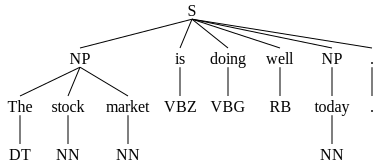

In [211]:
chunked_sentence

In [5]:
# import stanfordnlp

# # Initialize the StanfordNLP parser
# # stanfordnlp.download('en')  # Download the English models if not already installed
# nlp = stanfordnlp.Pipeline(processors='tokenize,pos,lemma,depparse')

# Sample statement
statement = "The company reported first-quarter net debt of $44.2 billion, down from $48.5 billion when compared to the same period a year earlier."

# Define the set of pre-defined syntactic relations
targeted_relations = {"nmod", "amod"}  # Add more relations as needed

# Function to extract concept-value pairs
def extract_concept_value_pairs(sentence):
    doc = nlp(sentence)

    concept_value_pairs = []

    for sent in doc.sentences:
        for dep_edge in sent.dependencies:
            # Check for "nsubj" relation and POS tag
            if dep_edge[1] == "nsubj" and sent.words[dep_edge[0] - 1].pos.startswith("NN"):
                subject_index = dep_edge[0] - 1
                governor_index = dep_edge[2] - 1

                # Attach right dependents with predefined relations
                for right_dep_edge in sent.dependencies:
                    if (
                        right_dep_edge[0] == governor_index + 1
                        and right_dep_edge[1] in targeted_relations
                    ):
                        concept_value_pairs.append(
                            (
                                sent.words[subject_index].text,
                                sent.words[governor_index].text,
                            )
                        )
                        break

                # Attach left dependents with predefined relations
                for left_dep_edge in sent.dependencies:
                    if (
                        left_dep_edge[2] == governor_index + 1
                        and left_dep_edge[1] in targeted_relations
                    ):
                        concept_value_pairs.append(
                            (
                                sent.words[subject_index].text,
                                sent.words[governor_index].text,
                            )
                        )
                        break

                # Check for POS of added dependents and re-run the process if needed
                for dep_edge in sent.dependencies:
                    if (
                        dep_edge[0] == governor_index + 1
                        and sent.words[dep_edge[2] - 1].pos in targeted_relations
                    ):
                        concept_value_pairs.extend(
                            extract_concept_value_pairs(
                                sent.words[dep_edge[2] - 1].text
                            )
                        )

    return concept_value_pairs

# Extract concept-value pairs from the statement
concept_value_pairs = extract_concept_value_pairs(statement)

# Print the extracted pairs
for pair in concept_value_pairs:
    print(pair)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': 'C:\\Users\\benjo\\stanfordnlp_resources\\en_ewt_models\\en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': 'C:\\Users\\benjo\\stanfordnlp_resources\\en_ewt_models\\en_ewt_tagger.pt', 'pretrain_path': 'C:\\Users\\benjo\\stanfordnlp_resources\\en_ewt_models\\en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': 'C:\\Users\\benjo\\stanfordnlp_resources\\en_ewt_models\\en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': 'C:\\Users\\benjo\\stanfordnlp_resources\\en_ewt_models\\en_ewt_parser.pt', 'pretrain_path': 'C:\\Users\\benjo\

RuntimeError: index_select(): Expected dtype int32 or int64 for index

In [105]:
# Sample dataset with text and labels (0 for negative, 1 for positive)
data = [
    ("The company reported strong earnings for Q3 2023.", 1),
    ("Despite a challenging quarter, the company improved profits.", 1),
    ("Earnings fell short of expectations, causing stock prices to drop.", 0),
    ("The CEO's resignation led to uncertainty in the market.", 0),
]

# Preprocess the text data using dependency parsing
def preprocess_text(text):
    doc = nlp(text)
    # Extract dependency relations of interest (e.g., subject and object)
    dependencies = {"nsubj", "dobj", "attr",}
    parsed_text = []
    for token in doc:
        if token.dep_ in dependencies:
            parsed_text.append(token.text)
    return " ".join(parsed_text)

# Apply preprocessing to the dataset
preprocessed_data = [(preprocess_text(text), label) for text, label in data]

preprocessed_data

[('company earnings', 1),
 ('company profits', 1),
 ('Earnings prices', 0),
 ('resignation', 0)]